<a href="https://colab.research.google.com/github/Apaulgithub/Cardiovascular_Risk_Prediction/blob/main/ML_Cardiovascular_Risk_Prediction_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



MEMBER - Sohail Kazi

# **Project Summary -**

The goal of this project was to use machine learning techniques to predict the 10-year risk of future coronary heart disease (CHD) in patients using data from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The dataset provided information on over 4,000 patients and included 15 attributes, each representing a potential risk factor for CHD. These attributes included demographic, behavioral, and medical risk factors.

To prepare the data for analysis, extensive preprocessing was performed to clean and transform the data. This included handling missing values using median, mode, and KNN imputation techniques, as well as identifying and removing outliers using the Interquartile Range (IQR) method. Skewed continuous variables were also transformed using log and square root transformations to reduce skewness and improve model performance.

Feature selection was performed using variance inflation factor to remove multicollinearity and a new feature called pulse pressure was created to capture the relationship between systolic and diastolic blood pressure. Redundant columns were also removed to simplify the dataset. The most important features for predicting CHD risk were identified as ‘age’, ‘sex’, ‘education’, ‘cigs_per_day’, ‘bp_meds’, ‘prevalent_stroke’, ‘prevalent_hyp’, ‘diabetes’, ‘total_cholesterol’, ‘bmi’, ‘heart_rate’, ‘glucose’, and ‘pulse_pressure’.

To handle the imbalanced nature of the dataset, the SMOTE combined with Tomek links undersampling technique was used to balance the class distribution and improve model performance. The data was also scaled using standard scalar method to ensure that all features were on the same scale.

Several machine learning models were evaluated on their performance on the primary evaluation metric of recall. After careful analysis, the Neural Network (tuned) was chosen as the final prediction model because it had the highest recall score among the models evaluated. By selecting a model with a high recall score, the goal was to correctly identify as many patients with CHD risk as possible, even if it meant having some false positives.

Overall, this project demonstrated the potential of machine learning techniques to accurately predict CHD risk in patients using data from a cardiovascular study. By carefully preprocessing and transforming the data, selecting relevant features, and choosing an appropriate model based on its performance on a relevant evaluation metric, it was possible to achieve a positive business impact by accurately predicting CHD risk in patients.

# **Problem Statement**


The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients' information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [25]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt


# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Import Sampling
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Import preprocessing libraries
from sklearn.preprocessing import StandardScaler

# Import Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [28]:
# Load Dataset from github repository
data = pd.read_csv('https://raw.githubusercontent.com/Apaulgithub/Cardiovascular_Risk_Prediction/main/data_cardiovascular_risk.csv')

### Dataset First View

In [29]:
# Dataset First Look
# View top 5 rows of the dataset
data.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [30]:
# View last 5 rows of the dataset
data.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

In [31]:
# Dropping the id column (not relevant)
data.drop(columns=['id'], inplace=True)

### Dataset Rows & Columns count

In [32]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",data.shape[0])
print("Number of columns are: ",data.shape[1])

Number of rows are:  3390
Number of columns are:  16


### Dataset Information

In [33]:
# Dataset Info
# Checking information about the dataset using info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


#### Duplicate Values

In [34]:
# Checking Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [35]:
# Checking missing values/null values count for each column
data.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

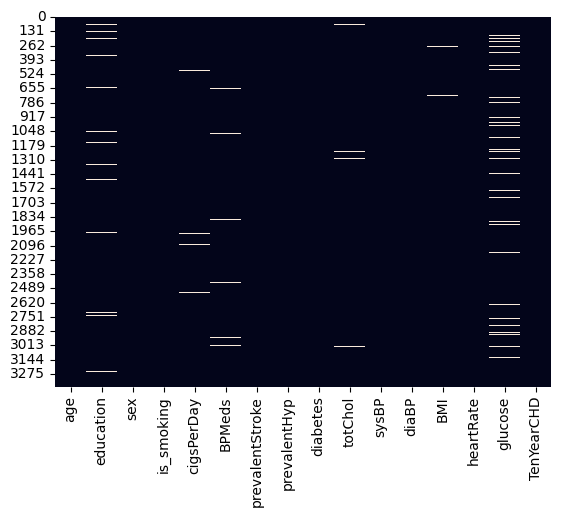

In [36]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(data.isnull(), cbar=False)

### What did you know about your dataset?

There are a total of 16 feature columns where 'TenYearCHD' is the dependent variable column.
The total number of observations(rows) are 3390.

There are no duplicate rows in the dataset.

Also there are missing values in the columns education, cigs per day, BP meds, totChol, BMI, heart rate and glucose.

## ***2. Understanding Your Variables***

In [37]:
# Dataset Columns
data.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [38]:
# Dataset Describe (all columns included)
data.describe(include= 'all').round(2)

age  education   sex is_smoking  cigsPerDay   BPMeds  \
count   3390.00    3303.00  3390       3390     3368.00  3346.00   
unique      NaN        NaN     2          2         NaN      NaN   
top         NaN        NaN     F         NO         NaN      NaN   
freq        NaN        NaN  1923       1703         NaN      NaN   
mean      49.54       1.97   NaN        NaN        9.07     0.03   
std        8.59       1.02   NaN        NaN       11.88     0.17   
min       32.00       1.00   NaN        NaN        0.00     0.00   
25%       42.00       1.00   NaN        NaN        0.00     0.00   
50%       49.00       2.00   NaN        NaN        0.00     0.00   
75%       56.00       3.00   NaN        NaN       20.00     0.00   
max       70.00       4.00   NaN        NaN       70.00     1.00   

        prevalentStroke  prevalentHyp  diabetes  totChol    sysBP    diaBP  \
count           3390.00       3390.00   3390.00  3352.00  3390.00  3390.00   
unique              NaN           NaN       NaN      NaN      NaN      NaN   
top                 NaN           NaN       NaN      NaN      NaN      NaN   
freq                NaN           NaN       NaN      NaN      NaN      NaN   
mean               0.01          0.32      0.03   237.07   132.60    82.88   
std                0.08          0.46      0.16    45.25    22.29    12.02   
min                0.00          0.00      0.00   107.00    83.50    48.00   
25%                0.00          0.00      0.00   206.00   117.00    74.50   
50%                0.00          0.00      0.00   234.00   128.50    82.00   
75%                0.00          1.00      0.00   264.00   144.00    90.00   
max                1.00          1.00      1.00   696.00   295.00   142.50   

            BMI  heartRate  glucose  TenYearCHD  
count   3376.00    3389.00  3086.00     3390.00  
unique      NaN        NaN      NaN         NaN  
top         NaN        NaN      NaN         NaN  
freq        NaN        NaN      NaN         NaN  
mean      25.79      75.98    82.09        0.15  
std        4.12      11.97    24.24        0.36  
min       15.96      45.00    40.00        0.00  
25%       23.02      68.00    71.00        0.00  
50%       25.38      75.00    78.00        0.00  
75%       28.04      83.00    87.00        0.00  
max       56.80     143.00   394.00        1.00

### Variables Description

**Demographic:**
* Sex: male or female ("M" or "F")
* Age: Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
* Education: The level of education of the patient (categorical values - 1,2,3,4)

**Behavioral:**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical (history):**
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

**Medical (current):**
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

**Predict variable (desired target):**
* TenYearCHD: 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

### Check Unique Values for each variable.

In [39]:
# Check Unique Values for each variable using a for loop
for i in data.columns.tolist():
  print("No. of unique values in",i,"is",data[i].nunique())

No. of unique values in age is 39
No. of unique values in education is 4
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in cigsPerDay is 32
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in totChol is 240
No. of unique values in sysBP is 226
No. of unique values in diaBP is 142
No. of unique values in BMI is 1259
No. of unique values in heartRate is 68
No. of unique values in glucose is 132
No. of unique values in TenYearCHD is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [40]:
# Before doing any data wrangling lets create copy of the dataset
data_2 = data.copy()

In [41]:
# Renaming the columns
data_2.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [42]:
# Defining 3 lists containing the column names of
# This is defined based on the number of unique values for each attribute
dependent_var = ['ten_year_chd']

categorical_var = [i for i in data_2.columns if data_2[i].nunique()<=4]
continuous_var = [i for i in data_2.columns if i not in categorical_var]

In [43]:
categorical_var

['education',
 'sex',
 'is_smoking',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes',
 'ten_year_chd']

In [44]:
continuous_var

['age',
 'cigs_per_day',
 'total_cholesterol',
 'systolic_bp',
 'diastolic_bp',
 'bmi',
 'heart_rate',
 'glucose']

### What all manipulations have you done and insights you found?

Changed the names of all the columns for ease of use.

I have also defined the continuous variables, dependent variable and categorical variables for ease of plotting graphs.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Dependent variable Distribution

0    2879
1     511
Name: ten_year_chd, dtype: int64
 


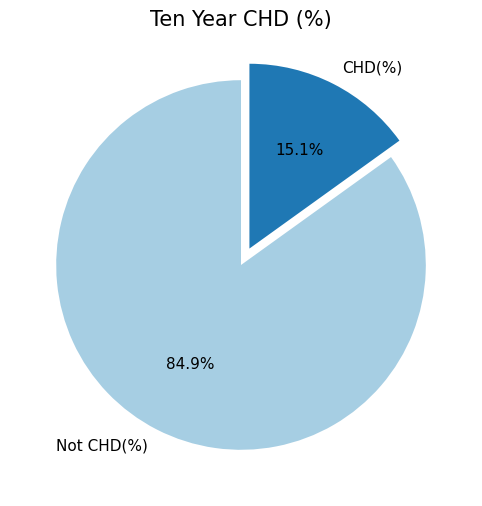

In [45]:
# Chart - 1 Visualization code for Distribution of dependent varaible - ten_year_chd

# Dependant Column Value Counts
print(data_2.ten_year_chd.value_counts())
print(" ")

#color palette selection
colors = sns.color_palette("Paired")

# plotting data on chart
plt.figure(figsize=(10,6))
explode = [0,0.1]
textprops = {'fontsize':11}
plt.pie(data_2['ten_year_chd'].value_counts(), labels=['Not CHD(%)','CHD(%)'], startangle=90, colors=colors, explode = explode, autopct="%1.1f%%",textprops = textprops)
plt.title('Ten Year CHD (%)', fontsize=15)

# displaying chart
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are generally used to show the proportions of a whole, and are especially useful for displaying data that has already been calculated as a percentage of the whole.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we come to know that 15.1% that is 511 out of 3390 are classified as positive for 10 year CHD whereas the remaining 84.9% that is 2879 out of 3390 are classified as negative for 10 year CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the chart show that 15.1% of the population has a positive classification for 10-year CHD, while 84.9% have a negative classification. This information can help businesses in the healthcare industry develop targeted strategies. There are no specific insights in the chart that indicate negative growth, but failure to address high CHD prevalence could have negative implications for public health and healthcare businesses.

#### Chart - 2 : Distribution/ Box plot

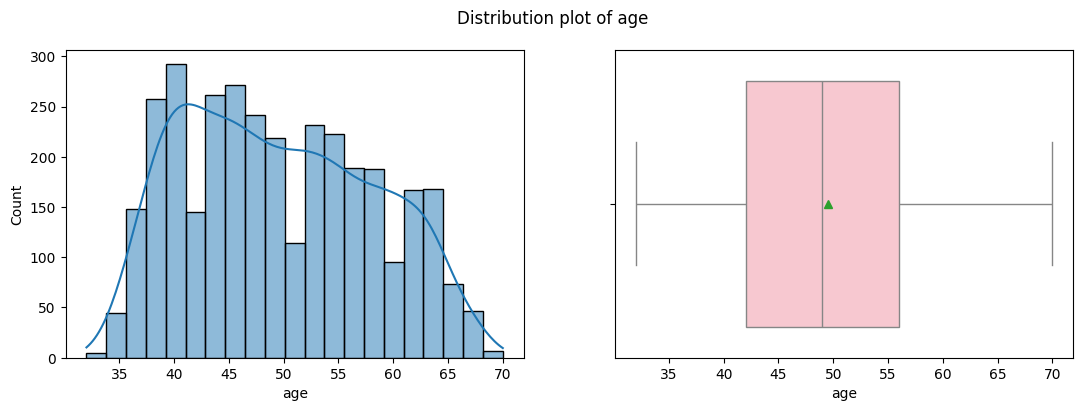

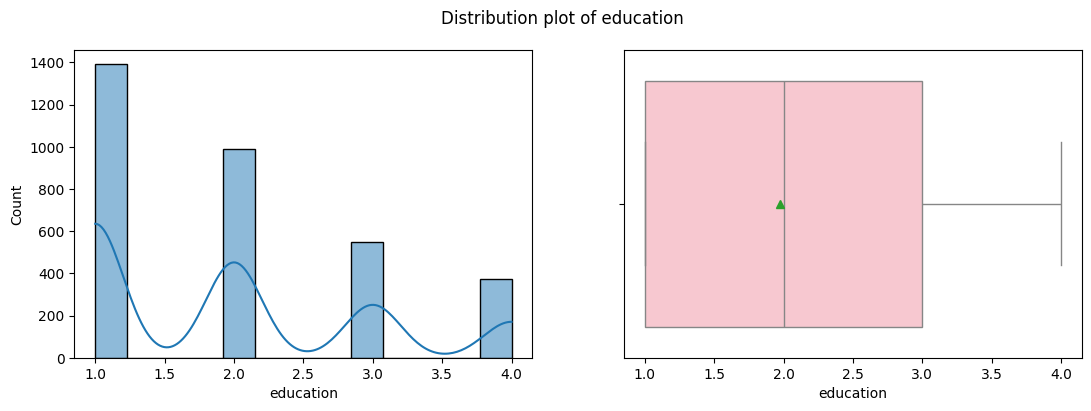

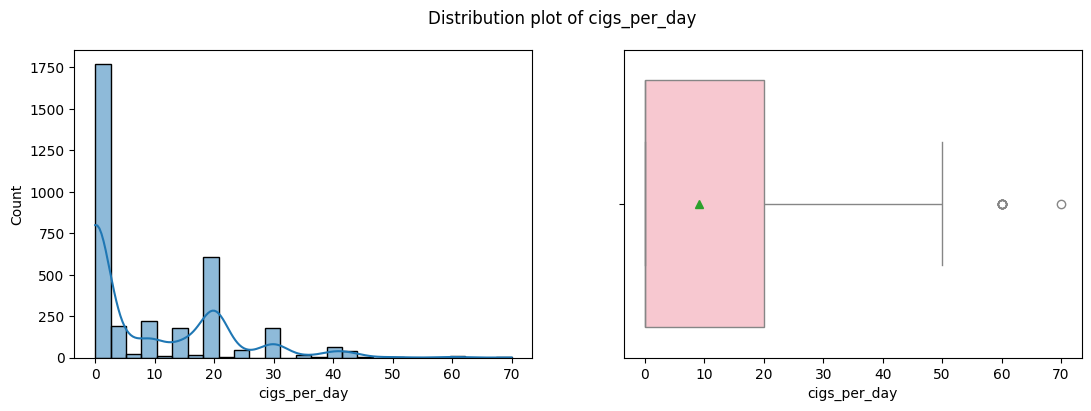

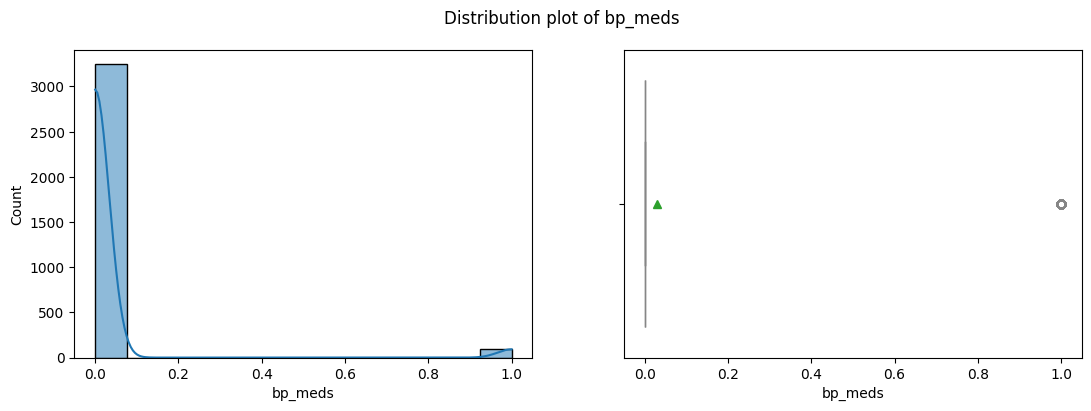

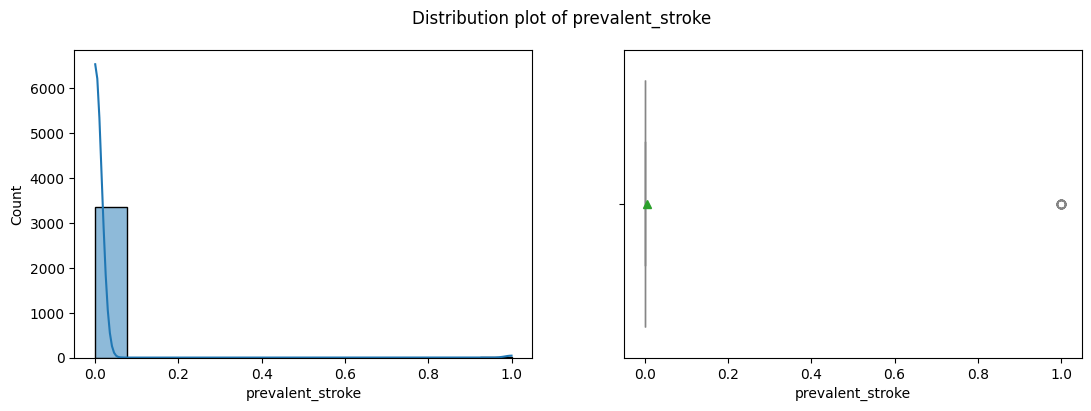

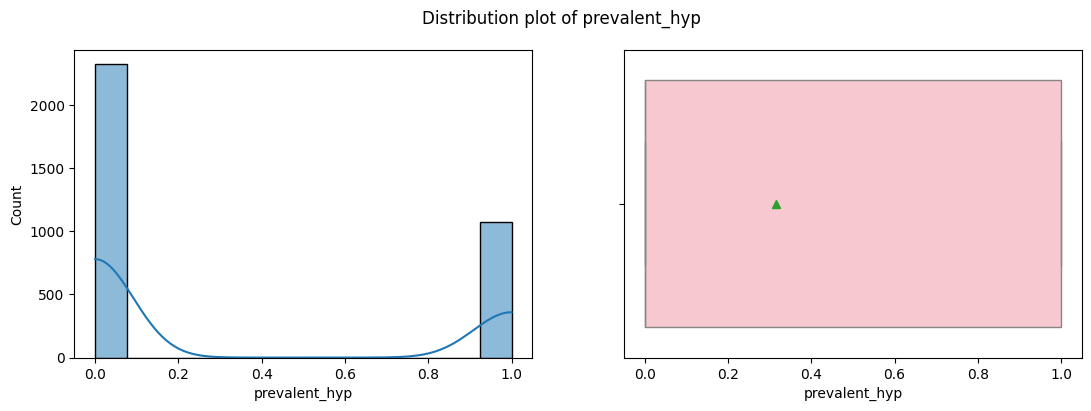

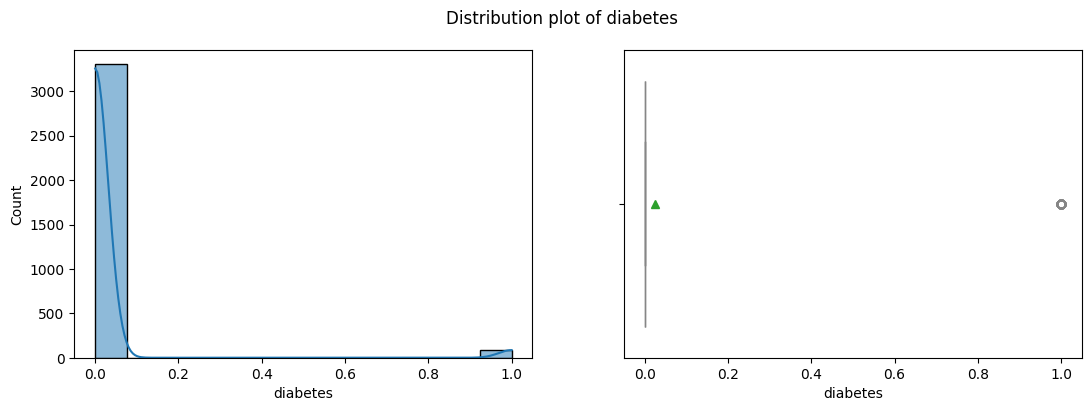

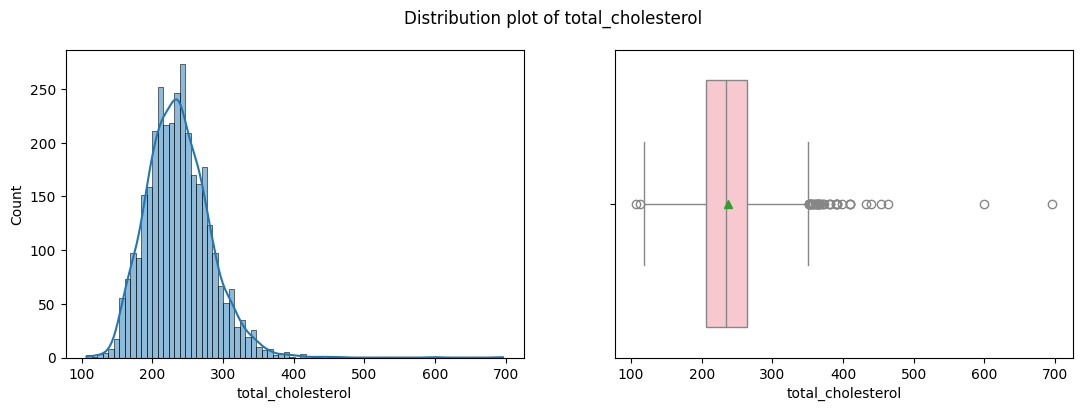

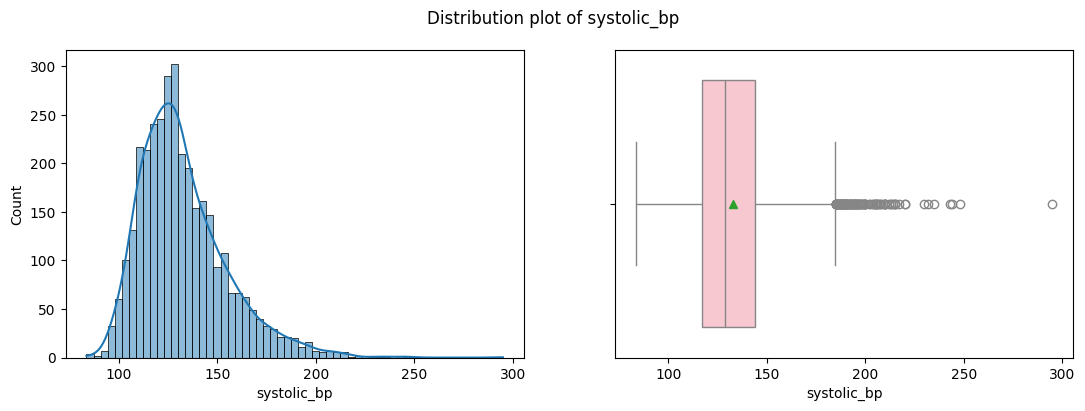

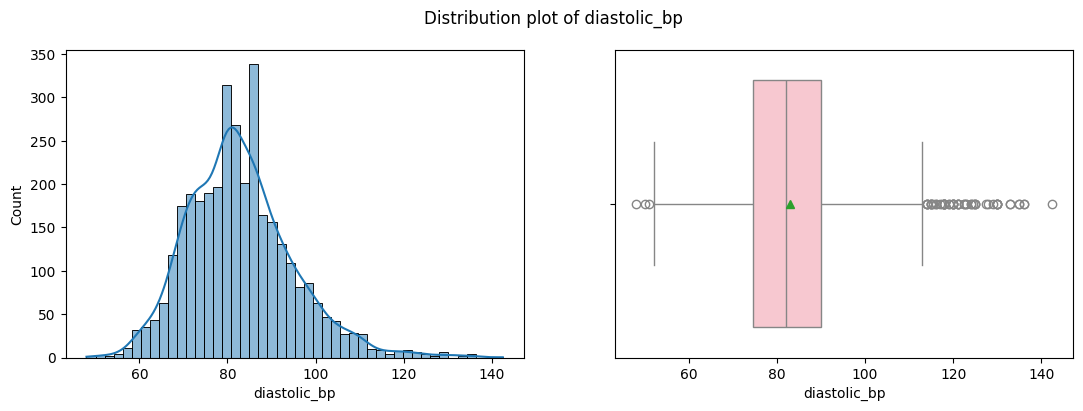

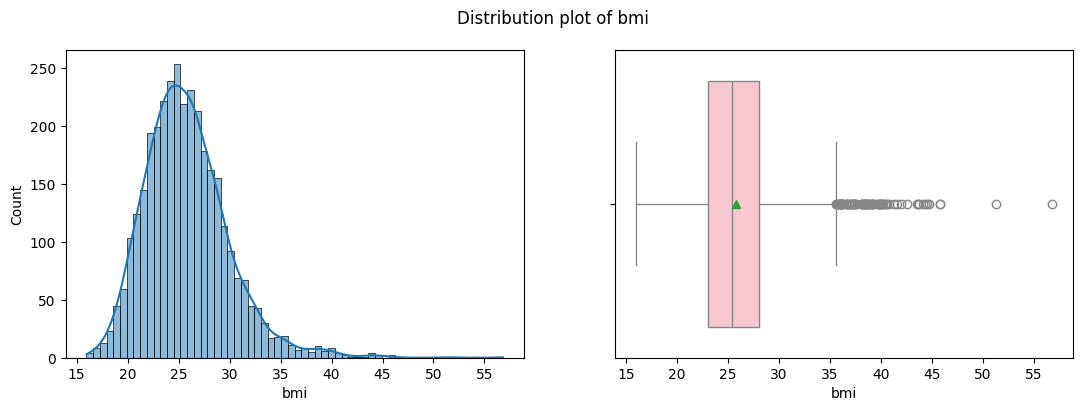

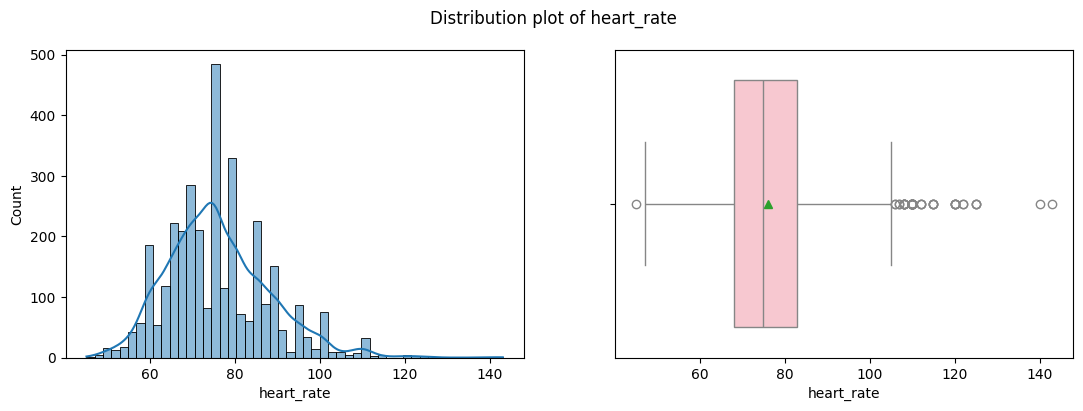

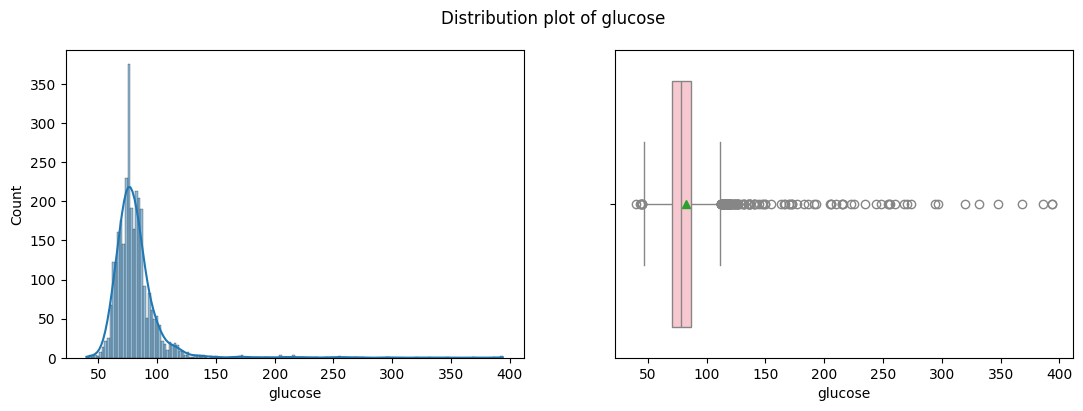

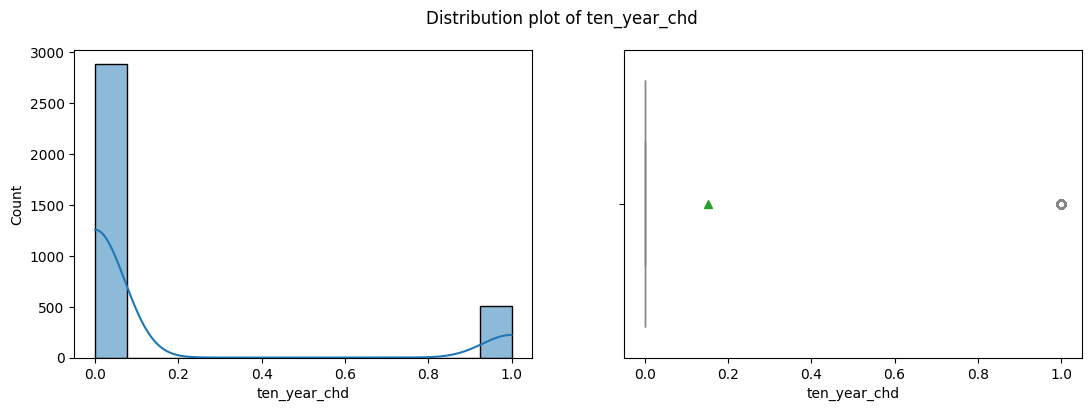

In [46]:
# Chart - 2 visualization code
# Visualizing code of histogram plot & boxplot for each columns to know the data distribution
for col in data_2.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(13,4))
    sns.histplot(data_2[col], ax = axes[0],kde = True)
    sns.boxplot(data_2[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 12)
    plt.show()

##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

##### 2. What is/are the insight(s) found from the chart?

From the distribution we see that most of the columns are normally distributed, some of them are skewed and we can see some of the categorical columns also.
In the box plot, we see some outliers also which i will handle later before model building.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Histogram and Box plot cannot give us whole information regarding data. It's done just to see the distribution of the column data over the dataset and the outliers in the boxplot for the different continuous columns.

#### Chart - 3 : Categorical variable Distribution

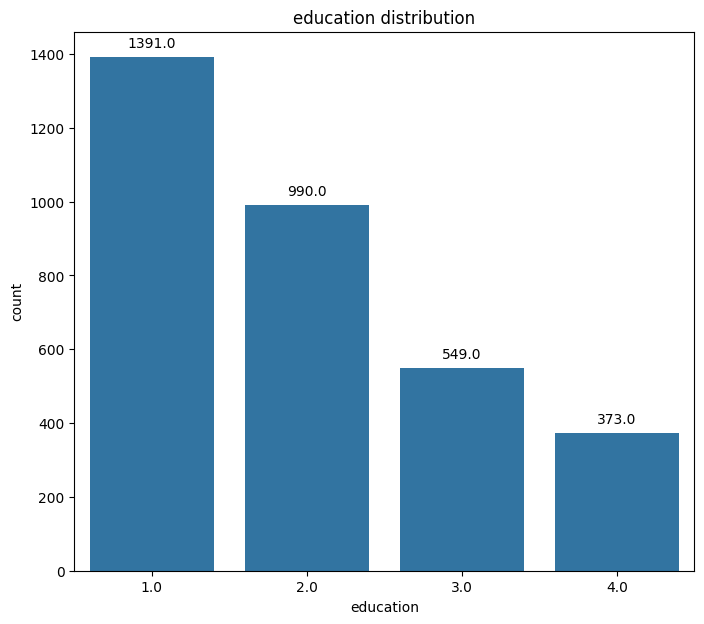

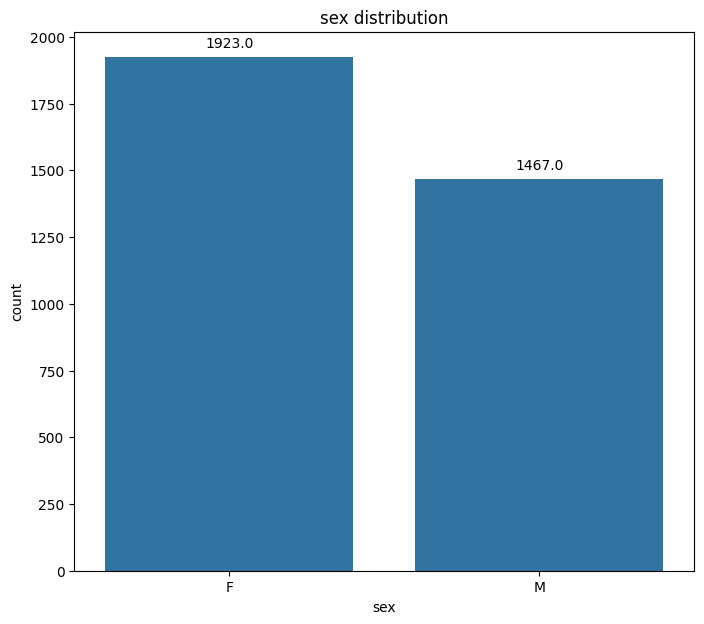

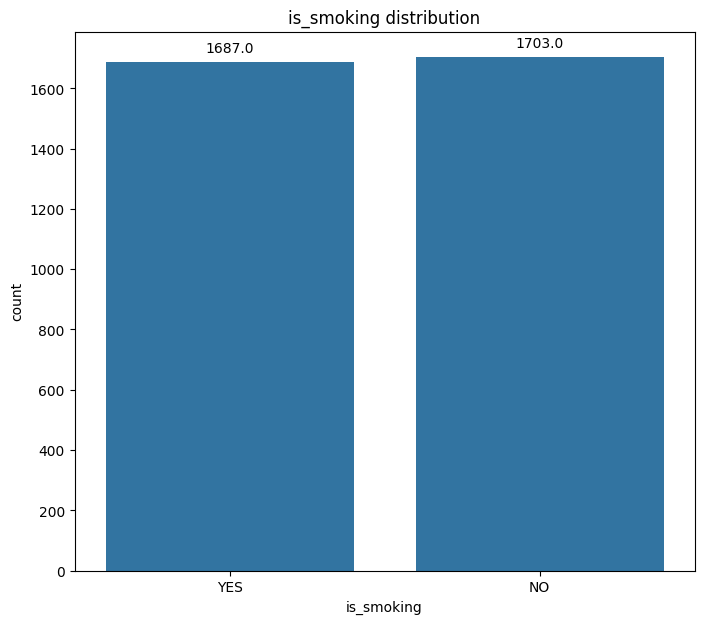

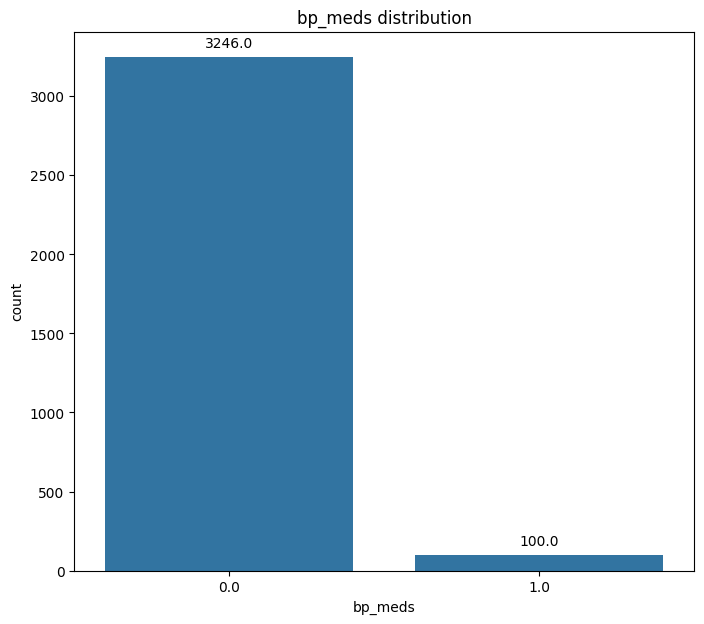

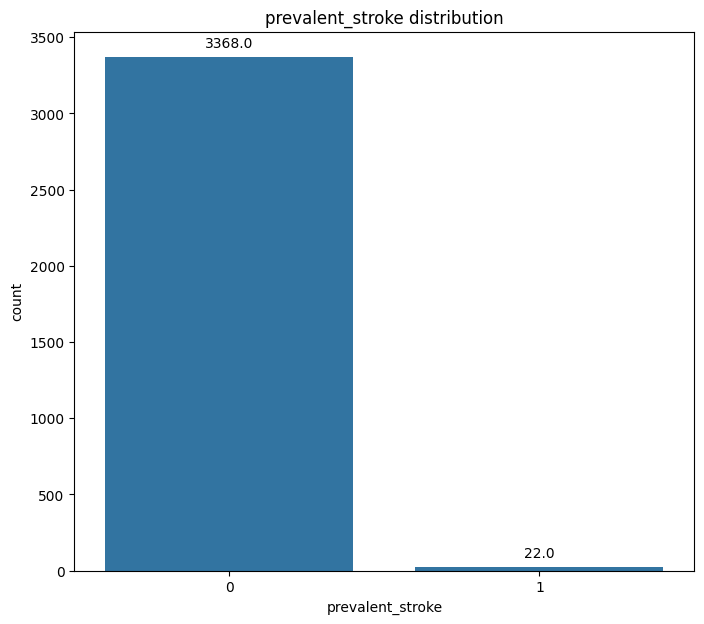

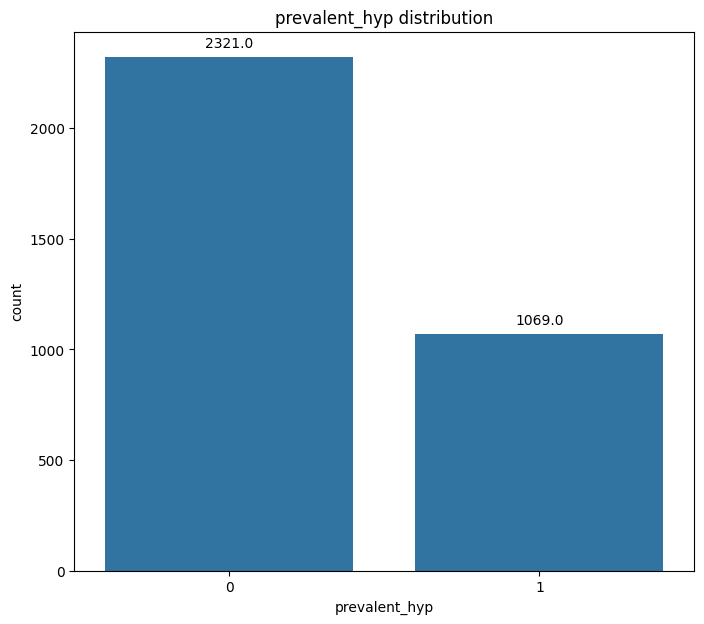

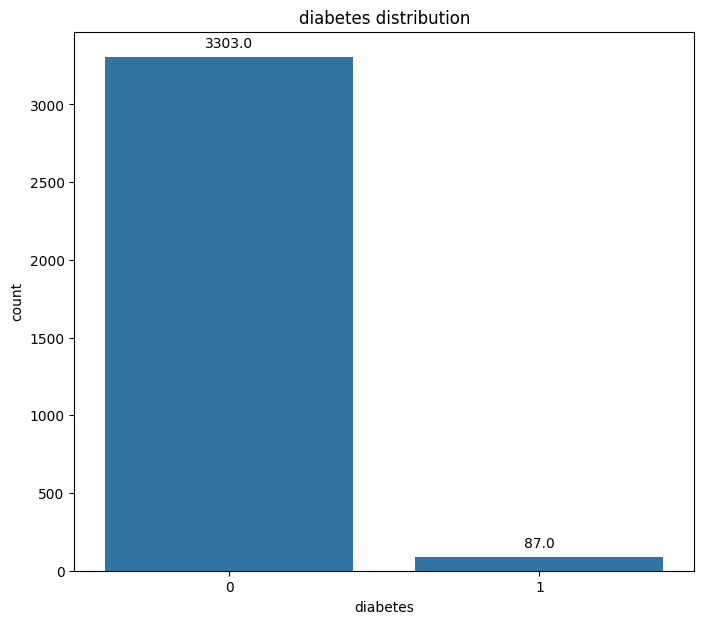

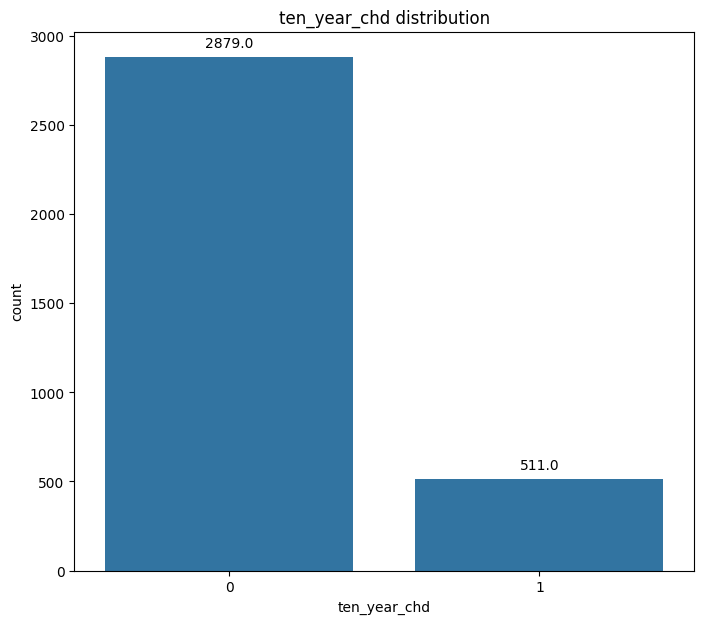

In [47]:
# Chart - 3 visualization code
# Analysing the distribution of categorical variables in the dataset
for i in categorical_var:
  plt.figure(figsize=(8,7))
  p = sns.countplot(x=i, data = data_2)
  plt.xlabel(i)
  plt.title(i+' distribution')
  for i in p.patches:
    p.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

The distribution of different categories in the categorical columns can be seen. The education column has the highest for the 1 category followed by 2 3 and 4.

The gender distribution is not even with high count for females.
The 'is_smoking' column is even. Bp_meds, prevalent_stroke, prevalent_hyp and diabetes are imbalanced, they have very few counts for the positive cases.

Finally the ten_year_chd is also imbalanced with few positive cases compared to the negative cases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. Understanding the distribution of categories in various columns helps identify patterns and target specific demographics or areas of focus. For example, businesses can develop tailored marketing campaigns based on the gender distribution or design educational programs based on the education levels of the target audience. Additionally, recognizing the imbalanced distribution of health conditions can guide businesses in developing specialized treatments or preventive measures to address specific needs.

However, it is important to note that the chart alone does not provide a complete picture of the business impact. The actual impact would depend on how well these insights are utilized in business strategies and actions. Factors such as market demand, competition, and the effectiveness of the implemented strategies would also play a role in determining the overall business growth. Therefore, while the gained insights have the potential to create positive business impact, their actual realization would require further analysis and strategic implementation.

#### Chart - 4 : Dependent variable with continuous variables (Bivariate)

<Figure size 1000x500 with 0 Axes>

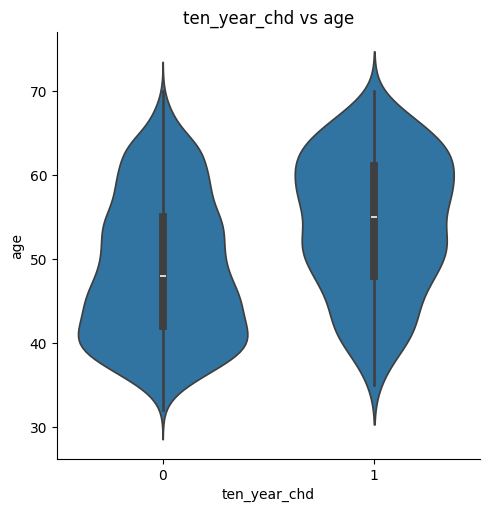

<Figure size 1000x500 with 0 Axes>

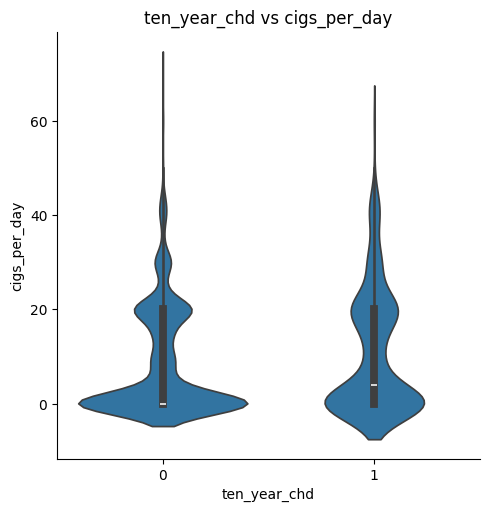

<Figure size 1000x500 with 0 Axes>

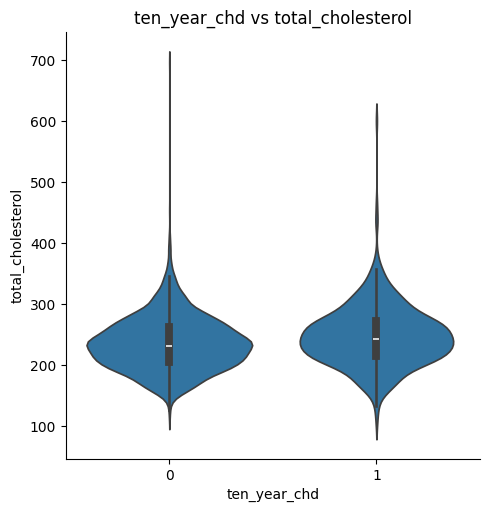

<Figure size 1000x500 with 0 Axes>

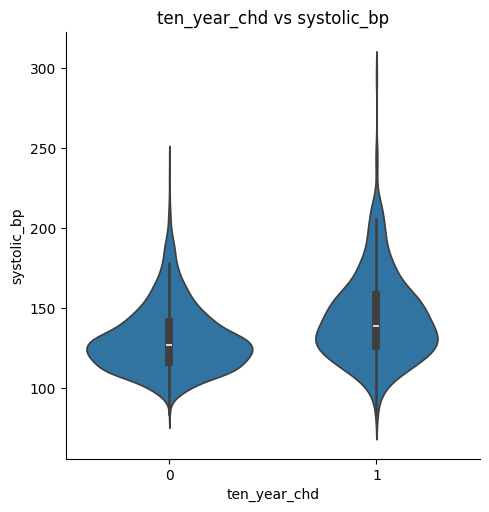

<Figure size 1000x500 with 0 Axes>

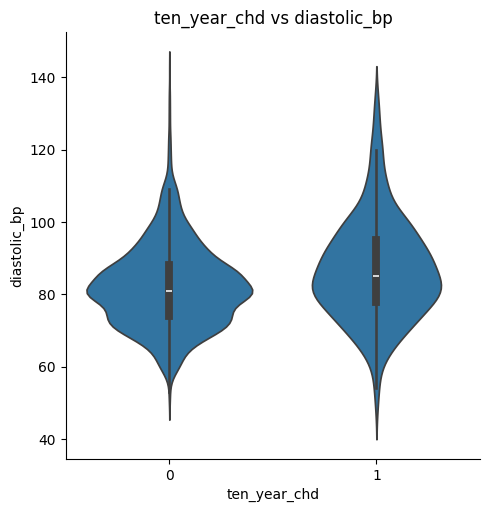

<Figure size 1000x500 with 0 Axes>

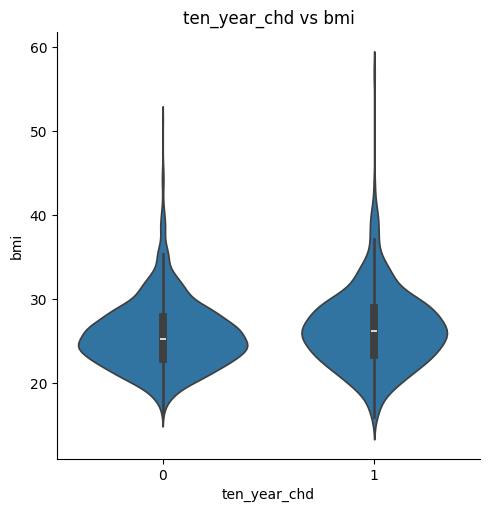

<Figure size 1000x500 with 0 Axes>

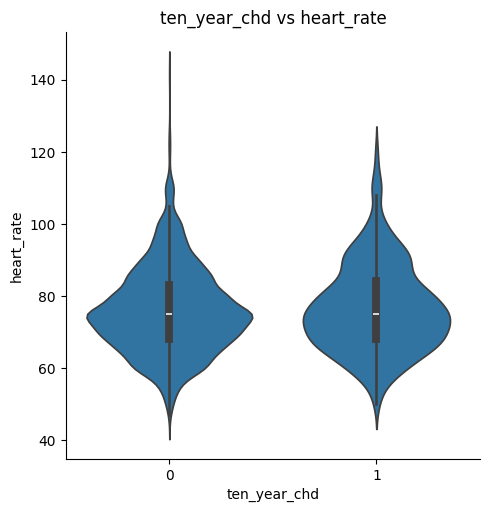

<Figure size 1000x500 with 0 Axes>

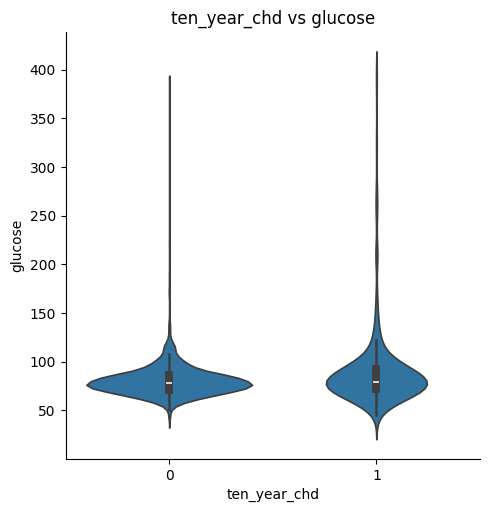

In [48]:
# Chart - 4 visualization code
# Relationship between the dependent variable and continuous independent variables
for i in continuous_var:
  plt.figure(figsize=(10,5))
  sns.catplot(x=dependent_var[0],y=i,data=data_2,kind='violin')
  plt.ylabel(i)
  plt.xlabel(dependent_var[0])
  plt.title(dependent_var[0]+' vs '+i)
  plt.show()

##### 1. Why did you pick the specific chart?

The violin chart is a type of data visualization that combines aspects of a box plot and a kernel density plot. It is used to display the distribution and density of data across different categories or groups. Some features of the violin chart include:

Shape and width: The shape of the violin represents the data distribution, typically displaying a mirrored, symmetrical shape. The width of the violin at different points indicates the density of data.

Quartiles and median: The central "box" in the violin chart represents the interquartile range (IQR) and contains the median value. This provides insights into the spread and central tendency of the data.

Grouping and comparison: Violin charts can be grouped or arranged side by side to compare distributions across different categories or groups. This allows for visual comparisons of data distribution shapes, spreads, and densities.

##### 2. What is/are the insight(s) found from the chart?

For age vs ten_year_chd, we see that the density for positive cases is high at higher age as compared to lower age indicating that the positive cases are higher in older people.

For cigs_per_day, the negative cases are more for the non smokers compared to the positive cases for non smokers.

For ten_year_chd and glucose, the negative cases have high density compared to the positive cases for the same value of glucose.

The remaining charts do not provide much information.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the violin chart can potentially create a positive business impact by providing valuable information for decision-making. Understanding the distribution and density of data across different categories can help businesses identify patterns, trends, and potential areas of focus. For example, the insight that positive cases of ten-year CHD are higher in older people suggests the need for targeted preventive measures or specialized treatments for this demographic. Similarly, the insight regarding the relationship between smoking and negative cases of CHD can inform smoking cessation programs or campaigns to reduce the risk of CHD.

While the insights gained from the chart can be valuable, it's important to note that the impact on business growth would depend on various factors. The actual business impact would require further analysis and strategic implementation of these insights. Additionally, without specific business context and objectives, it is challenging to determine if there are any insights that would directly lead to negative growth. However, using the insights to better understand the distribution of health conditions and risk factors can potentially help businesses in the healthcare industry develop more effective strategies and interventions to improve patient outcomes and drive positive growth.

#### Chart - 5 : Dependent variable with categorical variables (Bivariate)

<Figure size 1000x500 with 0 Axes>

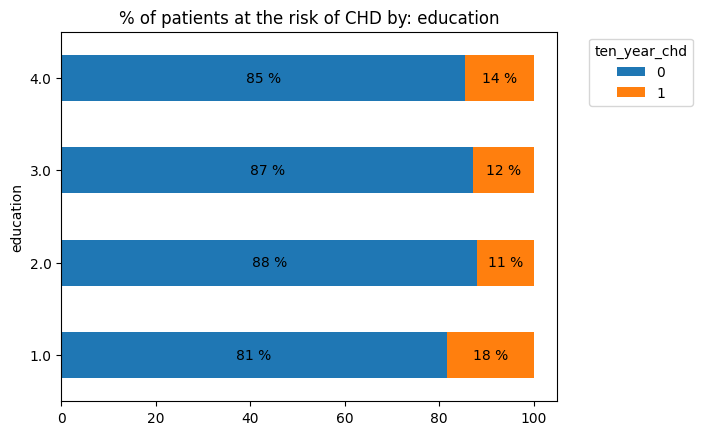

<Figure size 1000x500 with 0 Axes>

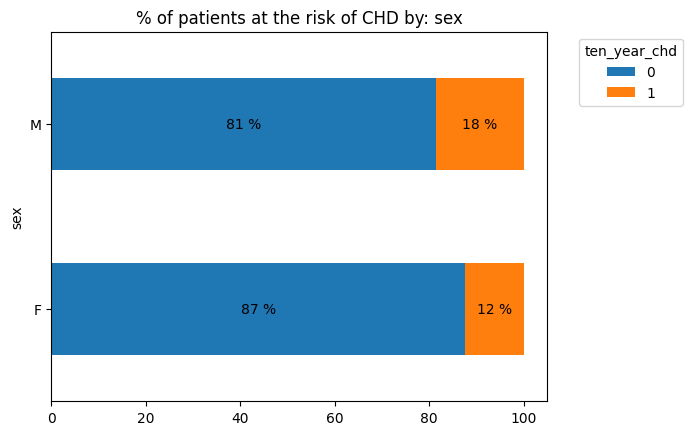

<Figure size 1000x500 with 0 Axes>

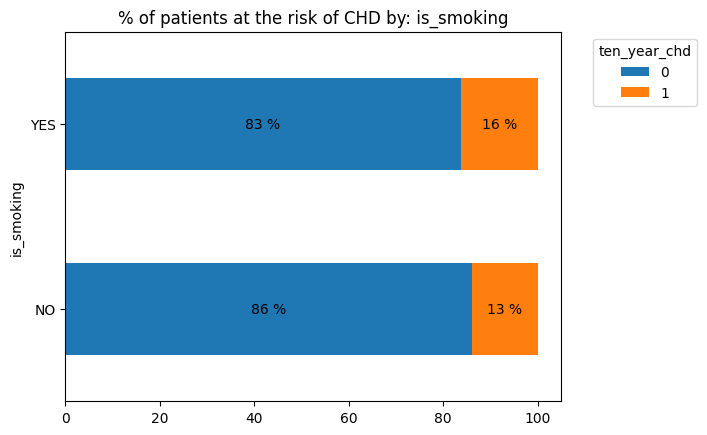

<Figure size 1000x500 with 0 Axes>

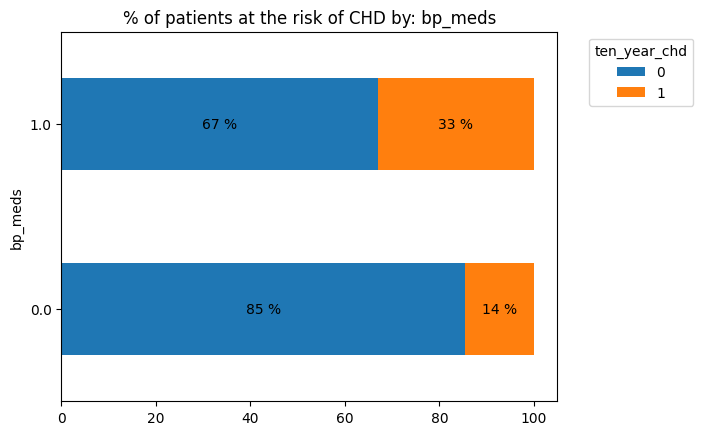

<Figure size 1000x500 with 0 Axes>

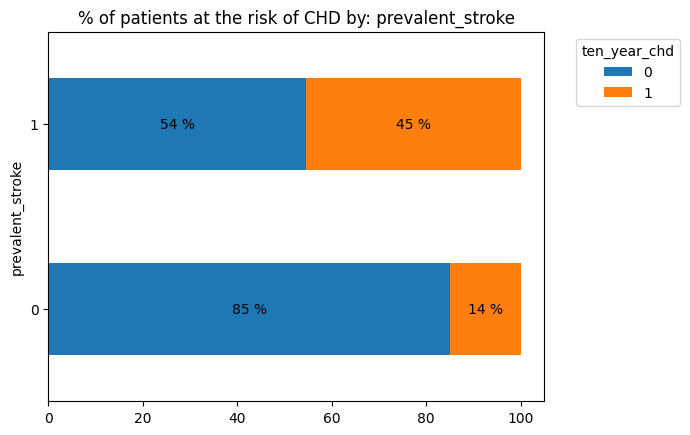

<Figure size 1000x500 with 0 Axes>

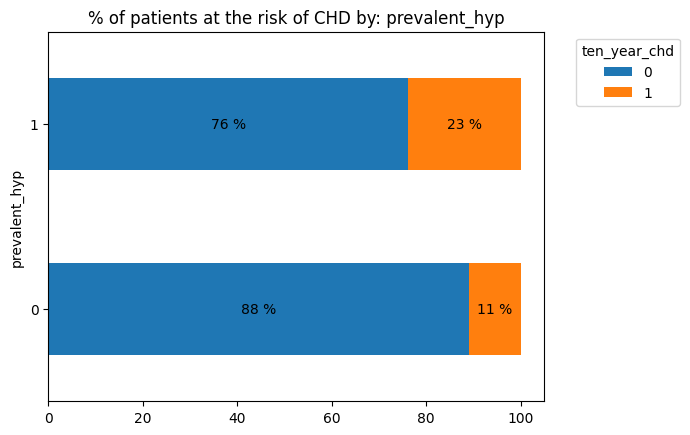

<Figure size 1000x500 with 0 Axes>

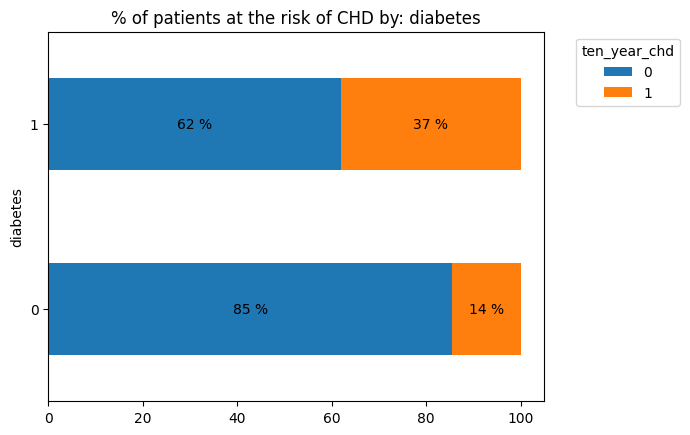

In [49]:
# Chart - 5 visualization code
# 100% stacked bar chart

for i in categorical_var[:-1]:
    x_var, y_var = i, dependent_var[0]
    plt.figure(figsize=(10,5))
    df_grouped = data_2.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of patients at the risk of CHD by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()

##### 1. Why did you pick the specific chart?

A 100% horizontal stacked bar chart is a type of data visualization that represents the composition or proportion of multiple categories within a whole. Some features of the stacked horizontal bar chart include:

Comparison of proportions: The chart displays multiple categories or groups stacked horizontally, allowing for easy visual comparison of their relative proportions within the total. Each bar represents the whole, and the segments of the bar represent the different categories or components.

Percentage representation: The stacked horizontal bar chart represents the categories as percentages of the whole. This allows for a clear understanding of the relative contributions of each category to the total.

Distribution across categories: The chart provides insights into the distribution and composition of the data across different categories. It helps identify which categories contribute more or less to the overall composition.

Facilitating trend analysis: By comparing stacked horizontal bar charts over different time periods or groups, it is possible to observe trends and changes in the composition of categories. This can provide insights into shifts in proportions or the relative importance of different categories over time.

##### 2. What is/are the insight(s) found from the chart?

The percentage of CHD as per education does not provide much information as it is similar throughout the different education categories.

For sex we see that there is a slightly higher chance of CHD in male than in female.

For is_smoking again a very slightly high percentage of CHD is seen for the positive category of is_smoking.

For bp_meds and diabetes, we see high percentage of CHD for positive cases compared to the negative case.

Finally for the positive prevalent_stroke, the percentage is almost half indicating that the positive CHD is high for positive prevalent_stroke.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart reveals the distribution and composition of different categories in relation to the occurrence of CHD. These insights can guide businesses in developing targeted strategies and interventions to address specific demographic groups or risk factors. For example, businesses can design preventive measures, educational campaigns, or tailored treatments to reduce the occurrence of CHD in high-risk categories. By leveraging these insights, businesses in the healthcare industry can improve patient outcomes, enhance customer satisfaction, and drive positive growth.

There are no specific insights from the chart that directly lead to negative growth. However, it's important to consider the overall prevalence of CHD and the effectiveness of interventions. If the prevalence of CHD remains high across all categories and the implemented strategies fail to yield desired outcomes, it could potentially result in negative growth due to increased healthcare costs, decreased patient satisfaction, or reputational issues. Therefore, the business impact ultimately depends on the successful implementation of strategies based on the insights gained from the chart.

#### Chart - 6 : Ten Year CHD For Different Age Group

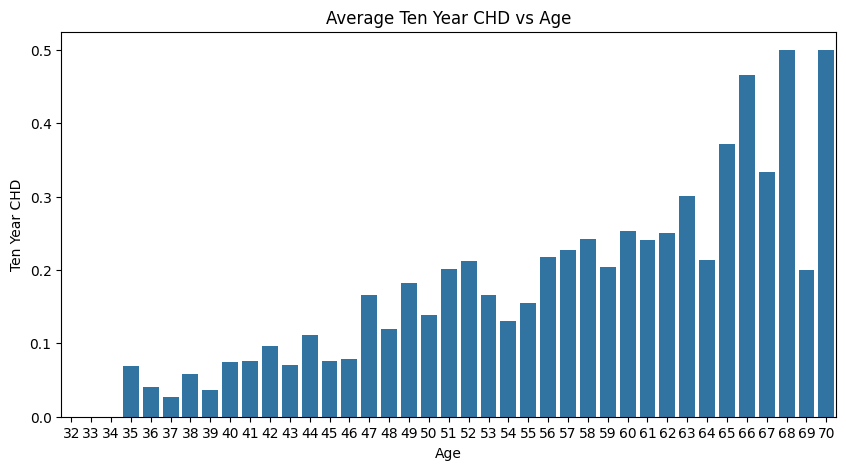

In [50]:
# Ploting Bar Chart
# Group by Age and get average CHD for 10 year, and precent change
avg_CHD = data_2.groupby('age')['ten_year_chd'].mean().reset_index()

# Plot average CHD over different age
plt.figure(figsize=(10,5))
ax = sns.barplot(x= avg_CHD['age'], y= avg_CHD['ten_year_chd'])
ax.set_ylabel("Ten Year CHD")
ax.set_xlabel("Age")
ax.set_title('Average Ten Year CHD vs Age')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics such as percentages.

To show the average CHD of 10 year for different age group in a clear and feasible way, i have used Bar chart here.

##### 2. What is/are the insight(s) found from the chart?

From above bar plot we can clearly see that the average CHD is high for above 65+ aged peoples. But a sudden drop in 67 and 69 year old group (CHD value is low there). And also for below 65 year, the CHD is much less.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from above insight we know that there is high value of CHD for old aged people(65-70 year). So, as a suggestion the need for targeted preventive measures or specialized treatments for this demographic.

#### Chart - 7 : Percentage of Gender Distribution

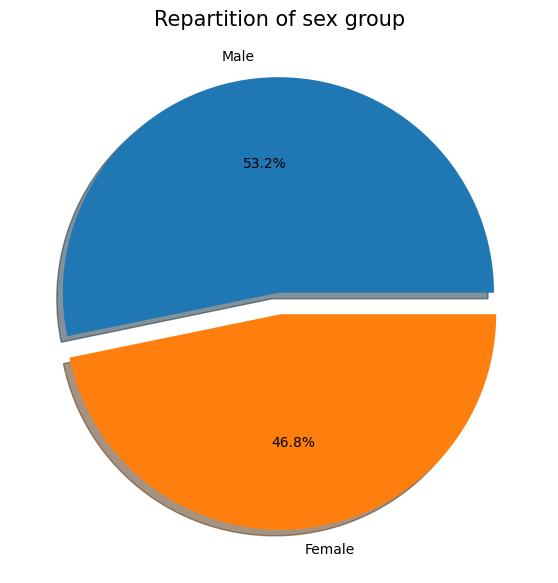

In [51]:
# Visualizing by pie chart
Male=data_2[data_2["sex"]=='M'].sum()
Female=data_2[data_2["sex"]=='F'].sum()

# Set labels
Sex_grp={"Male":Male["ten_year_chd"],"Female":Female["ten_year_chd"]}
plt.gcf().set_size_inches(7,7)
plt.pie(Sex_grp.values(),labels=Sex_grp.keys(), explode=[0.05, 0.05], autopct ='%1.1f%%', shadow = True);
plt.title("Repartition of sex group", fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Wherever different percentage comparison comes into action, pie chart is used frequently. So, i have used Pie Chart and which helped us to get the percentage comparison more clearly and precisely.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we got to know that the gender distribution is not even with high count for females. 53.2% ratio are there for males and 46.8% ratio for females.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. Understanding the distribution of categories in various columns helps identify patterns and target specific demographics or areas of focus. For example, businesses can develop tailored marketing campaigns based on the gender distribution of the target audience.

#### Chart - 8 : CHD for smoking cigarette

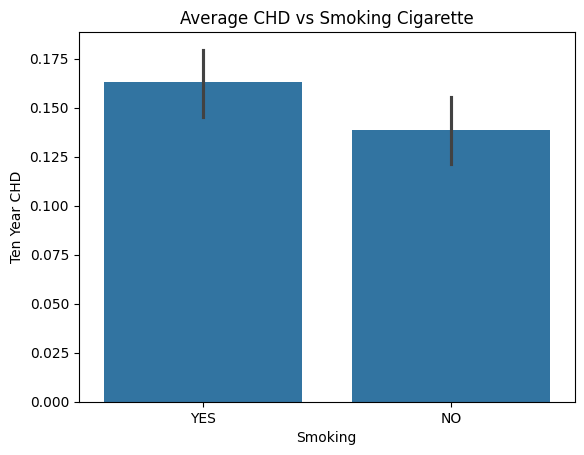

In [52]:
# Plot for Ten year CHD for smoking cigarette
sns.barplot(x='is_smoking',y='ten_year_chd',data=data_2)
plt.ylabel("Ten Year CHD")
plt.xlabel("Smoking")
plt.title('Average CHD vs Smoking Cigarette')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

To show the distribution of the CHD data with smoking cigarette i used bar chart.

##### 2. What is/are the insight(s) found from the chart?

From above barplot we got to know that:

There is low chances of CHD for non smokers compare to smoking persons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insights are going to provide some positive business impact, because analysing the high chances of CHD on the basis of smoking cigarette we got to know that for which type peoples the CHD value is high or low, so we can focus more on that portion.

#### Chart - 9 : Correlation Heatmap

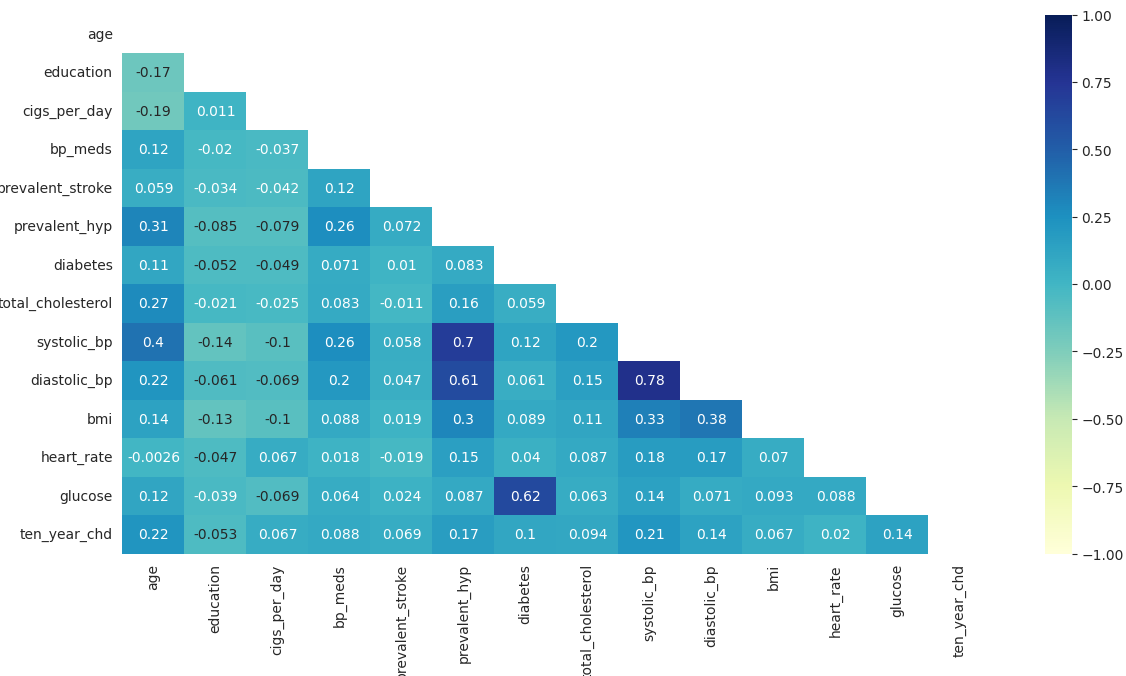

In [53]:
# Correlation Heatmap visualization code
corr = data_2.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 7))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

Here we see that the systolic_bp and diastolic_bp are highly correlated, also diabetes and glucose have a correlation of 0.62.
Education is not importand as the CHD will not be acquired based on education level of a person so we can drop education column.

#### Chart - 10 : Pair Plot

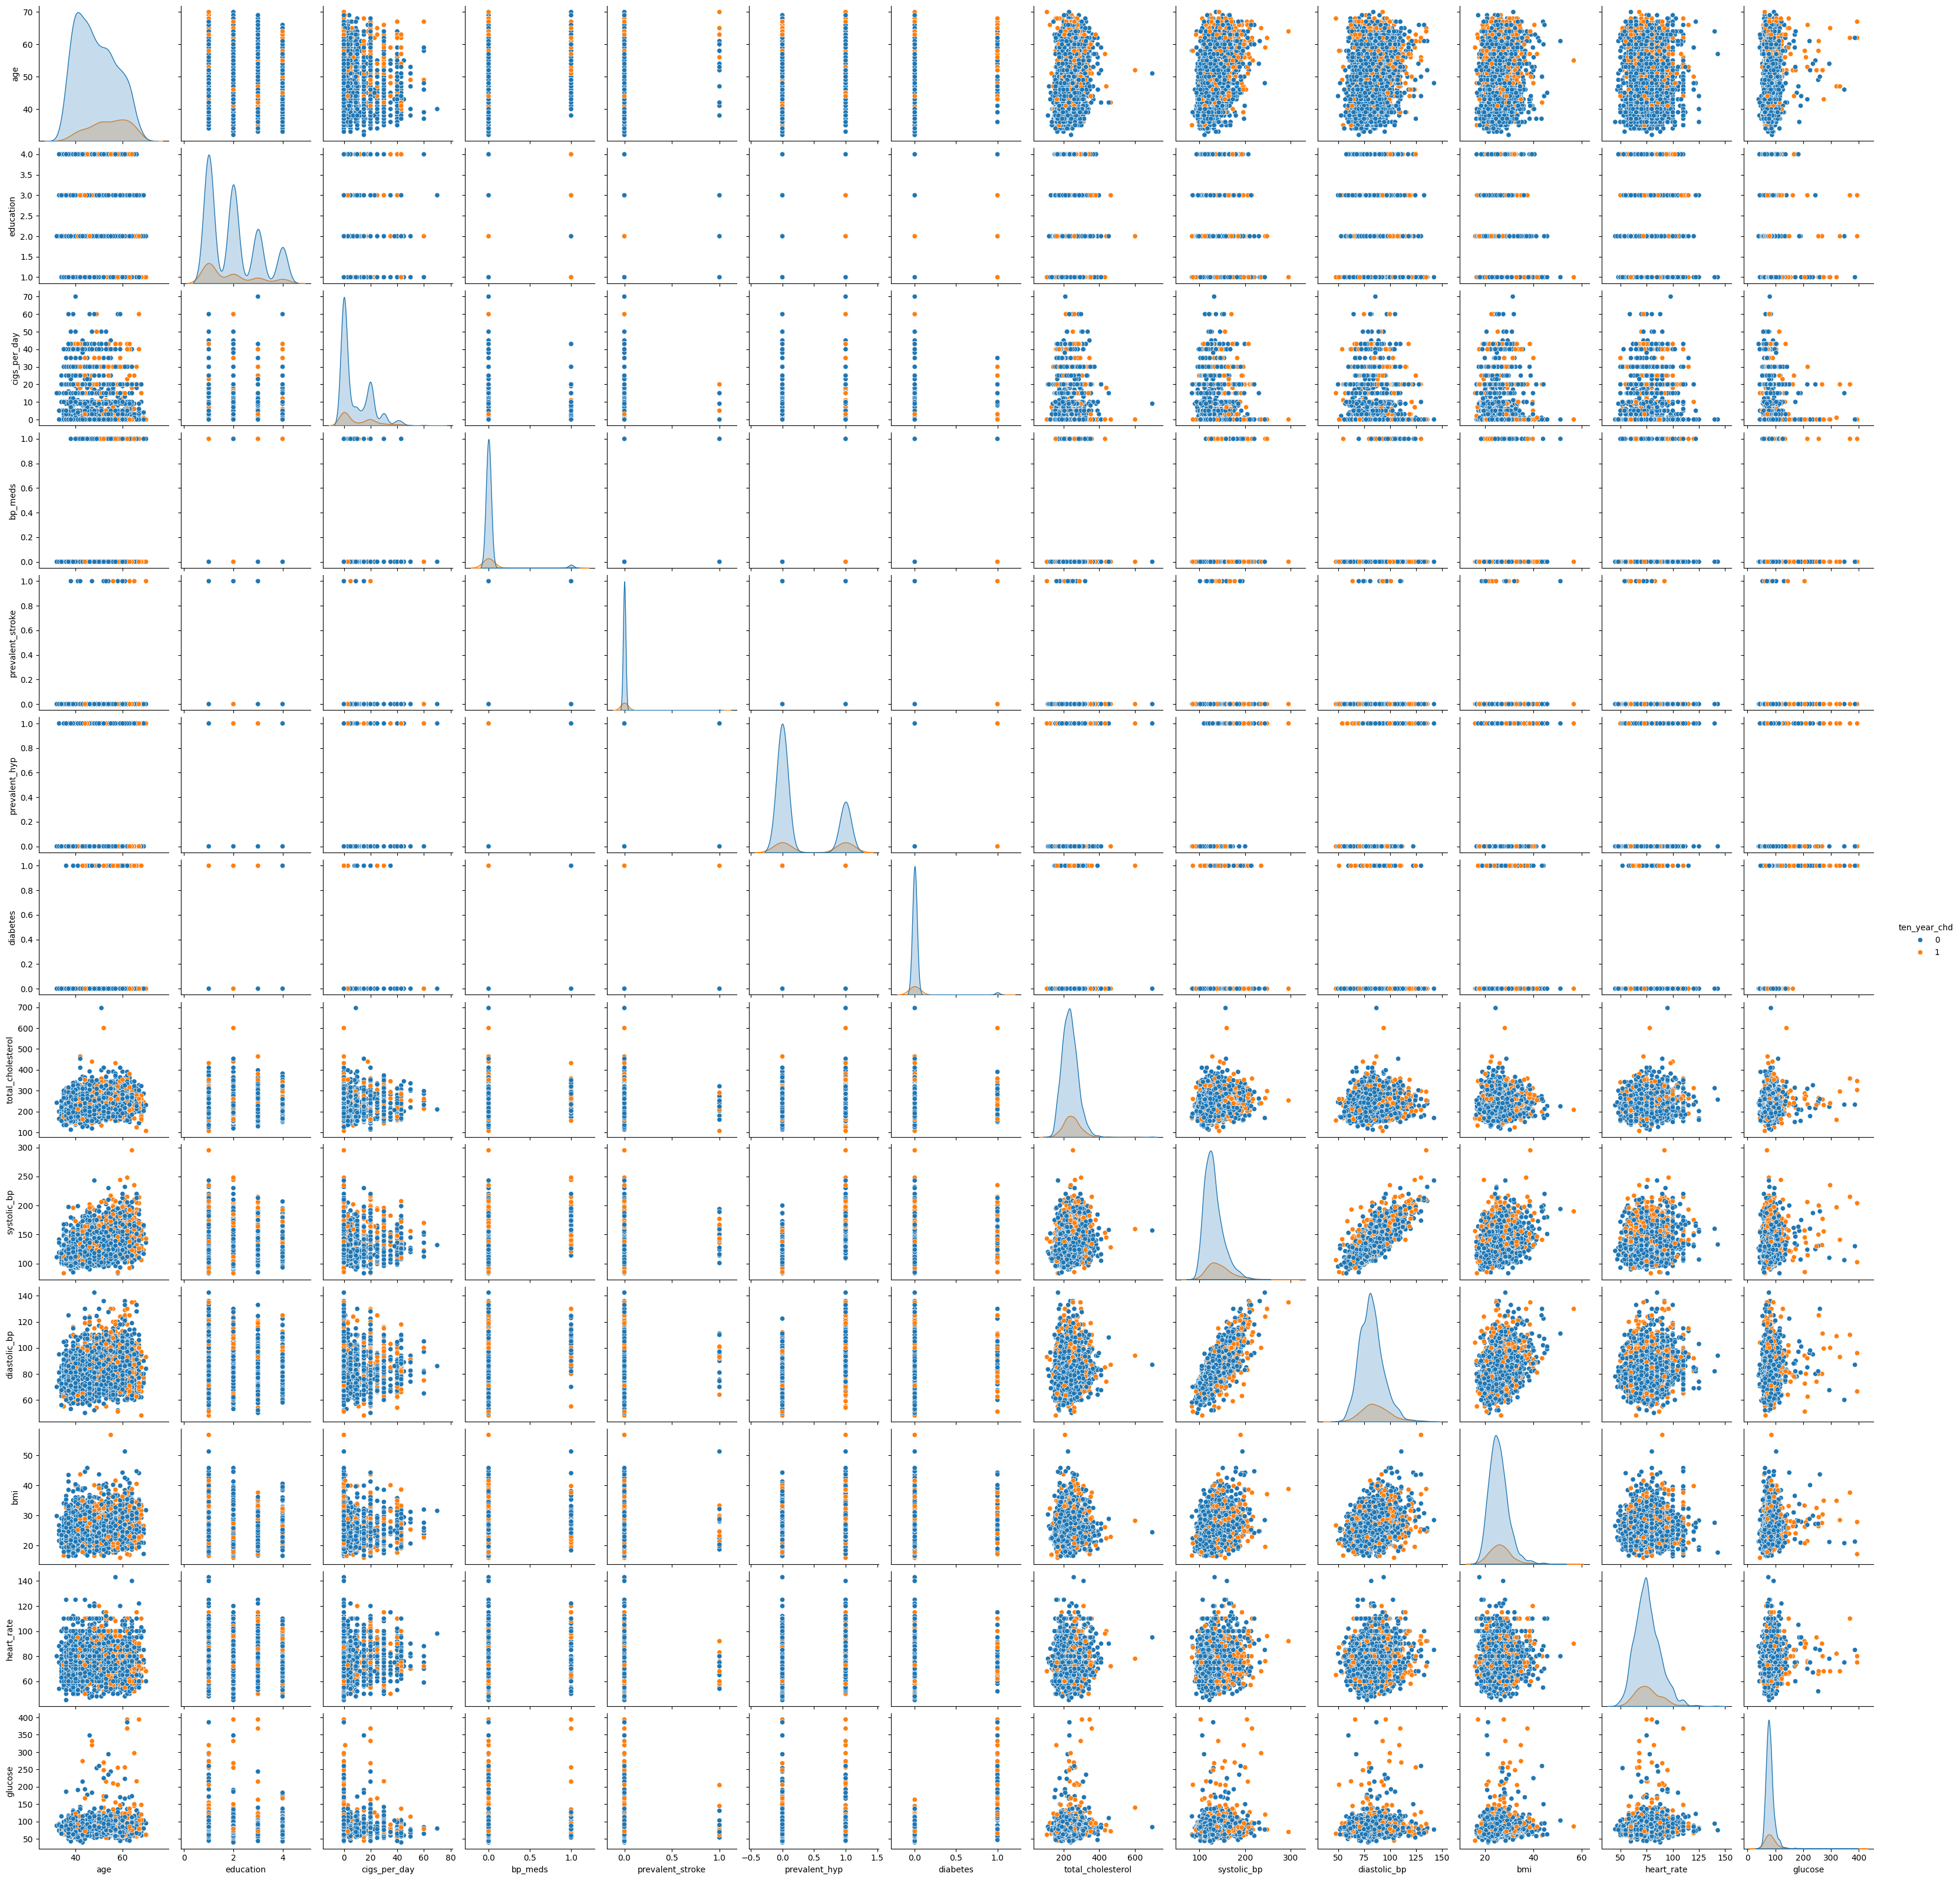

In [54]:
# Pair Plot visualization code
sns.pairplot(data_2, hue="ten_year_chd")
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and relationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

We see that the cigs_per_day data distribution is highly skewed and it contains high 0 value so we can convert this into categorical column.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis:** There is no association between education level and CHD outcome.

**Alternate hypothesis:** There is an association between education level and CHD outcome.

#### 2. Perform an appropriate statistical test.

In [55]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(data_2['education'], data_2['ten_year_chd'])
print(contingency_table)

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print p-value
print(f'p-value: {p}')

ten_year_chd     0    1
education              
1.0           1135  256
2.0            872  118
3.0            479   70
4.0            319   54
p-value: 6.0386467492345515e-05


The p value is significantly lower than 0.05 so we reject the null hypothesis.

##### Which statistical test have you done to obtain P-Value?

To test the hypothesis that the ‘education’ column does not impact the outcome of chronic heart disease (CHD), I performed a chi-squared test of independence. This statistical test allowed me to determine if there was a significant association between education level and CHD outcome. By calculating the chi-squared statistic and p-value, I was able to make a statistical inference about the relationship between these two variables in our dataset.

##### Why did you choose the specific statistical test?

I choose to use the chi-squared test of independence to test the hypothesis that the ‘education’ column does not impact the outcome of chronic heart disease (CHD) because it is an appropriate statistical test for determining if there is a significant association between two categorical variables. In this case, both education level and CHD outcome are categorical variables, so the chi-squared test is a suitable choice.

The chi-squared test works by comparing the observed frequency distribution of the data in a contingency table to the expected frequency distribution under the assumption that the null hypothesis is true. If there is a significant difference between the observed and expected frequencies, it suggests that there is an association between the two variables.

Overall, I choose to use the chi-squared test of independence because it is a widely used and well-established statistical test for analyzing the relationship between two categorical variables. It allowed me to make a statistical inference about the relationship between education level and CHD outcome in our dataset.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### Education - Bp-meds (mode)

In [56]:
# Replacing the missing values in the categorical columns with its mode
data_2['education'] = data_2['education'].fillna(data_2['education'].mode()[0])
data_2['bp_meds'] = data_2['bp_meds'].fillna(data_2['bp_meds'].mode()[0])

#### Cigs_per_day

In [57]:
# Mean and median number of cigarettes per day
data_2.cigs_per_day.mean().round(0),data_2.cigs_per_day.median()

(9.0, 0.0)

In [58]:
# All missing values in the cigs_per_day column
data_2[data_2['cigs_per_day'].isna()]

age  education sex is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
422    55        1.0   F        YES           NaN      0.0                 0   
466    45        3.0   M        YES           NaN      0.0                 0   
469    42        1.0   M        YES           NaN      0.0                 0   
491    61        1.0   F        YES           NaN      0.0                 0   
538    41        1.0   F        YES           NaN      0.0                 0   
767    54        1.0   M        YES           NaN      0.0                 0   
1461   47        2.0   F        YES           NaN      0.0                 0   
1467   49        1.0   F        YES           NaN      0.0                 0   
1597   57        1.0   F        YES           NaN      0.0                 0   
1986   49        2.0   F        YES           NaN      0.0                 0   
2031   58        4.0   F        YES           NaN      0.0                 0   
2087   49        4.0   M        YES           NaN      0.0                 0   
2240   47        3.0   F        YES           NaN      0.0                 0   
2284   45        2.0   M        YES           NaN      0.0                 0   
2527   58        2.0   M        YES           NaN      0.0                 0   
2638   57        1.0   M        YES           NaN      0.0                 0   
2648   39        2.0   M        YES           NaN      0.0                 0   
2723   43        4.0   M        YES           NaN      0.0                 0   
2879   42        1.0   M        YES           NaN      0.0                 0   
2945   53        2.0   M        YES           NaN      0.0                 0   
3301   55        1.0   M        YES           NaN      0.0                 0   
3378   39        3.0   F        YES           NaN      0.0                 0   

      prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
422               1         0              213.0        163.0          91.0   
466               1         0              170.0        145.5          99.0   
469               0         0              196.0        123.0          73.0   
491               1         0              356.0        168.0          98.0   
538               0         0              171.0        135.0          82.5   
767               0         0              219.0        110.0          72.0   
1461              0         0              365.0        127.0          76.0   
1467              0         0              252.0        123.0          69.0   
1597              0         0              229.0        115.0          69.0   
1986              1         0              233.0        158.0         102.0   
2031              1         0              270.0        195.0         117.5   
2087              0         0              256.0        127.5          81.5   
2240              0         0              321.0        132.0          88.0   
2284              0         0              248.0        121.0          72.0   
2527              0         0              235.0        127.5          76.0   
2638              0         0              223.0        107.5          72.5   
2648              0         0              285.0        121.0          82.0   
2723              0         0              222.0        109.5          69.0   
2879              0         0              226.0        119.0          80.0   
2945              0         0              276.0        130.0          86.0   
3301              0         0              214.0        132.5          85.5   
3378              0         0              197.0        126.5          76.5   

        bmi  heart_rate  glucose  ten_year_chd  
422   28.66        69.0     66.0             0  
466   26.74        83.0     85.0             0  
469   22.06        66.0      NaN             0  
491   27.30       103.0    106.0             0  
538   24.35        79.0     82.0             0  
767   26.05        95.0     86.0             0  
1461

It is observed that the missing value of the cigs per day for all entry has the 'is smoking' column as YES that is they smoke.

In [59]:
# mean and median number of cigarettes per day for a smoker (excluding non-smokers)
data_2[data_2['is_smoking']=='YES']['cigs_per_day'].mean(),data_2[data_2['is_smoking']=='YES']['cigs_per_day'].median()

(18.345945945945946, 20.0)

In [60]:
# Imputing the missing values in the cigs_per_day
data_2['cigs_per_day'] = data_2['cigs_per_day'].fillna(data_2[data_2['is_smoking']=='YES']['cigs_per_day'].median())

In [61]:
# Checking for any wrong entries where the patient is not a smoker
# and cigarettes per day above 0

data_2[(data_2['is_smoking']=='NO') & (data_2['cigs_per_day']>0)]

Empty DataFrame
Columns: [age, education, sex, is_smoking, cigs_per_day, bp_meds, prevalent_stroke, prevalent_hyp, diabetes, total_cholesterol, systolic_bp, diastolic_bp, bmi, heart_rate, glucose, ten_year_chd]
Index: []

In [62]:
# Checking for any wrong entries where the patient is a smoker
# and cigarettes per day is 0

data_2[(data_2['is_smoking']=='YES') & (data_2['cigs_per_day']==0)]

Empty DataFrame
Columns: [age, education, sex, is_smoking, cigs_per_day, bp_meds, prevalent_stroke, prevalent_hyp, diabetes, total_cholesterol, systolic_bp, diastolic_bp, bmi, heart_rate, glucose, ten_year_chd]
Index: []

It is observed that there are no incorrect entry.

#### Cholesterol - BMI - Heartrate

In [63]:
# Mean and median for total_cholesterol
data_2.total_cholesterol.mean(),data_2.total_cholesterol.median()

(237.07428400954655, 234.0)

In [64]:
# Mean and median for bmi
data_2.bmi.mean(),data_2.bmi.median()

(25.7949644549763, 25.38)

In [65]:
# Mean and median for heart_rate
data_2.heart_rate.mean(),data_2.heart_rate.median()

(75.97727943346119, 75.0)

In [66]:
# Imputing missing values in the total_cholesterol, bmi, and heart_rate with their medain values
data_2['total_cholesterol'] = data_2['total_cholesterol'].fillna(data_2['total_cholesterol'].median())
data_2['bmi'] = data_2['bmi'].fillna(data_2['bmi'].median())
data_2['heart_rate'] = data_2['heart_rate'].fillna(data_2['heart_rate'].median())

In [67]:
# mean and median of total_cholesterol after median imputation
data_2.total_cholesterol.mean(),data_2.total_cholesterol.median()

(237.03982300884957, 234.0)

In [68]:
# mean and median of bmi after median imputation
data_2.bmi.mean(),data_2.bmi.median()

(25.793250737463126, 25.38)

In [69]:
# mean and median of heart_rate after median imputation
data_2.heart_rate.mean(),data_2.heart_rate.median()

(75.97699115044247, 75.0)

#### Glucose

In [70]:
# total missing values in glucose
data_2.glucose.isna().sum()

304

In [71]:
# Mean, median, and mode for glucose
data_2.glucose.mean(),data_2.glucose.median(),data_2.glucose.mode()

(82.08651976668827,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

- The spread of the data is skewed to the positive side, with values that fall outside the typical range.

- In the glucose column, 304 data points are missing. Using the mean or median to fill in these values could introduce significant inaccuracies.

- To counteract this, the KNN imputer method could be employed to replace the missing data.

- In a time series dataset, the missing values could be estimated through interpolation, which is a method of estimating missing data points.

In [72]:
data_2

age  education sex is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
0      64        2.0   F        YES           3.0      0.0                 0   
1      36        4.0   M         NO           0.0      0.0                 0   
2      46        1.0   F        YES          10.0      0.0                 0   
3      50        1.0   M        YES          20.0      0.0                 0   
4      64        1.0   F        YES          30.0      0.0                 0   
...   ...        ...  ..        ...           ...      ...               ...   
3385   60        1.0   F         NO           0.0      0.0                 0   
3386   46        1.0   F         NO           0.0      0.0                 0   
3387   44        3.0   M        YES           3.0      0.0                 0   
3388   60        1.0   M         NO           0.0      0.0                 0   
3389   54        3.0   F         NO           0.0      0.0                 0   

      prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
0                 0         0              221.0        148.0          85.0   
1                 1         0              212.0        168.0          98.0   
2                 0         0              250.0        116.0          71.0   
3                 1         0              233.0        158.0          88.0   
4                 0         0              241.0        136.5          85.0   
...             ...       ...                ...          ...           ...   
3385              0         0              261.0        123.5          79.0   
3386              0         0              199.0        102.0          56.0   
3387              1         0              352.0        164.0         119.0   
3388              1         0              191.0        167.0         105.0   
3389              0         0              288.0        124.0          77.0   

        bmi  heart_rate  glucose  ten_year_chd  
0     25.38        90.0     80.0             1  
1     29.77        72.0     75.0             0  
2     20.35        88.0     94.0             0  
3     28.26        68.0     94.0             1  
4     26.42        70.0     77.0             0  
...     ...         ...      ...           ...  
3385  29.28        70.0    103.0             0  
3386  21.96        80.0     84.0             0  
3387  28.92        73.0     72.0             1  
3388  23.01        80.0     85.0             0  
3389  29.88        79.0     92.0             0  

[3390 rows x 16 columns]

In [73]:
# Replacing the string values of the binary column with 0 and 1

data_2['sex'] = np.where(data_2['sex'] == 'M',1,0)
data_2['is_smoking'] = np.where(data_2['is_smoking'] == 'YES',1,0)

In [74]:
# changing datatypes
data_2 = data_2.astype({'age': int,'sex':int,'is_smoking':int,'cigs_per_day':int,
               'bp_meds':int,'prevalent_stroke':int,'prevalent_hyp':int,'diabetes':int,
               'total_cholesterol':float,'systolic_bp':float,'diastolic_bp':float,
               'bmi':float,'heart_rate':float,'glucose':float,'ten_year_chd':int})

In [75]:
# Using KNN imputer with K=10
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(data_2)
data_2 = pd.DataFrame(imputed, columns=data_2.columns)

In [76]:
# mean, median, and mode for glucose after knn imputation
data_2.glucose.mean(),data_2.glucose.median(),data_2.glucose.mode()

(82.04327433628319,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

In [77]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   float64
 1   education          3390 non-null   float64
 2   sex                3390 non-null   float64
 3   is_smoking         3390 non-null   float64
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   float64
 7   prevalent_hyp      3390 non-null   float64
 8   diabetes           3390 non-null   float64
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_chd       3390 non-null   float64
dtypes: float64(16)
memory us

In [78]:
# checking for missing values
data_2.isna().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have used median, mode and KNN imputation techniques to handle missing values in the dataset. I choose to use these techniques because they are appropriate for the nature of the data and the specific problem at hand. For example, I used median imputation for numerical variables that were skewed, as it is a robust measure of central tendency that is not affected by outliers.

I used mode imputation for categorical variables, as it is the most common value and can be a good estimate for missing values.

I also used KNN imputation, which works by finding similar observations in the dataset and using their values to impute missing values. This technique can be useful when there are patterns or relationships in the data that can be leveraged to make more accurate imputations.

### 2. Handling Outliers

In [79]:
continuous_var

['age',
 'cigs_per_day',
 'total_cholesterol',
 'systolic_bp',
 'diastolic_bp',
 'bmi',
 'heart_rate',
 'glucose']

In [80]:
# Handling Outliers & Outlier treatments
# Removing Outliers
for col in continuous_var:
  # Using IQR method to define the range of inliners:
  q1, q3, median = data_2[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
  data_2[col] = np.where(data_2[col] > upper_limit, upper_limit,np.where(
                         data_2[col] < lower_limit,lower_limit,data_2[col]))

##### What all outlier treatment techniques have you used and why did you use those techniques?

I have used the Interquartile Range (IQR) method to identify and remove outliers in the continuous columns of the dataset. I choose to use this technique because it is a robust method for detecting outliers that is not affected by the presence of extreme values. The IQR is calculated as the difference between the 75th and 25th percentiles of the data, and any value that falls below the 25th percentile minus 1.5 times the IQR or above the 75th percentile plus 1.5 times the IQR is considered an outlier. By using this method, I was able to identify and remove outliers in a consistent and objective manner.

### 3. Categorical Encoding

In [81]:
# Encode your categorical columns
data_2 = pd.get_dummies(data_2, columns=['education'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

Onehot encoding is used to encode the education column.

All the remaining categorical columns are binary (0/1) so no need to encode them.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [83]:
pip install statsmodels

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/92/97/9864056a980513d7be53cf98f0fc476501b70bae4a1321bf46b0668f9c0c/statsmodels-0.14.2-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.6 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.8 MB 2.0 MB/s eta 0:00:05
   ---------------------------------------- 0.1/9.8 MB 1.1 MB/s eta 0:00:09
    --------------------------------------- 0.2/9.8 MB 1.6 MB/s eta 0:00:07
   -


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
# Manipulate Features to minimize feature correlation and create new features

# Remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [85]:
continuous_feature_df = pd.DataFrame(data_2[continuous_var])

In [86]:
continuous_feature_df

age  cigs_per_day  total_cholesterol  systolic_bp  diastolic_bp    bmi  \
0     64.0           3.0              221.0        148.0         85.00  25.38   
1     36.0           0.0              212.0        168.0         98.00  29.77   
2     46.0          10.0              250.0        116.0         71.00  20.35   
3     50.0          20.0              233.0        158.0         88.00  28.26   
4     64.0          30.0              241.0        136.5         85.00  26.42   
...    ...           ...                ...          ...           ...    ...   
3385  60.0           0.0              261.0        123.5         79.00  29.28   
3386  46.0           0.0              199.0        102.0         56.00  21.96   
3387  44.0           3.0              351.0        164.0        113.25  28.92   
3388  60.0           0.0              191.0        167.0        105.00  23.01   
3389  54.0           0.0              288.0        124.0         77.00  29.88   

      heart_rate  glucose  
0           90.0     80.0  
1           72.0     75.0  
2           88.0     94.0  
3           68.0     94.0  
4           70.0     77.0  
...          ...      ...  
3385        70.0    103.0  
3386        80.0     84.0  
3387        73.0     72.0  
3388        80.0     85.0  
3389        79.0     92.0  

[3390 rows x 8 columns]

In [87]:
calc_vif(data_2[[i for i in continuous_feature_df]])

variables         VIF
0                age   42.882952
1       cigs_per_day    1.641431
2  total_cholesterol   33.359306
3        systolic_bp  124.496779
4       diastolic_bp  135.494170
5                bmi   50.091178
6         heart_rate   40.630903
7            glucose   39.364806

In [88]:
# Creating a new column pulse_pressure and drop systolic_bp and diastolic_bp

data_2['pulse_pressure'] = data_2['systolic_bp']-data_2['diastolic_bp']
data_2.drop('systolic_bp',axis=1,inplace=True)
data_2.drop('diastolic_bp',axis=1,inplace=True)

In [89]:
# Columns
data_2.columns

Index(['age', 'sex', 'is_smoking', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'bmi', 'heart_rate', 'glucose', 'ten_year_chd', 'education_1.0',
       'education_2.0', 'education_3.0', 'education_4.0', 'pulse_pressure'],
      dtype='object')

In [90]:
# Updating the continuous_var list

continuous_var.remove('systolic_bp')
continuous_var.remove('diastolic_bp')
continuous_var.append('pulse_pressure')

In [91]:
continuous_feature_df = pd.DataFrame(data_2[continuous_var])

In [92]:
calc_vif(data_2[[i for i in continuous_feature_df]])

variables        VIF
0                age  41.924657
1       cigs_per_day   1.639412
2  total_cholesterol  32.822066
3                bmi  40.248704
4         heart_rate  37.627124
5            glucose  39.063384
6     pulse_pressure  17.545779

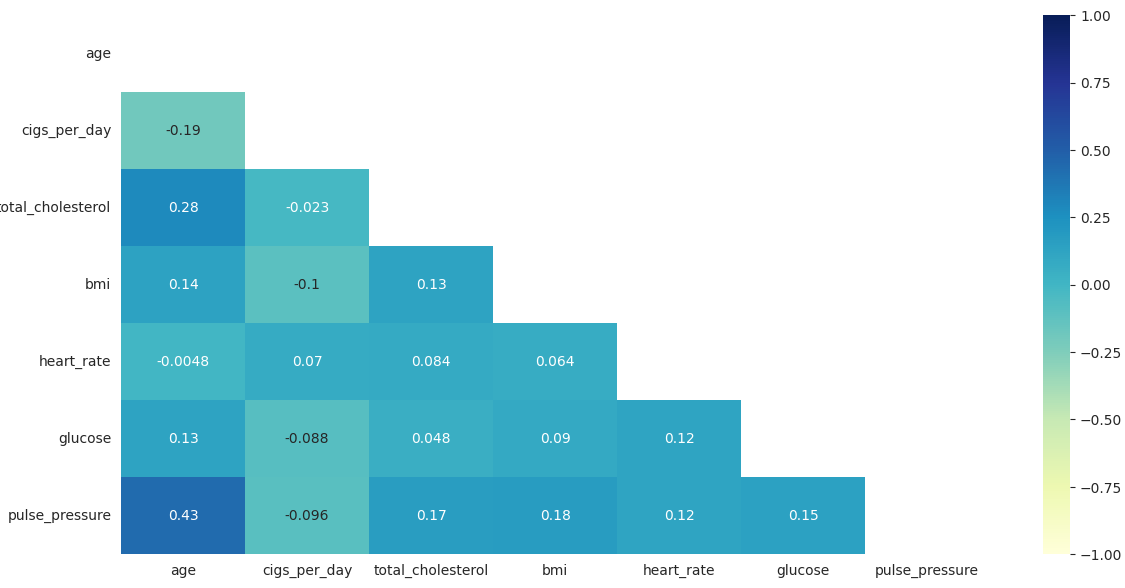

In [93]:
corr = data_2[continuous_var].corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 7))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

#### 2. Feature Selection

In [94]:
# Select your features wisely to avoid overfitting
# Dropping is_smoking
data_2.drop('is_smoking',axis=1,inplace=True)
categorical_var.remove('is_smoking')
categorical_var

['education',
 'sex',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes',
 'ten_year_chd']

In [95]:
# Updated columns
data_2.columns

Index(['age', 'sex', 'cigs_per_day', 'bp_meds', 'prevalent_stroke',
       'prevalent_hyp', 'diabetes', 'total_cholesterol', 'bmi', 'heart_rate',
       'glucose', 'ten_year_chd', 'education_1.0', 'education_2.0',
       'education_3.0', 'education_4.0', 'pulse_pressure'],
      dtype='object')

##### What all feature selection methods have you used  and why?

I have used variance inflation factor to remove multicollinearity and i found that the systolic and diastolic blood pressure have high VIF, so i created a new feature which is pulse pressure.

It was also found that the is_smoking column just had the values yes or no for smoking and the same was conveyed in the cigs per day column where for non smoker, the column had 0 and for smoker it had the number of cigeratte per day.

##### Which all features you found important and why?

Finally the important columns are 'age', 'sex', 'cigs_per_day', 'bp_meds', 'prevalent_stroke',
       'prevalent_hyp', 'diabetes', 'total_cholesterol', 'bmi', 'heart_rate',
       'glucose', 'ten_year_chd', 'education_1.0', 'education_2.0',
       'education_3.0', 'education_4.0', 'pulse_pressure'.

All these columns contains the demographic, behavioural, current medical and historic medical data.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [96]:
# Transform Your data
# Skewness along the index axis
(data_2[continuous_var]).skew(axis = 0)

age                  0.225796
cigs_per_day         1.127284
total_cholesterol    0.340533
bmi                  0.450492
heart_rate           0.418170
glucose              0.466921
pulse_pressure       0.946833
dtype: float64

In [97]:
# Skew for sqrt transformation
np.sqrt(data_2[continuous_var]).skew(axis = 0)

age                  0.103528
cigs_per_day         0.449712
total_cholesterol    0.094129
bmi                  0.255372
heart_rate           0.222906
glucose              0.270084
pulse_pressure       0.550119
dtype: float64

In [98]:
# Skew for log10 transformation
np.log10(data_2[continuous_var]+1).skew(axis = 0)

age                 -0.015053
cigs_per_day         0.273181
total_cholesterol   -0.157251
bmi                  0.073046
heart_rate           0.027928
glucose              0.069235
pulse_pressure       0.168465
dtype: float64

In [99]:
# Implementing log transformation & sqrt transformation on continuous variables

data_2['age']                   = np.log10(data_2['age']+1)
data_2['cigs_per_day']          = np.sqrt(data_2['cigs_per_day'])
data_2['total_cholesterol']     = np.log10(data_2['total_cholesterol']+1)
data_2['bmi']                   = np.sqrt(data_2['bmi'])
data_2['heart_rate']            = np.log10(data_2['heart_rate']+1)
data_2['glucose']               = np.sqrt(data_2['glucose'])
data_2['pulse_pressure']        = np.sqrt(data_2['pulse_pressure'])

In [100]:
# Checking skew after log transformation
data_2[continuous_var].skew(axis = 0)

age                 -0.015053
cigs_per_day         0.449712
total_cholesterol   -0.157251
bmi                  0.255372
heart_rate           0.027928
glucose              0.270084
pulse_pressure       0.550119
dtype: float64

Yes the data need to be transformed as it was skewed.

I used log transform and squareroot transform on the different continuous columns to reduce the skew of the data.

### 6. Data Scaling

In [101]:
# Scaling your data
scaler = StandardScaler()
features = [i for i in data_2.columns if i not in ['ten_year_chd']]

In [102]:
features

['age',
 'sex',
 'cigs_per_day',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes',
 'total_cholesterol',
 'bmi',
 'heart_rate',
 'glucose',
 'education_1.0',
 'education_2.0',
 'education_3.0',
 'education_4.0',
 'pulse_pressure']

In [103]:
continuous_var

['age',
 'cigs_per_day',
 'total_cholesterol',
 'bmi',
 'heart_rate',
 'glucose',
 'pulse_pressure']

In [104]:
data_2[continuous_var] = scaler.fit_transform(data_2[continuous_var])

In [105]:
# defining the X and y
X = data_2.drop('ten_year_chd',axis=1)
y = data_2['ten_year_chd']

##### Which method have you used to scale you data and why?

In this we have different independent features of different scale so i have used standard scalar method to scale our independent features into one scale.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is not needed. I have already reduced the number of features and only the important features are left.

### 8. Data Splitting

In [106]:
# Split your data to train and test. Choose Splitting ratio wisely.
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3697, stratify=y, shuffle=True)

In [107]:
# Checking the train distribution of dependent variable
y_train.value_counts()

0.0    2303
1.0     409
Name: ten_year_chd, dtype: int64

##### What data splitting ratio have you used and why?

To train the model i have split the data into train and test using train_test_split method.

I have split 80% of the data into train and 20% into test, this ratio provides a good balance between having enough data to train a model effectively and having enough data to evaluate the model’s performance on unseen data. By using 80% of the data for training, the model has access to a large amount of information to learn from, while the remaining 20% of the data can be used to assess how well the model generalizes to new data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes the dataset is imbalanced and the number of positive cases is very low compared to the negative cases.

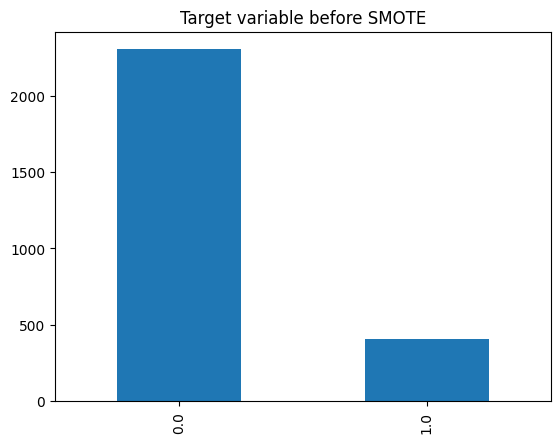

In [108]:
# Handling Imbalanced Dataset (If needed)

# Visualize the target variable before SMOTE
y_train.value_counts().plot(kind='bar', title='Target variable before SMOTE')
plt.show()

In [109]:
# Oversampling using SMOTETomek
# Fit predictor and target variable
X_smote, y_smote = SMOTETomek(random_state=0).fit_resample(X_train, y_train)

print('Samples in the original dataset: ', len(y_train))
print('Samples in the resampled dataset: ', len(y_smote))

Samples in the original dataset:  2712
Samples in the resampled dataset:  4586


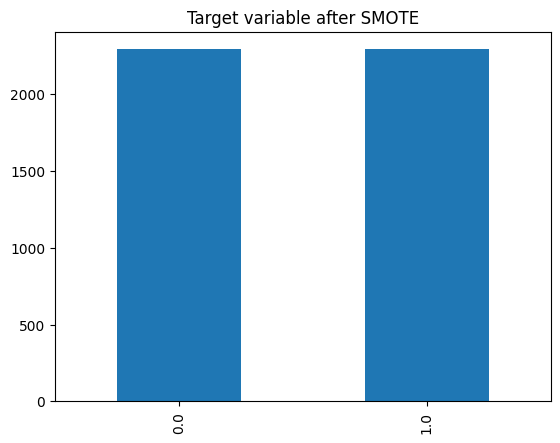

In [110]:
# Visualize the target variable after SMOTE
y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I used the SMOTE combined with Tomek links undersampling technique to handle the imbalanced dataset. SMOTE works by generating synthetic samples from the minority class to balance the class distribution. It does this by selecting instances that are close in the feature space and drawing a line between them, then creating new instances along this line. Tomek links undersampling removes Tomek links, which are pairs of instances from different classes that are very close to each other in the feature space. By removing these instances, the decision boundary between the classes can be made clearer.

I choose to use this technique because it can improve the performance of machine learning models on imbalanced datasets by balancing the class distribution and making the decision boundary between classes clearer. By combining oversampling of the minority class with undersampling of the majority class, I was able to achieve a balanced dataset while also removing potential noise and ambiguity from the data.

## ***7. ML Model Implementation***

In [111]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    try:
      try:
        feature_importance = model.feature_importances_
      except:
        feature_importance = model.coef_
      feature_importance = np.absolute(feature_importance)
      if len(feature_importance)==len(features):
        pass
      else:
        feature_importance = feature_importance[0]


      feat = pd.Series(feature_importance, index=features)
      feat = feat.sort_values(ascending=True)
      plt.figure(figsize=(10,6))
      plt.title('Feature Importances for '+str(model), fontsize = 18)
      plt.xlabel('Relative Importance')
      feat.plot(kind='barh', colormap= 'Dark2')
    except AttributeError:
        print("\nThe model does not have feature importances attribute.")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

In [112]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test','ROC-AUC Train', 'ROC-AUC Test','F1 macro Train', 'F1 macro Test'])

### ML Model - 1 : Logistic regression

In [113]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [117]:
pip install tabulate

  Obtaining dependency information for tabulate from https://files.pythonhosted.org/packages/40/44/4a5f08c96eb108af5cb50b41f76142f0afa346dfa99d5296fe7202a11854/tabulate-0.9.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Train ROC AUC: 0.7241604884430877
Test ROC AUC: 0.6527267156862745


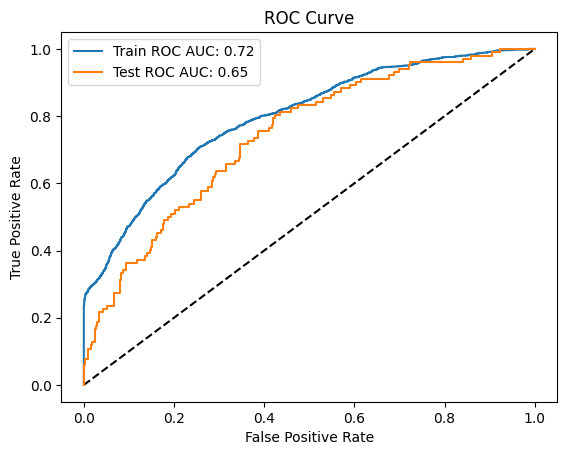


Confusion Matrix:


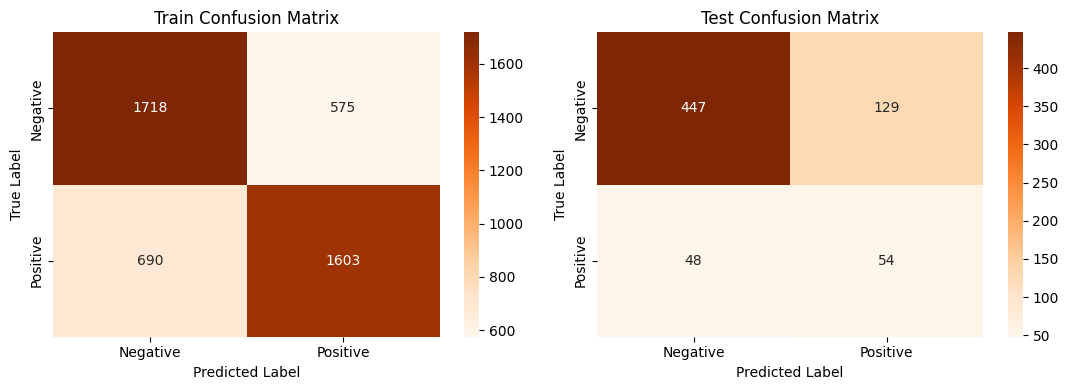


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.713455 | 0.749237 |   0.730908 | 2293       |
| 1.0          |    0.735996 | 0.699084 |   0.717066 | 2293       |
| accuracy     |    0.72416  | 0.72416  |   0.72416  |    0.72416 |
| macro avg    |    0.724726 | 0.72416  |   0.723987 | 4586       |
| weighted avg |    0.724726 | 0.72416  |   0.723987 | 4586       |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.90303  | 0.776042 |   0.834734 | 576        |
| 1.0          |    0.295082 | 0.529412 |   0.378947 | 102        |
| accuracy     |    0.738938 | 0.738938 |   0.738938 |   0.738938 |
| macro avg    |    0.599056 | 0.652727 |   0.606841 | 678        |
| weighted avg |    0.811569 | 0.738938 |   0.766164 | 67

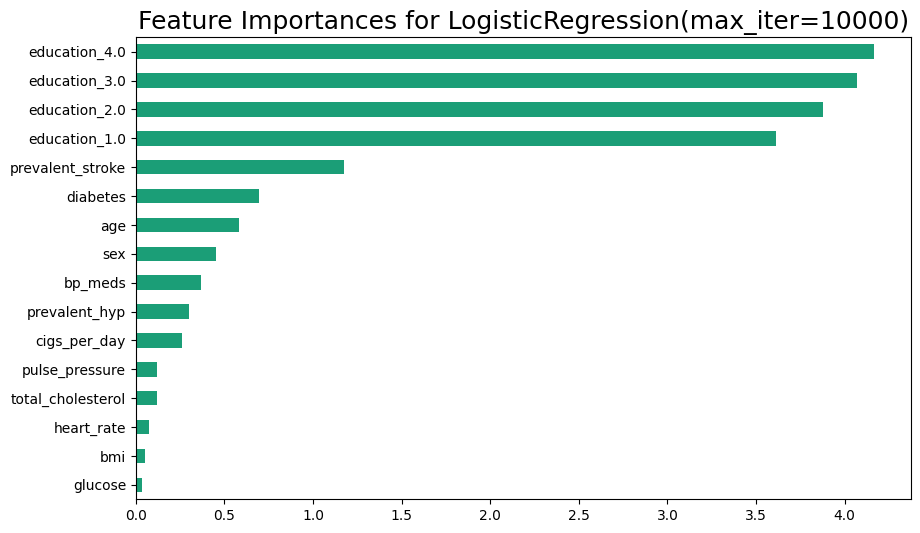

In [118]:
# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, X_smote, X_test, y_smote, y_test)

In [119]:
# Updated Evaluation metric Score Chart
score['Logistic regression'] = lr_score
score

Logistic regression
Precision Train             0.724726
Precision Test              0.811569
Recall Train                0.724160
Recall Test                 0.738938
Accuracy Train              0.724160
Accuracy Test               0.738938
ROC-AUC Train               0.724160
ROC-AUC Test                0.652727
F1 macro Train              0.723987
F1 macro Test               0.766164

#### 2. Cross- Validation & Hyperparameter Tuning

In [120]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(X_smote, y_smote)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [121]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Train ROC AUC: 0.7241604884430877
Test ROC AUC: 0.6527267156862745


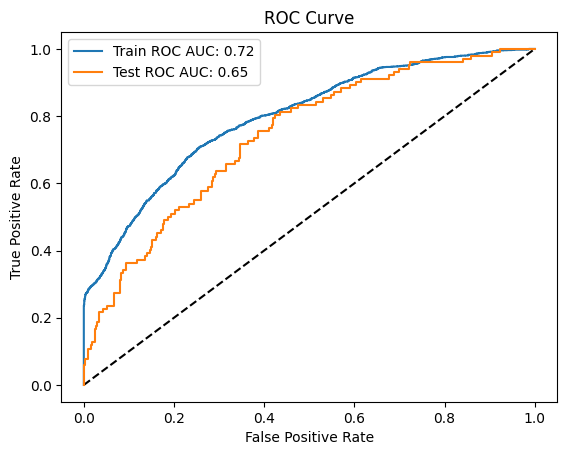


Confusion Matrix:


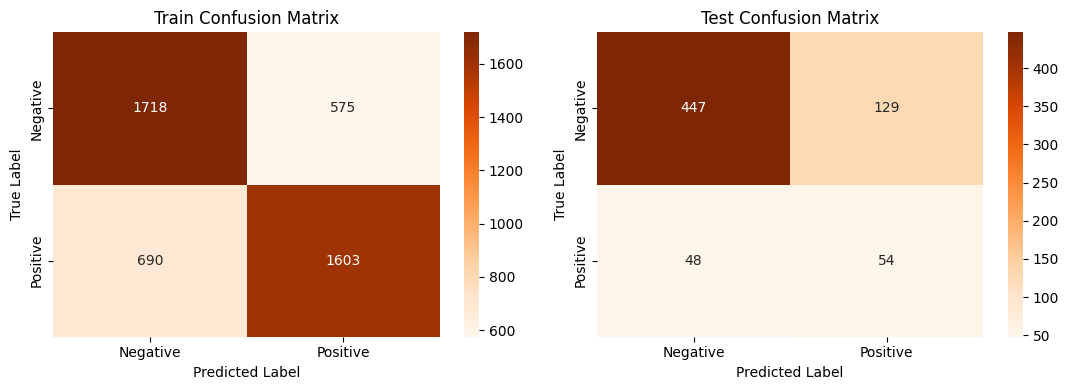


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.713455 | 0.749237 |   0.730908 | 2293       |
| 1.0          |    0.735996 | 0.699084 |   0.717066 | 2293       |
| accuracy     |    0.72416  | 0.72416  |   0.72416  |    0.72416 |
| macro avg    |    0.724726 | 0.72416  |   0.723987 | 4586       |
| weighted avg |    0.724726 | 0.72416  |   0.723987 | 4586       |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.90303  | 0.776042 |   0.834734 | 576        |
| 1.0          |    0.295082 | 0.529412 |   0.378947 | 102        |
| accuracy     |    0.738938 | 0.738938 |   0.738938 |   0.738938 |
| macro avg    |    0.599056 | 0.652727 |   0.606841 | 678        |
| weighted avg |    0.811569 | 0.738938 |   0.766164 | 67

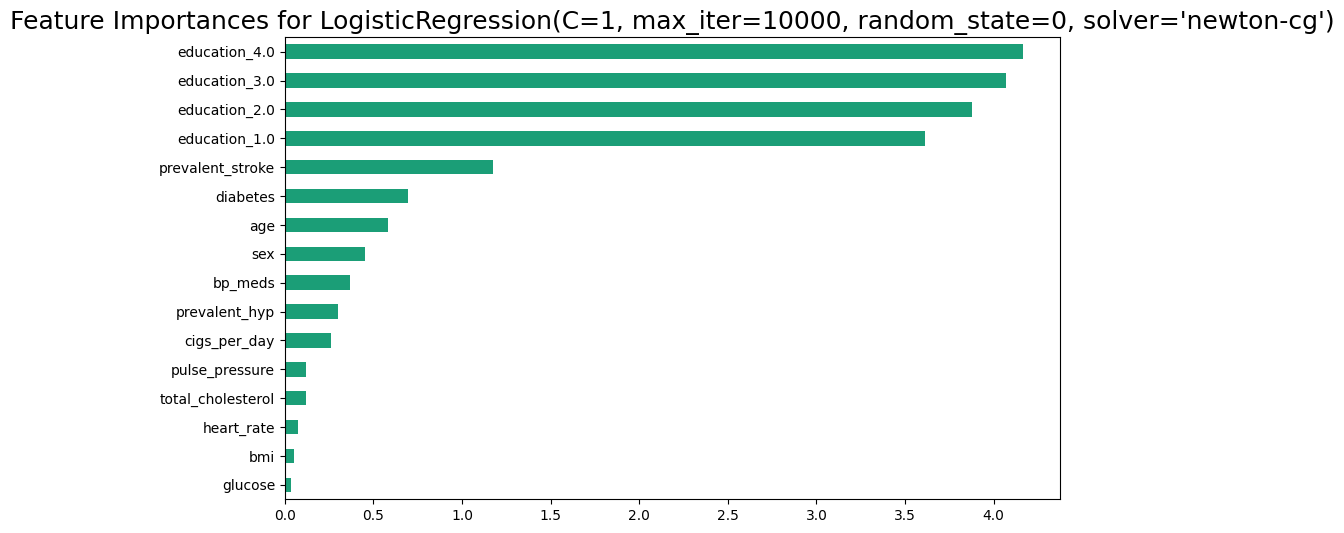

In [122]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, X_smote, X_test, y_smote, y_test)

In [123]:
score['Logistic regression tuned'] = lr_score2

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a method that performs an exhaustive search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it is simple to implement and can be effective in finding good hyperparameters for a model.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. GridSearchCV can be a good choice when the parameter space is relatively small and computational resources are not a major concern.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [124]:
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned
Precision Train             0.724726                   0.724726
Precision Test              0.811569                   0.811569
Recall Train                0.724160                   0.724160
Recall Test                 0.738938                   0.738938
Accuracy Train              0.724160                   0.724160
Accuracy Test               0.738938                   0.738938
ROC-AUC Train               0.724160                   0.724160
ROC-AUC Test                0.652727                   0.652727
F1 macro Train              0.723987                   0.723987
F1 macro Test               0.766164                   0.766164

It appears that hyperparameter tuning did not improve the performance of the Logistic Regression model on the test set. The precision, recall, accuracy, ROC-AUC, and F1 scores on the test set are the same for both the untuned and tuned Logistic Regression models.

### ML Model - 2 : Decision Tree

In [125]:
# ML Model - 2 Implementation
dt_model = DecisionTreeClassifier(random_state=20)

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 1.0
Test ROC AUC: 0.5409007352941175


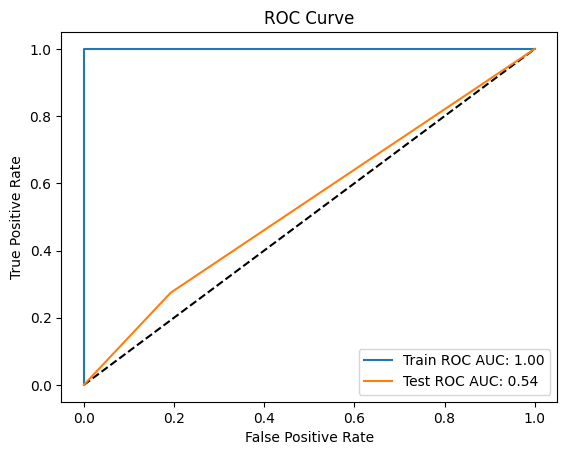


Confusion Matrix:


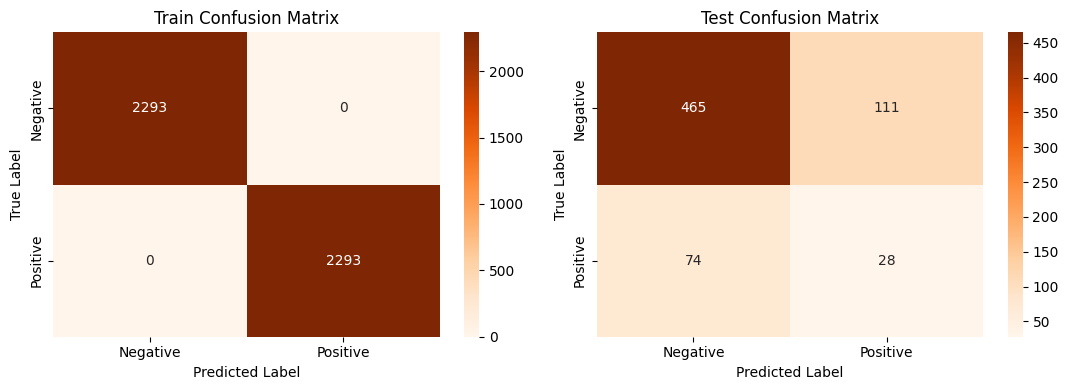


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |           1 |        1 |          1 |      2293 |
| 1.0          |           1 |        1 |          1 |      2293 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      4586 |
| weighted avg |           1 |        1 |          1 |      4586 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.862709 | 0.807292 |   0.834081 | 576        |
| 1.0          |    0.201439 | 0.27451  |   0.232365 | 102        |
| accuracy     |    0.727139 | 0.727139 |   0.727139 |   0.727139 |
| macro avg    |    0.532074 | 0.540901 |   0.533223 | 678        |
| weighted avg |    0.763226 | 0.727139 |   0.743557 | 678      

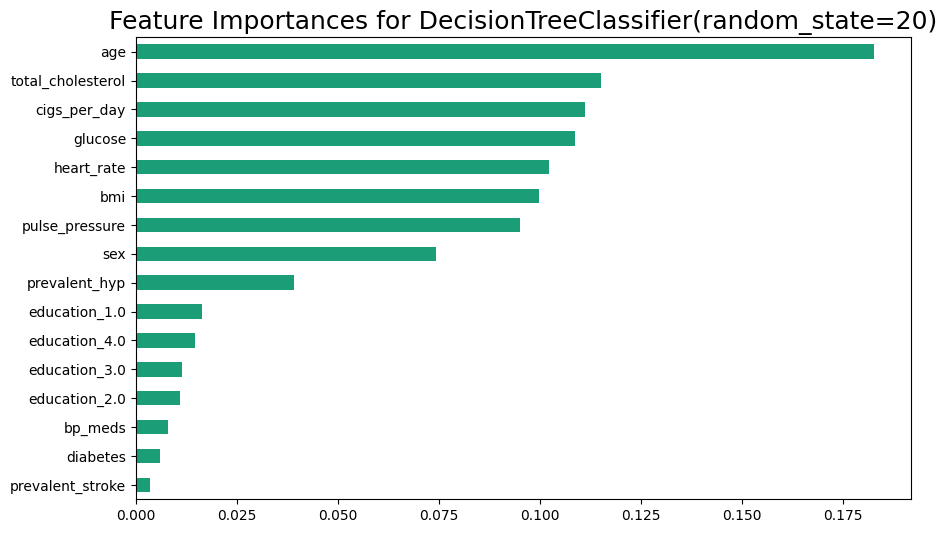

In [126]:
# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt_model, X_smote, X_test, y_smote, y_test)

In [127]:
# Updated Evaluation metric Score Chart
score['Decision Tree'] = dt_score
score

Logistic regression  Logistic regression tuned  Decision Tree
Precision Train             0.724726                   0.724726       1.000000
Precision Test              0.811569                   0.811569       0.763226
Recall Train                0.724160                   0.724160       1.000000
Recall Test                 0.738938                   0.738938       0.727139
Accuracy Train              0.724160                   0.724160       1.000000
Accuracy Test               0.738938                   0.738938       0.727139
ROC-AUC Train               0.724160                   0.724160       1.000000
ROC-AUC Test                0.652727                   0.652727       0.540901
F1 macro Train              0.723987                   0.723987       1.000000
F1 macro Test               0.766164                   0.766164       0.743557

#### 2. Cross- Validation & Hyperparameter Tuning

In [128]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 5}


In [129]:
# Train a new model with the best hyperparameters
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Train ROC AUC: 0.805276929786306
Test ROC AUC: 0.5932393790849673


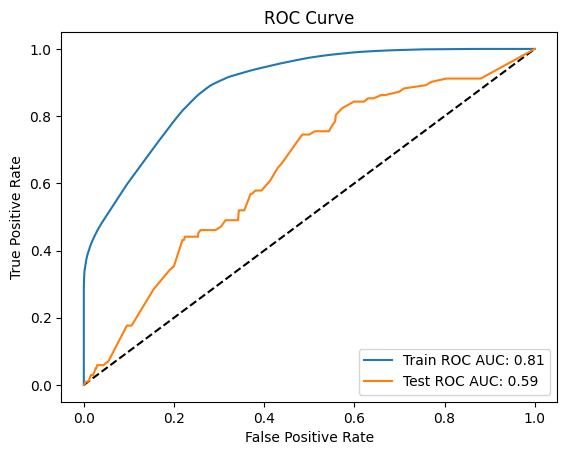


Confusion Matrix:


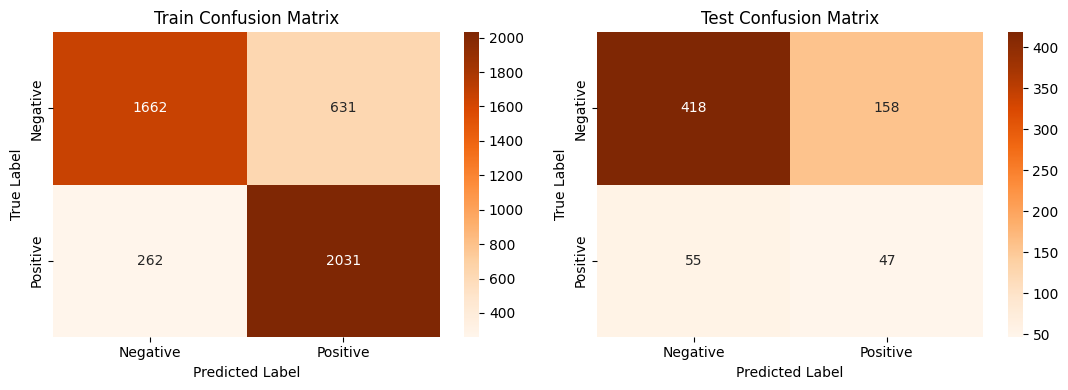


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.863825 | 0.724815 |   0.788238 | 2293        |
| 1.0          |    0.76296  | 0.885739 |   0.819778 | 2293        |
| accuracy     |    0.805277 | 0.805277 |   0.805277 |    0.805277 |
| macro avg    |    0.813393 | 0.805277 |   0.804008 | 4586        |
| weighted avg |    0.813393 | 0.805277 |   0.804008 | 4586        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.883721 | 0.725694 |   0.796949 | 576        |
| 1.0          |    0.229268 | 0.460784 |   0.306189 | 102        |
| accuracy     |    0.685841 | 0.685841 |   0.685841 |   0.685841 |
| macro avg    |    0.556495 | 0.593239 |   0.551569 | 678        |
| weighted avg |    0.785263 | 0.685841 |   0.7231

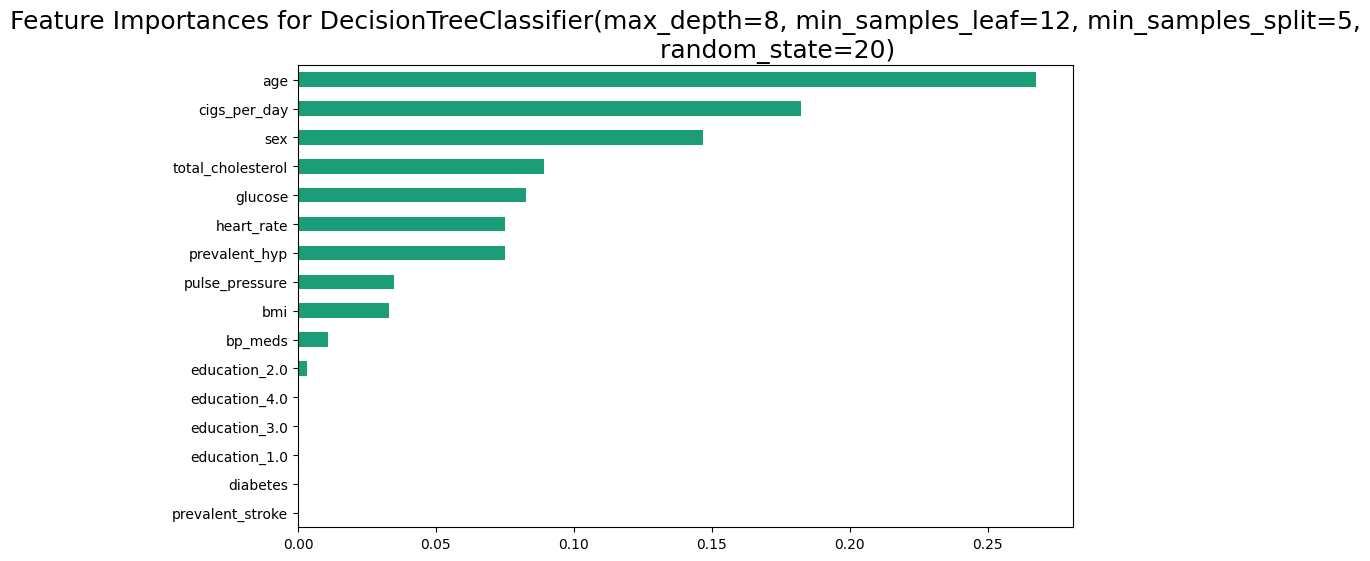

In [130]:
# Visualizing evaluation Metric Score chart
dt2_score = evaluate_model(dt_model2, X_smote, X_test, y_smote, y_test)

In [131]:
score['Decision Tree tuned'] = dt2_score

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a method that performs an exhaustive search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it is simple to implement and can be effective in finding good hyperparameters for a model.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. GridSearchCV can be a good choice when the parameter space is relatively small and computational resources are not a major concern.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [132]:
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.724726                   0.724726   
Precision Test              0.811569                   0.811569   
Recall Train                0.724160                   0.724160   
Recall Test                 0.738938                   0.738938   
Accuracy Train              0.724160                   0.724160   
Accuracy Test               0.738938                   0.738938   
ROC-AUC Train               0.724160                   0.724160   
ROC-AUC Test                0.652727                   0.652727   
F1 macro Train              0.723987                   0.723987   
F1 macro Test               0.766164                   0.766164   

                 Decision Tree  Decision Tree tuned  
Precision Train       1.000000             0.813393  
Precision Test        0.763226             0.785263  
Recall Train          1.000000             0.805277  
Recall Test           0.727139             0.685841  
Accuracy Train        1.000000             0.805277  
Accuracy Test         0.727139             0.685841  
ROC-AUC Train         1.000000             0.805277  
ROC-AUC Test          0.540901             0.593239  
F1 macro Train        1.000000             0.804008  
F1 macro Test         0.743557             0.723118

It appears that hyperparameter tuning improved the performance of the Decision Tree model on the test set. The tuned Decision Tree model has higher precision and ROC-AUC scores on the test set compared to the untuned Decision Tree model. However, the recall, accuracy, and F1 scores on the test set decreased slightly after tuning.

The tuned model is not overfitting like the untuned model.

### ML Model - 3 : Random Forest

In [133]:
# ML Model - 3 Implementation
rf_model = RandomForestClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 1.0
Test ROC AUC: 0.5667892156862745


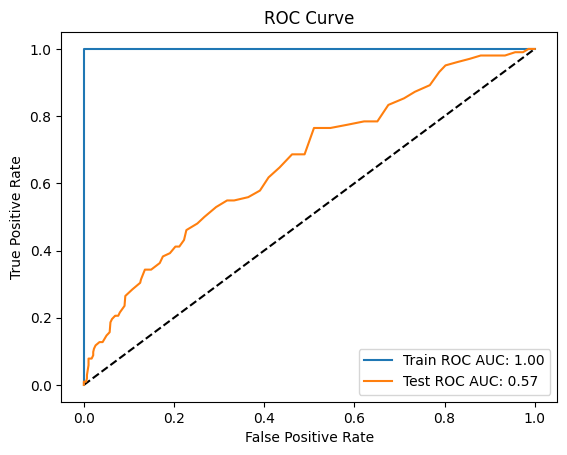


Confusion Matrix:


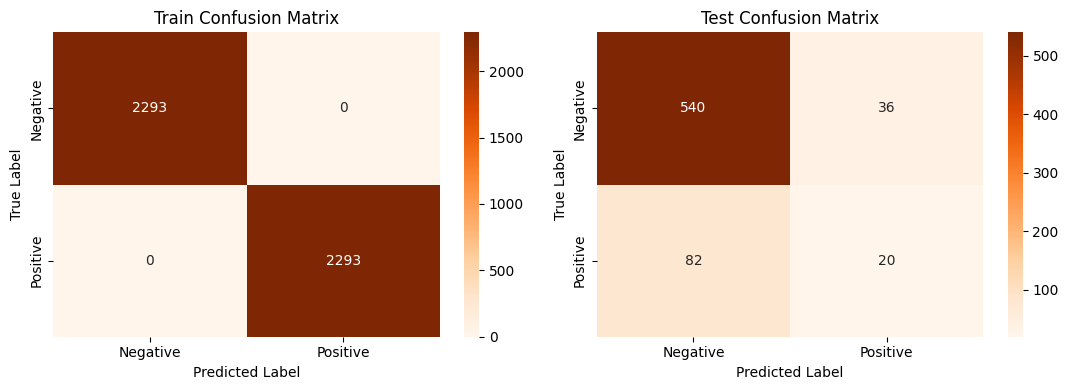


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |           1 |        1 |          1 |      2293 |
| 1.0          |           1 |        1 |          1 |      2293 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      4586 |
| weighted avg |           1 |        1 |          1 |      4586 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.868167 | 0.9375   |   0.901503 | 576        |
| 1.0          |    0.357143 | 0.196078 |   0.253165 | 102        |
| accuracy     |    0.825959 | 0.825959 |   0.825959 |   0.825959 |
| macro avg    |    0.612655 | 0.566789 |   0.577334 | 678        |
| weighted avg |    0.791287 | 0.825959 |   0.803965 | 678      

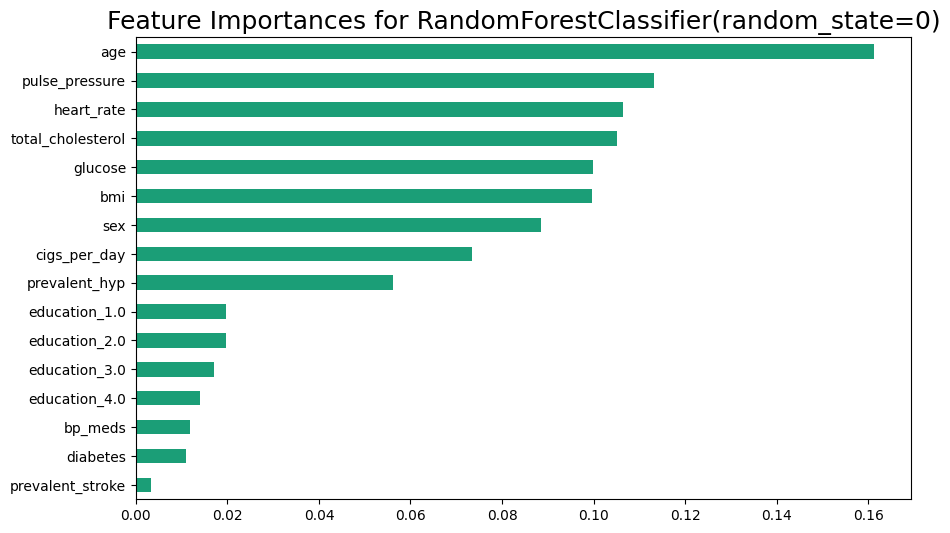

In [134]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf_model, X_smote, X_test, y_smote, y_test)

In [135]:
# Updated Evaluation metric Score Chart
score['Random Forest'] = rf_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.724726                   0.724726   
Precision Test              0.811569                   0.811569   
Recall Train                0.724160                   0.724160   
Recall Test                 0.738938                   0.738938   
Accuracy Train              0.724160                   0.724160   
Accuracy Test               0.738938                   0.738938   
ROC-AUC Train               0.724160                   0.724160   
ROC-AUC Test                0.652727                   0.652727   
F1 macro Train              0.723987                   0.723987   
F1 macro Test               0.766164                   0.766164   

                 Decision Tree  Decision Tree tuned  Random Forest  
Precision Train       1.000000             0.813393       1.000000  
Precision Test        0.763226             0.785263       0.791287  
Recall Train          1.000000             0.805277       1.000000  
Recall Test           0.727139             0.685841       0.825959  
Accuracy Train        1.000000             0.805277       1.000000  
Accuracy Test         0.727139             0.685841       0.825959  
ROC-AUC Train         1.000000             0.805277       1.000000  
ROC-AUC Test          0.540901             0.593239       0.566789  
F1 macro Train        1.000000             0.804008       1.000000  
F1 macro Test         0.743557             0.723118       0.803965

#### 2. Cross- Validation & Hyperparameter Tuning

In [136]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 15}


In [137]:
# Initialize model with best parameters
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Train ROC AUC: 0.9600959441779329
Test ROC AUC: 0.5681678921568627


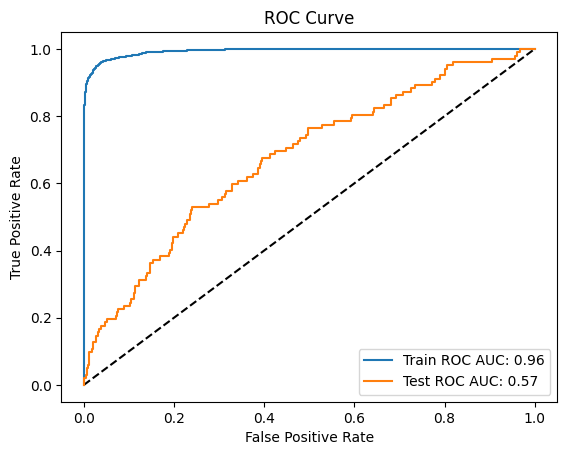


Confusion Matrix:


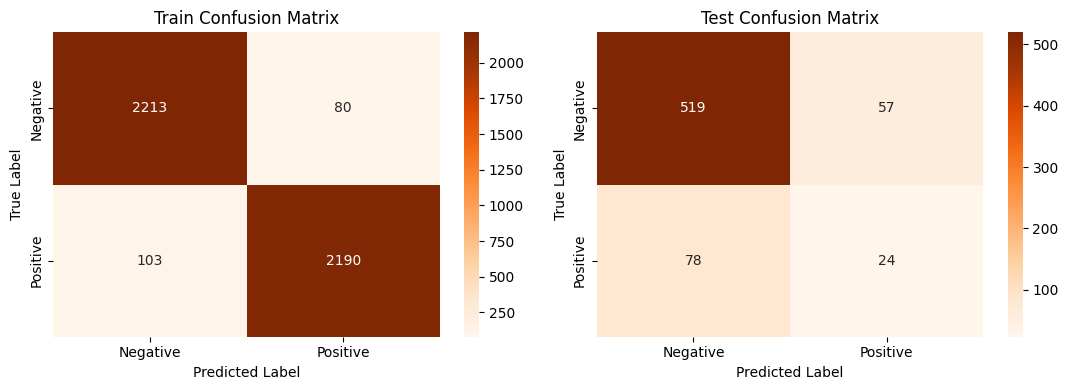


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.955527 | 0.965111 |   0.960295 | 2293        |
| 1.0          |    0.964758 | 0.955081 |   0.959895 | 2293        |
| accuracy     |    0.960096 | 0.960096 |   0.960096 |    0.960096 |
| macro avg    |    0.960142 | 0.960096 |   0.960095 | 4586        |
| weighted avg |    0.960142 | 0.960096 |   0.960095 | 4586        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.869347 | 0.901042 |   0.88491  | 576        |
| 1.0          |    0.296296 | 0.235294 |   0.262295 | 102        |
| accuracy     |    0.800885 | 0.800885 |   0.800885 |   0.800885 |
| macro avg    |    0.582822 | 0.568168 |   0.573603 | 678        |
| weighted avg |    0.783136 | 0.800885 |   0.7912

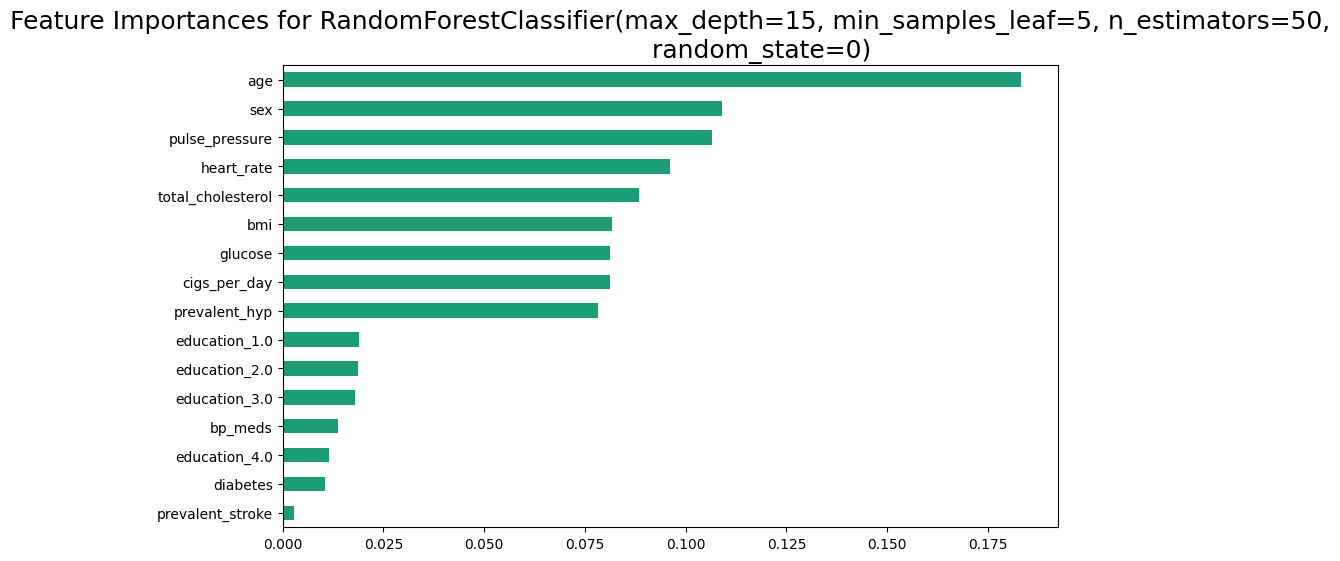

In [138]:
# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf_model2, X_smote, X_test, y_smote, y_test)

In [139]:
score['Random Forest tuned'] = rf2_score

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique i used is RandomizedSearchCV. RandomizedSearchCV is a method that performs a random search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it can be more efficient than exhaustive search methods like GridSearchCV when the parameter space is large.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. RandomizedSearchCV can be a good choice when the parameter space is large and computational resources are limited.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [140]:
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.724726                   0.724726   
Precision Test              0.811569                   0.811569   
Recall Train                0.724160                   0.724160   
Recall Test                 0.738938                   0.738938   
Accuracy Train              0.724160                   0.724160   
Accuracy Test               0.738938                   0.738938   
ROC-AUC Train               0.724160                   0.724160   
ROC-AUC Test                0.652727                   0.652727   
F1 macro Train              0.723987                   0.723987   
F1 macro Test               0.766164                   0.766164   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.813393       1.000000   
Precision Test        0.763226             0.785263       0.791287   
Recall Train          1.000000             0.805277       1.000000   
Recall Test           0.727139             0.685841       0.825959   
Accuracy Train        1.000000             0.805277       1.000000   
Accuracy Test         0.727139             0.685841       0.825959   
ROC-AUC Train         1.000000             0.805277       1.000000   
ROC-AUC Test          0.540901             0.593239       0.566789   
F1 macro Train        1.000000             0.804008       1.000000   
F1 macro Test         0.743557             0.723118       0.803965   

                 Random Forest tuned  
Precision Train             0.960142  
Precision Test              0.783136  
Recall Train                0.960096  
Recall Test                 0.800885  
Accuracy Train              0.960096  
Accuracy Test               0.800885  
ROC-AUC Train               0.960096  
ROC-AUC Test                0.568168  
F1 macro Train              0.960095  
F1 macro Test               0.791243

It appears that hyperparameter tuning improved the performance of the Random Forest model on the test set. The tuned Random Forest model has higher precision, ROC-AUC and F1 score on the test set compared to the untuned Random Forest model. The recall and accuracy score on the test set decreased slightly after tuning.

### ML Model - 4 : SVM (Support Vector Machine)

In [141]:
# ML Model - 4 Implementation
svm_model = SVC(kernel='linear', random_state=0, probability=True)

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.7228521587440034
Test ROC AUC: 0.6699857026143792


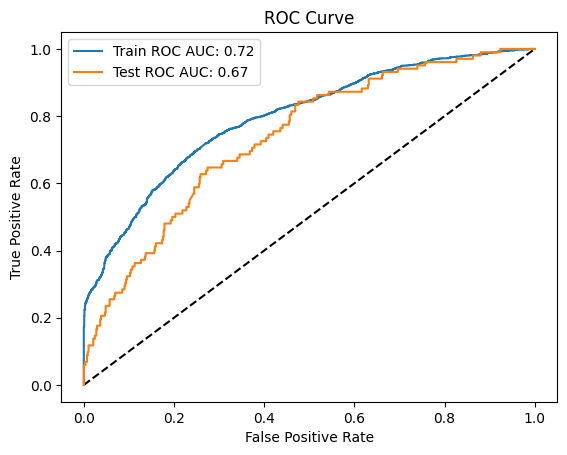


Confusion Matrix:


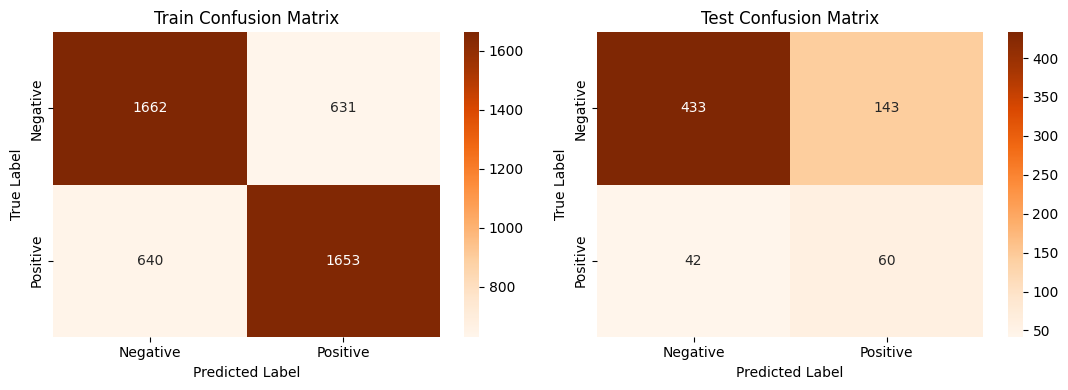


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.721981 | 0.724815 |   0.723395 | 2293        |
| 1.0          |    0.72373  | 0.72089  |   0.722307 | 2293        |
| accuracy     |    0.722852 | 0.722852 |   0.722852 |    0.722852 |
| macro avg    |    0.722856 | 0.722852 |   0.722851 | 4586        |
| weighted avg |    0.722856 | 0.722852 |   0.722851 | 4586        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.911579 | 0.751736 |   0.823977 | 576        |
| 1.0          |    0.295567 | 0.588235 |   0.393443 | 102        |
| accuracy     |    0.727139 | 0.727139 |   0.727139 |   0.727139 |
| macro avg    |    0.603573 | 0.669986 |   0.60871  | 678        |
| weighted avg |    0.818905 | 0.727139 |   0.7592

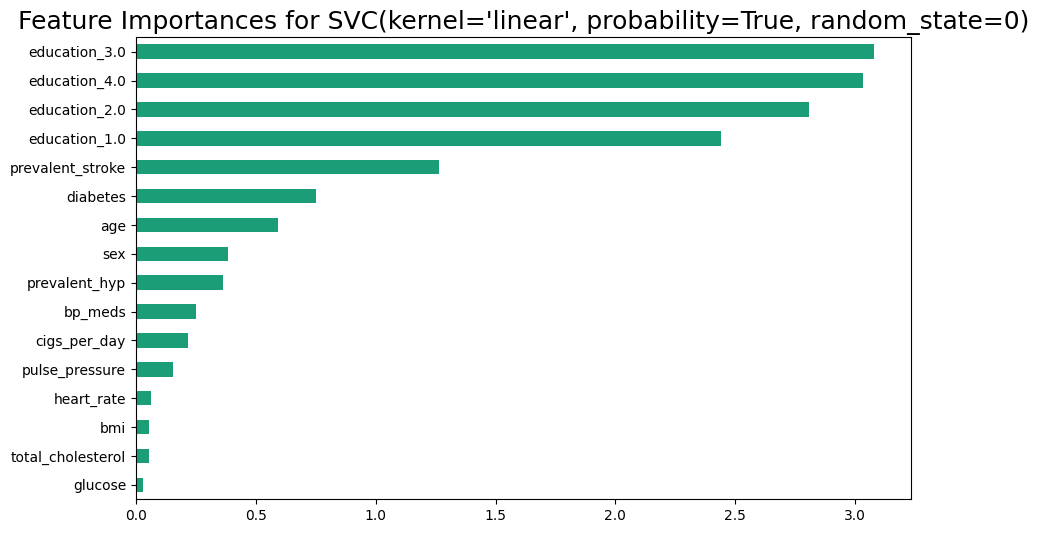

In [142]:
# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm_model, X_smote, X_test, y_smote, y_test)

In [143]:
# Updated Evaluation metric Score Chart
score['SVM'] = svm_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.724726                   0.724726   
Precision Test              0.811569                   0.811569   
Recall Train                0.724160                   0.724160   
Recall Test                 0.738938                   0.738938   
Accuracy Train              0.724160                   0.724160   
Accuracy Test               0.738938                   0.738938   
ROC-AUC Train               0.724160                   0.724160   
ROC-AUC Test                0.652727                   0.652727   
F1 macro Train              0.723987                   0.723987   
F1 macro Test               0.766164                   0.766164   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.813393       1.000000   
Precision Test        0.763226             0.785263       0.791287   
Recall Train          1.000000             0.805277       1.000000   
Recall Test           0.727139             0.685841       0.825959   
Accuracy Train        1.000000             0.805277       1.000000   
Accuracy Test         0.727139             0.685841       0.825959   
ROC-AUC Train         1.000000             0.805277       1.000000   
ROC-AUC Test          0.540901             0.593239       0.566789   
F1 macro Train        1.000000             0.804008       1.000000   
F1 macro Test         0.743557             0.723118       0.803965   

                 Random Forest tuned       SVM  
Precision Train             0.960142  0.722856  
Precision Test              0.783136  0.818905  
Recall Train                0.960096  0.722852  
Recall Test                 0.800885  0.727139  
Accuracy Train              0.960096  0.722852  
Accuracy Test               0.800885  0.727139  
ROC-AUC Train               0.960096  0.722852  
ROC-AUC Test                0.568168  0.669986  
F1 macro Train              0.960095  0.722851  
F1 macro Test               0.791243  0.759206

#### 2. Cross- Validation & Hyperparameter Tuning

In [144]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

# Initialize the model
svm = SVC(random_state=0, probability=True)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV with kfold cross-validation
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'kernel': 'rbf', 'degree': 4, 'C': 9.1}


In [145]:
# Initialize model with best parameters
svm_model2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)


Train ROC AUC: 0.9228085477540341
Test ROC AUC: 0.5804227941176472


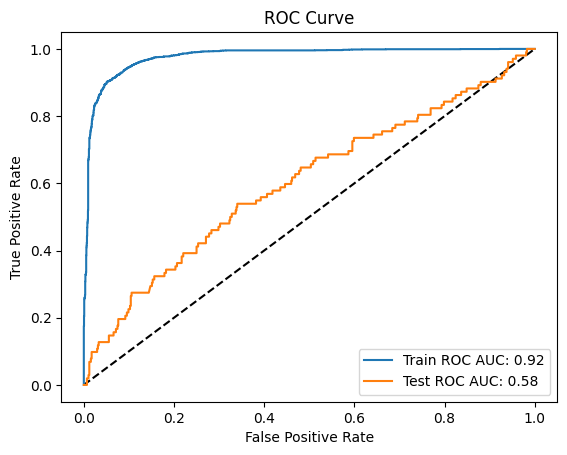


Confusion Matrix:


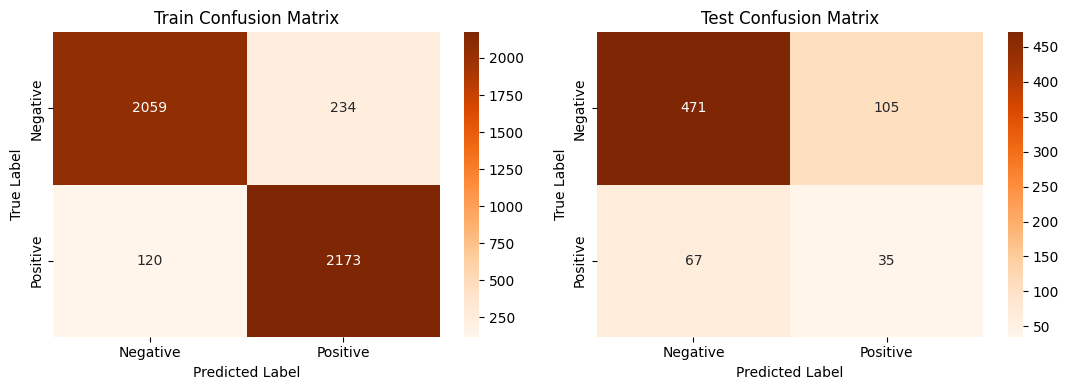


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.944929 | 0.89795  |   0.920841 | 2293        |
| 1.0          |    0.902784 | 0.947667 |   0.924681 | 2293        |
| accuracy     |    0.922809 | 0.922809 |   0.922809 |    0.922809 |
| macro avg    |    0.923856 | 0.922809 |   0.922761 | 4586        |
| weighted avg |    0.923856 | 0.922809 |   0.922761 | 4586        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.875465 | 0.817708 |   0.845601 | 576        |
| 1.0          |    0.25     | 0.343137 |   0.289256 | 102        |
| accuracy     |    0.746313 | 0.746313 |   0.746313 |   0.746313 |
| macro avg    |    0.562732 | 0.580423 |   0.567429 | 678        |
| weighted avg |    0.781368 | 0.746313 |   0.7619

In [146]:
# Visualizing evaluation Metric Score chart
svm2_score = evaluate_model(svm_model2, X_smote, X_test, y_smote, y_test)

In [147]:
score['SVM tuned'] = svm2_score

##### Which hyperparameter optimization technique have you used and why?

 Here Randomized search is used as a hyperparameter optimization technique.
 Randomized search is a popular technique because it can be more efficient than exhaustive search methods like grid search. Instead of trying all possible combinations of hyperparameters, randomized search samples a random subset of the hyperparameter space. This can save time and computational resources while still finding good hyperparameters for the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [148]:
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.724726                   0.724726   
Precision Test              0.811569                   0.811569   
Recall Train                0.724160                   0.724160   
Recall Test                 0.738938                   0.738938   
Accuracy Train              0.724160                   0.724160   
Accuracy Test               0.738938                   0.738938   
ROC-AUC Train               0.724160                   0.724160   
ROC-AUC Test                0.652727                   0.652727   
F1 macro Train              0.723987                   0.723987   
F1 macro Test               0.766164                   0.766164   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.813393       1.000000   
Precision Test        0.763226             0.785263       0.791287   
Recall Train          1.000000             0.805277       1.000000   
Recall Test           0.727139             0.685841       0.825959   
Accuracy Train        1.000000             0.805277       1.000000   
Accuracy Test         0.727139             0.685841       0.825959   
ROC-AUC Train         1.000000             0.805277       1.000000   
ROC-AUC Test          0.540901             0.593239       0.566789   
F1 macro Train        1.000000             0.804008       1.000000   
F1 macro Test         0.743557             0.723118       0.803965   

                 Random Forest tuned       SVM  SVM tuned  
Precision Train             0.960142  0.722856   0.923856  
Precision Test              0.783136  0.818905   0.781368  
Recall Train                0.960096  0.722852   0.922809  
Recall Test                 0.800885  0.727139   0.746313  
Accuracy Train              0.960096  0.722852   0.922809  
Accuracy Test               0.800885  0.727139   0.746313  
ROC-AUC Train               0.960096  0.722852   0.922809  
ROC-AUC Test                0.568168  0.669986   0.580423  
F1 macro Train              0.960095  0.722851   0.922761  
F1 macro Test               0.791243  0.759206   0.761903

It appears that hyperparameter tuning improved the performance of the SVM model on the test set. The tuned SVM model has higher recall, accuracy, and F1 score on the test set compared to the untuned SVM model. However, the precision and ROC-AUC scores on the test set decreased slightly after tuning.

### ML Model - 5 : Xtreme Gradient Boosting

In [149]:
# ML Model - 5 Implementation
xgb_model = xgb.XGBClassifier()

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.9986916703009159
Test ROC AUC: 0.5316074346405228


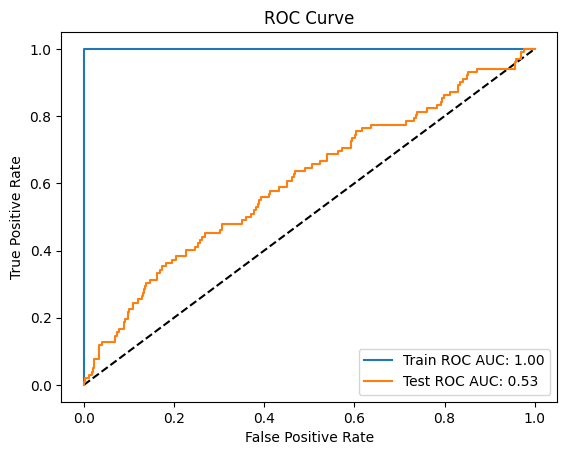


Confusion Matrix:


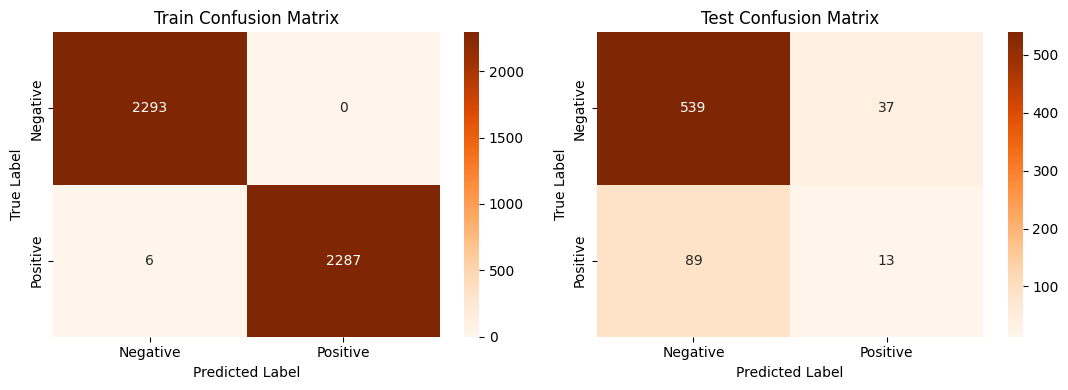


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.99739  | 1        |   0.998693 | 2293        |
| 1.0          |    1        | 0.997383 |   0.99869  | 2293        |
| accuracy     |    0.998692 | 0.998692 |   0.998692 |    0.998692 |
| macro avg    |    0.998695 | 0.998692 |   0.998692 | 4586        |
| weighted avg |    0.998695 | 0.998692 |   0.998692 | 4586        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.85828  | 0.935764 |   0.895349 | 576        |
| 1.0          |    0.26     | 0.127451 |   0.171053 | 102        |
| accuracy     |    0.814159 | 0.814159 |   0.814159 |   0.814159 |
| macro avg    |    0.55914  | 0.531607 |   0.533201 | 678        |
| weighted avg |    0.768273 | 0.814159 |   0.7863

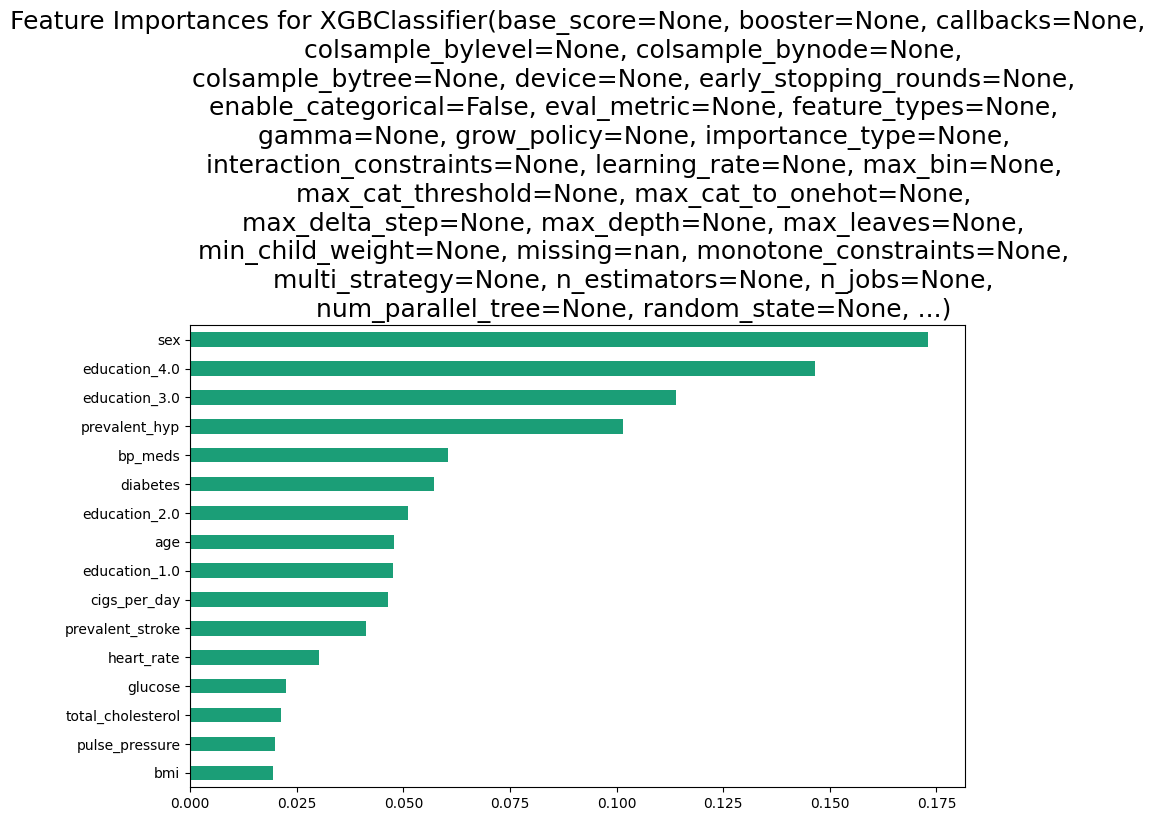

In [150]:
# Visualizing evaluation Metric Score chart
xgb_score = evaluate_model(xgb_model, X_smote, X_test, y_smote, y_test)

In [151]:
# Updated Evaluation metric Score Chart
score['XGB'] = xgb_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.724726                   0.724726   
Precision Test              0.811569                   0.811569   
Recall Train                0.724160                   0.724160   
Recall Test                 0.738938                   0.738938   
Accuracy Train              0.724160                   0.724160   
Accuracy Test               0.738938                   0.738938   
ROC-AUC Train               0.724160                   0.724160   
ROC-AUC Test                0.652727                   0.652727   
F1 macro Train              0.723987                   0.723987   
F1 macro Test               0.766164                   0.766164   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.813393       1.000000   
Precision Test        0.763226             0.785263       0.791287   
Recall Train          1.000000             0.805277       1.000000   
Recall Test           0.727139             0.685841       0.825959   
Accuracy Train        1.000000             0.805277       1.000000   
Accuracy Test         0.727139             0.685841       0.825959   
ROC-AUC Train         1.000000             0.805277       1.000000   
ROC-AUC Test          0.540901             0.593239       0.566789   
F1 macro Train        1.000000             0.804008       1.000000   
F1 macro Test         0.743557             0.723118       0.803965   

                 Random Forest tuned       SVM  SVM tuned       XGB  
Precision Train             0.960142  0.722856   0.923856  0.998695  
Precision Test              0.783136  0.818905   0.781368  0.768273  
Recall Train                0.960096  0.722852   0.922809  0.998692  
Recall Test                 0.800885  0.727139   0.746313  0.814159  
Accuracy Train              0.960096  0.722852   0.922809  0.998692  
Accuracy Test               0.800885  0.727139   0.746313  0.814159  
ROC-AUC Train               0.960096  0.722852   0.922809  0.998692  
ROC-AUC Test                0.568168  0.669986   0.580423  0.531607  
F1 macro Train              0.960095  0.722851   0.922761  0.998692  
F1 macro Test               0.791243  0.759206   0.761903  0.786384

#### 2. Cross- Validation & Hyperparameter Tuning

In [152]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

# Initialize the model
xgb2 = xgb.XGBClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2, param_grid, n_iter=10, cv=rskf)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 140, 'max_depth': 10, 'learning_rate': 0.18000000000000002}


In [153]:
# Initialize model with best parameters
xgb_model2 = xgb.XGBClassifier(learning_rate = best_params['learning_rate'],
                                 max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                                 random_state=0)


Train ROC AUC: 1.0
Test ROC AUC: 0.552951388888889


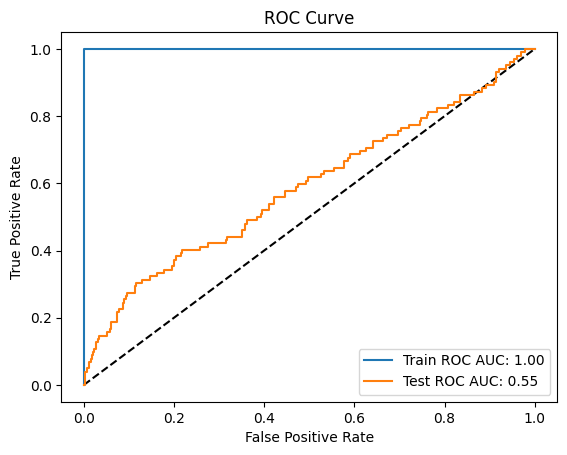


Confusion Matrix:


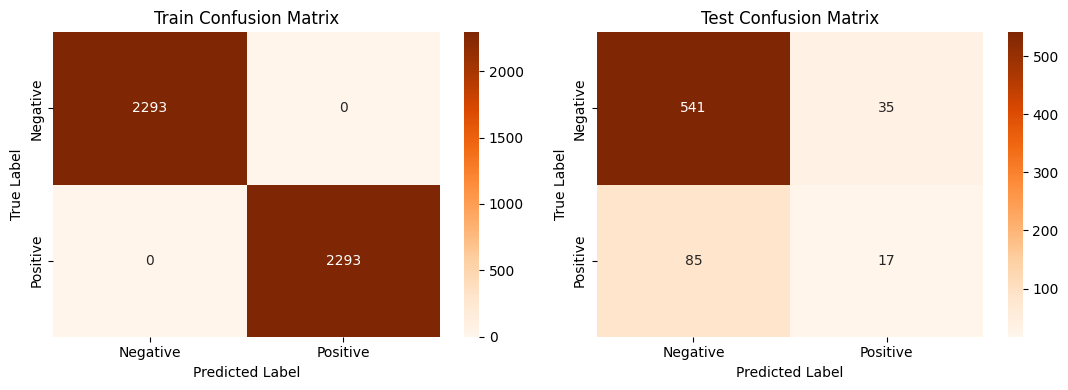


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |           1 |        1 |          1 |      2293 |
| 1.0          |           1 |        1 |          1 |      2293 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      4586 |
| weighted avg |           1 |        1 |          1 |      4586 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.864217 | 0.939236 |   0.900166 | 576        |
| 1.0          |    0.326923 | 0.166667 |   0.220779 | 102        |
| accuracy     |    0.823009 | 0.823009 |   0.823009 |   0.823009 |
| macro avg    |    0.59557  | 0.552951 |   0.560473 | 678        |
| weighted avg |    0.783385 | 0.823009 |   0.797958 | 678      

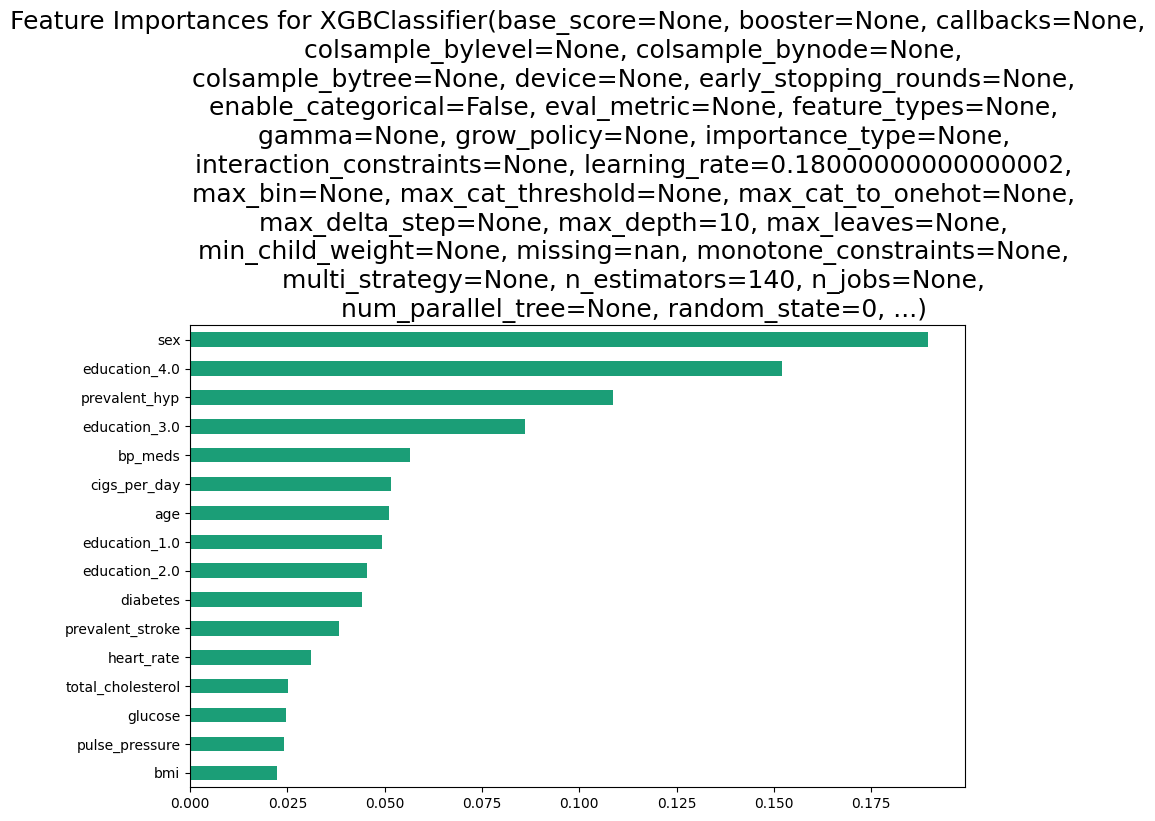

In [154]:
# Visualizing evaluation Metric Score chart
xgb2_score = evaluate_model(xgb_model2, X_smote, X_test, y_smote, y_test)

In [155]:
score['XGB tuned'] = xgb2_score

##### Which hyperparameter optimization technique have you used and why?

Here we have used Randomized search to tune the XGB model.

Randomized search is a popular technique because it can be more efficient than exhaustive search methods like grid search. Instead of trying all possible combinations of hyperparameters, randomized search samples a random subset of the hyperparameter space. This can save time and computational resources while still finding good hyperparameters for the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [156]:
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.724726                   0.724726   
Precision Test              0.811569                   0.811569   
Recall Train                0.724160                   0.724160   
Recall Test                 0.738938                   0.738938   
Accuracy Train              0.724160                   0.724160   
Accuracy Test               0.738938                   0.738938   
ROC-AUC Train               0.724160                   0.724160   
ROC-AUC Test                0.652727                   0.652727   
F1 macro Train              0.723987                   0.723987   
F1 macro Test               0.766164                   0.766164   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.813393       1.000000   
Precision Test        0.763226             0.785263       0.791287   
Recall Train          1.000000             0.805277       1.000000   
Recall Test           0.727139             0.685841       0.825959   
Accuracy Train        1.000000             0.805277       1.000000   
Accuracy Test         0.727139             0.685841       0.825959   
ROC-AUC Train         1.000000             0.805277       1.000000   
ROC-AUC Test          0.540901             0.593239       0.566789   
F1 macro Train        1.000000             0.804008       1.000000   
F1 macro Test         0.743557             0.723118       0.803965   

                 Random Forest tuned       SVM  SVM tuned       XGB  XGB tuned  
Precision Train             0.960142  0.722856   0.923856  0.998695   1.000000  
Precision Test              0.783136  0.818905   0.781368  0.768273   0.783385  
Recall Train                0.960096  0.722852   0.922809  0.998692   1.000000  
Recall Test                 0.800885  0.727139   0.746313  0.814159   0.823009  
Accuracy Train              0.960096  0.722852   0.922809  0.998692   1.000000  
Accuracy Test               0.800885  0.727139   0.746313  0.814159   0.823009  
ROC-AUC Train               0.960096  0.722852   0.922809  0.998692   1.000000  
ROC-AUC Test                0.568168  0.669986   0.580423  0.531607   0.552951  
F1 macro Train              0.960095  0.722851   0.922761  0.998692   1.000000  
F1 macro Test               0.791243  0.759206   0.761903  0.786384   0.797958

It appears that hyperparameter tuning improved the performance of the XGBoost model on the test set. The tuned XGBoost model has higher precision, recall, accuracy, and F1 score on the test set compared to the untuned XGBoost model. Only the ROC-AUC score on the test set decreased slightly after tuning.

### ML Model - 6 : Naive Bayes

In [157]:
# ML Model - 6 Implementation
nb_model = GaussianNB()

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.6537287396423899
Test ROC AUC: 0.5930861928104575


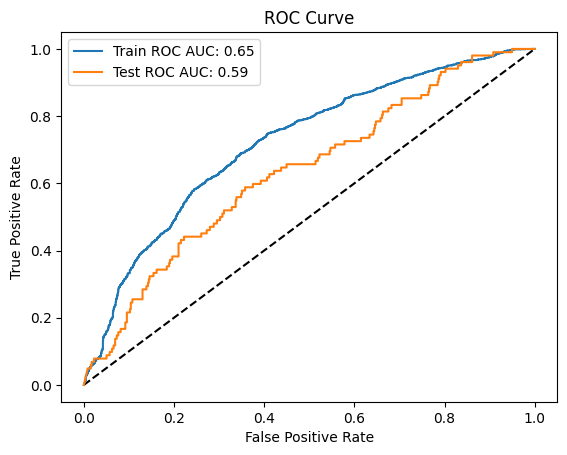


Confusion Matrix:


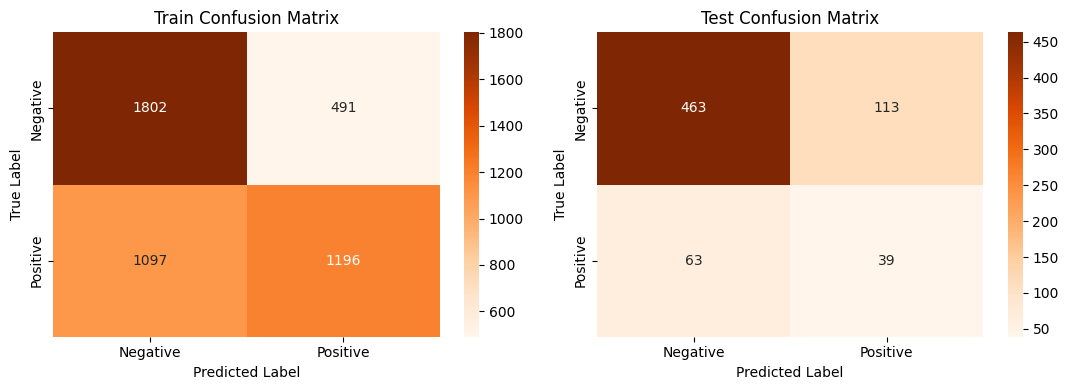


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.621594 | 0.78587  |   0.694145 | 2293        |
| 1.0          |    0.708951 | 0.521587 |   0.601005 | 2293        |
| accuracy     |    0.653729 | 0.653729 |   0.653729 |    0.653729 |
| macro avg    |    0.665272 | 0.653729 |   0.647575 | 4586        |
| weighted avg |    0.665272 | 0.653729 |   0.647575 | 4586        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.880228 | 0.803819 |   0.84029  | 576        |
| 1.0          |    0.256579 | 0.382353 |   0.307087 | 102        |
| accuracy     |    0.740413 | 0.740413 |   0.740413 |   0.740413 |
| macro avg    |    0.568404 | 0.593086 |   0.573688 | 678        |
| weighted avg |    0.786405 | 0.740413 |   0.7600

In [158]:
# Visualizing evaluation Metric Score chart
nb_score = evaluate_model(nb_model, X_smote, X_test, y_smote, y_test)

In [159]:
# Updated Evaluation metric Score Chart
score['Naive Bayes'] = nb_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.724726                   0.724726   
Precision Test              0.811569                   0.811569   
Recall Train                0.724160                   0.724160   
Recall Test                 0.738938                   0.738938   
Accuracy Train              0.724160                   0.724160   
Accuracy Test               0.738938                   0.738938   
ROC-AUC Train               0.724160                   0.724160   
ROC-AUC Test                0.652727                   0.652727   
F1 macro Train              0.723987                   0.723987   
F1 macro Test               0.766164                   0.766164   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.813393       1.000000   
Precision Test        0.763226             0.785263       0.791287   
Recall Train          1.000000             0.805277       1.000000   
Recall Test           0.727139             0.685841       0.825959   
Accuracy Train        1.000000             0.805277       1.000000   
Accuracy Test         0.727139             0.685841       0.825959   
ROC-AUC Train         1.000000             0.805277       1.000000   
ROC-AUC Test          0.540901             0.593239       0.566789   
F1 macro Train        1.000000             0.804008       1.000000   
F1 macro Test         0.743557             0.723118       0.803965   

                 Random Forest tuned       SVM  SVM tuned       XGB  \
Precision Train             0.960142  0.722856   0.923856  0.998695   
Precision Test              0.783136  0.818905   0.781368  0.768273   
Recall Train                0.960096  0.722852   0.922809  0.998692   
Recall Test                 0.800885  0.727139   0.746313  0.814159   
Accuracy Train              0.960096  0.722852   0.922809  0.998692   
Accuracy Test               0.800885  0.727139   0.746313  0.814159   
ROC-AUC Train               0.960096  0.722852   0.922809  0.998692   
ROC-AUC Test                0.568168  0.669986   0.580423  0.531607   
F1 macro Train              0.960095  0.722851   0.922761  0.998692   
F1 macro Test               0.791243  0.759206   0.761903  0.786384   

                 XGB tuned  Naive Bayes  
Precision Train   1.000000     0.665272  
Precision Test    0.783385     0.786405  
Recall Train      1.000000     0.653729  
Recall Test       0.823009     0.740413  
Accuracy Train    1.000000     0.653729  
Accuracy Test     0.823009     0.740413  
ROC-AUC Train     1.000000     0.653729  
ROC-AUC Test      0.552951     0.593086  
F1 macro Train    1.000000     0.647575  
F1 macro Test     0.797958     0.760074

#### 2. Cross- Validation & Hyperparameter Tuning

In [160]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'var_smoothing': 0.006579332246575682}


In [161]:
# Initiate model with best parameters
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])


Train ROC AUC: 0.6668120366332315
Test ROC AUC: 0.5912479575163399


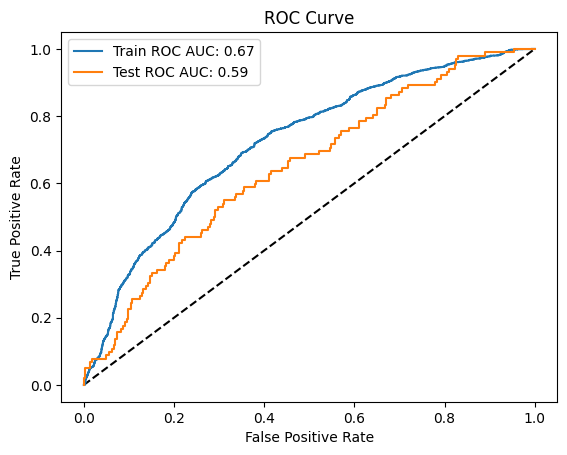


Confusion Matrix:


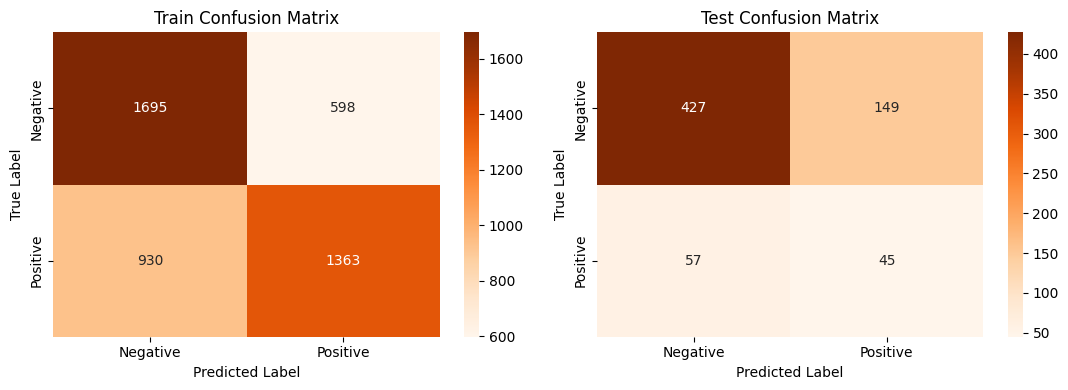


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.645714 | 0.739206 |   0.689305 | 2293        |
| 1.0          |    0.695054 | 0.594418 |   0.640809 | 2293        |
| accuracy     |    0.666812 | 0.666812 |   0.666812 |    0.666812 |
| macro avg    |    0.670384 | 0.666812 |   0.665057 | 4586        |
| weighted avg |    0.670384 | 0.666812 |   0.665057 | 4586        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.882231 | 0.741319 |   0.80566  | 576        |
| 1.0          |    0.231959 | 0.441176 |   0.304054 | 102        |
| accuracy     |    0.696165 | 0.696165 |   0.696165 |   0.696165 |
| macro avg    |    0.557095 | 0.591248 |   0.554857 | 678        |
| weighted avg |    0.784403 | 0.696165 |   0.7301

In [162]:
# Visualizing evaluation Metric Score chart
nb2_score = evaluate_model(nb_model2, X_smote, X_test, y_smote, y_test)

In [163]:
score['Naive Bayes tuned']= nb2_score

##### Which hyperparameter optimization technique have you used and why?

Here we have used the GridSearchCV for optimization of the Naive Bayes model.

GridSearchCV is an exhaustive search method that tries all possible combinations of hyperparameters specified in the hyperparameter grid. This technique can be useful when the number of hyperparameters to tune is small and the range of possible values for each hyperparameter is limited. GridSearchCV can find the best combination of hyperparameters, but it can be computationally expensive for large hyperparameter grids.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [164]:
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.724726                   0.724726   
Precision Test              0.811569                   0.811569   
Recall Train                0.724160                   0.724160   
Recall Test                 0.738938                   0.738938   
Accuracy Train              0.724160                   0.724160   
Accuracy Test               0.738938                   0.738938   
ROC-AUC Train               0.724160                   0.724160   
ROC-AUC Test                0.652727                   0.652727   
F1 macro Train              0.723987                   0.723987   
F1 macro Test               0.766164                   0.766164   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.813393       1.000000   
Precision Test        0.763226             0.785263       0.791287   
Recall Train          1.000000             0.805277       1.000000   
Recall Test           0.727139             0.685841       0.825959   
Accuracy Train        1.000000             0.805277       1.000000   
Accuracy Test         0.727139             0.685841       0.825959   
ROC-AUC Train         1.000000             0.805277       1.000000   
ROC-AUC Test          0.540901             0.593239       0.566789   
F1 macro Train        1.000000             0.804008       1.000000   
F1 macro Test         0.743557             0.723118       0.803965   

                 Random Forest tuned       SVM  SVM tuned       XGB  \
Precision Train             0.960142  0.722856   0.923856  0.998695   
Precision Test              0.783136  0.818905   0.781368  0.768273   
Recall Train                0.960096  0.722852   0.922809  0.998692   
Recall Test                 0.800885  0.727139   0.746313  0.814159   
Accuracy Train              0.960096  0.722852   0.922809  0.998692   
Accuracy Test               0.800885  0.727139   0.746313  0.814159   
ROC-AUC Train               0.960096  0.722852   0.922809  0.998692   
ROC-AUC Test                0.568168  0.669986   0.580423  0.531607   
F1 macro Train              0.960095  0.722851   0.922761  0.998692   
F1 macro Test               0.791243  0.759206   0.761903  0.786384   

                 XGB tuned  Naive Bayes  Naive Bayes tuned  
Precision Train   1.000000     0.665272           0.670384  
Precision Test    0.783385     0.786405           0.784403  
Recall Train      1.000000     0.653729           0.666812  
Recall Test       0.823009     0.740413           0.696165  
Accuracy Train    1.000000     0.653729           0.666812  
Accuracy Test     0.823009     0.740413           0.696165  
ROC-AUC Train     1.000000     0.653729           0.666812  
ROC-AUC Test      0.552951     0.593086           0.591248  
F1 macro Train    1.000000     0.647575           0.665057  
F1 macro Test     0.797958     0.760074           0.730197

It appears that hyperparameter tuning not improved the performance of the Naive Bayes model on the test set. The tuned Naive Bayes model has lower precision, recall, accuracy, ROC-AUC and F1 score on the test set compared to the untuned Naive Bayes model.

### ML Model - 7 : Neural Network

In [165]:
# ML Model - 7 Implementation
nn_model = MLPClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.8944614042738771
Test ROC AUC: 0.5850183823529411


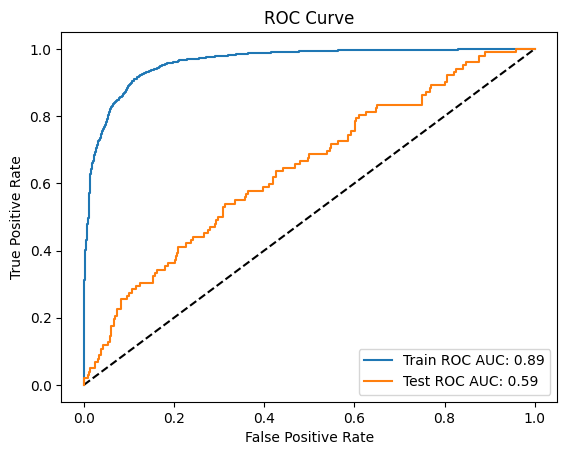


Confusion Matrix:


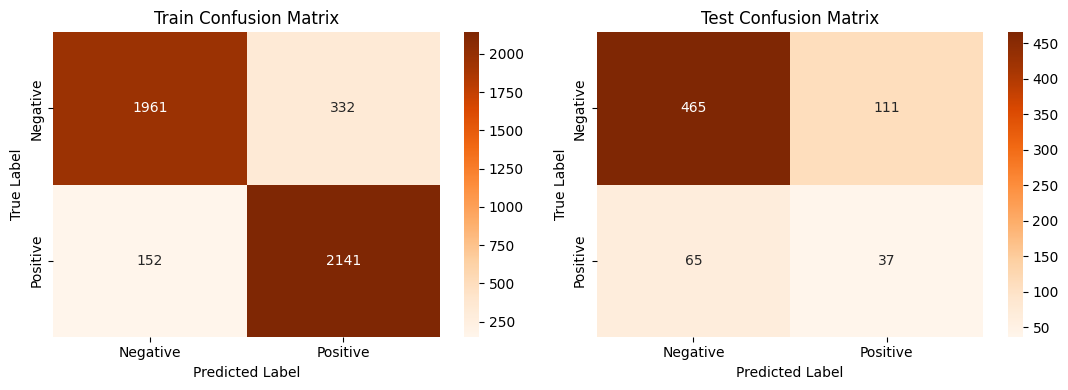


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.928064 | 0.855212 |   0.89015  | 2293        |
| 1.0          |    0.86575  | 0.933711 |   0.898447 | 2293        |
| accuracy     |    0.894461 | 0.894461 |   0.894461 |    0.894461 |
| macro avg    |    0.896907 | 0.894461 |   0.894299 | 4586        |
| weighted avg |    0.896907 | 0.894461 |   0.894299 | 4586        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.877358 | 0.807292 |   0.840868 | 576        |
| 1.0          |    0.25     | 0.362745 |   0.296    | 102        |
| accuracy     |    0.740413 | 0.740413 |   0.740413 |   0.740413 |
| macro avg    |    0.563679 | 0.585018 |   0.568434 | 678        |
| weighted avg |    0.782977 | 0.740413 |   0.7588

In [166]:
# Visualizing evaluation Metric Score chart
neural_score = evaluate_model(nn_model, X_smote, X_test, y_smote, y_test)

In [167]:
# Updated Evaluation metric Score Chart
score['Neural Network'] = neural_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.724726                   0.724726   
Precision Test              0.811569                   0.811569   
Recall Train                0.724160                   0.724160   
Recall Test                 0.738938                   0.738938   
Accuracy Train              0.724160                   0.724160   
Accuracy Test               0.738938                   0.738938   
ROC-AUC Train               0.724160                   0.724160   
ROC-AUC Test                0.652727                   0.652727   
F1 macro Train              0.723987                   0.723987   
F1 macro Test               0.766164                   0.766164   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.813393       1.000000   
Precision Test        0.763226             0.785263       0.791287   
Recall Train          1.000000             0.805277       1.000000   
Recall Test           0.727139             0.685841       0.825959   
Accuracy Train        1.000000             0.805277       1.000000   
Accuracy Test         0.727139             0.685841       0.825959   
ROC-AUC Train         1.000000             0.805277       1.000000   
ROC-AUC Test          0.540901             0.593239       0.566789   
F1 macro Train        1.000000             0.804008       1.000000   
F1 macro Test         0.743557             0.723118       0.803965   

                 Random Forest tuned       SVM  SVM tuned       XGB  \
Precision Train             0.960142  0.722856   0.923856  0.998695   
Precision Test              0.783136  0.818905   0.781368  0.768273   
Recall Train                0.960096  0.722852   0.922809  0.998692   
Recall Test                 0.800885  0.727139   0.746313  0.814159   
Accuracy Train              0.960096  0.722852   0.922809  0.998692   
Accuracy Test               0.800885  0.727139   0.746313  0.814159   
ROC-AUC Train               0.960096  0.722852   0.922809  0.998692   
ROC-AUC Test                0.568168  0.669986   0.580423  0.531607   
F1 macro Train              0.960095  0.722851   0.922761  0.998692   
F1 macro Test               0.791243  0.759206   0.761903  0.786384   

                 XGB tuned  Naive Bayes  Naive Bayes tuned  Neural Network  
Precision Train   1.000000     0.665272           0.670384        0.896907  
Precision Test    0.783385     0.786405           0.784403        0.782977  
Recall Train      1.000000     0.653729           0.666812        0.894461  
Recall Test       0.823009     0.740413           0.696165        0.740413  
Accuracy Train    1.000000     0.653729           0.666812        0.894461  
Accuracy Test     0.823009     0.740413           0.696165        0.740413  
ROC-AUC Train     1.000000     0.653729           0.666812        0.894461  
ROC-AUC Test      0.552951     0.593086           0.591248        0.585018  
F1 macro Train    1.000000     0.647575           0.665057        0.894299  
F1 macro Test     0.797958     0.760074           0.730197        0.758897

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 7 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}

# Initialize the model
neural = MLPClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

In [169]:
# Initiate model with best parameters
nn_model2 = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        alpha = best_params['alpha'],
                        random_state = 0)


Train ROC AUC: 0.8805058874836459
Test ROC AUC: 0.6020731209150326


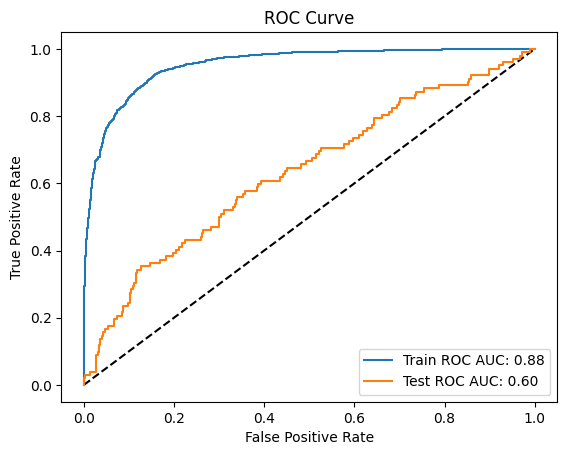


Confusion Matrix:


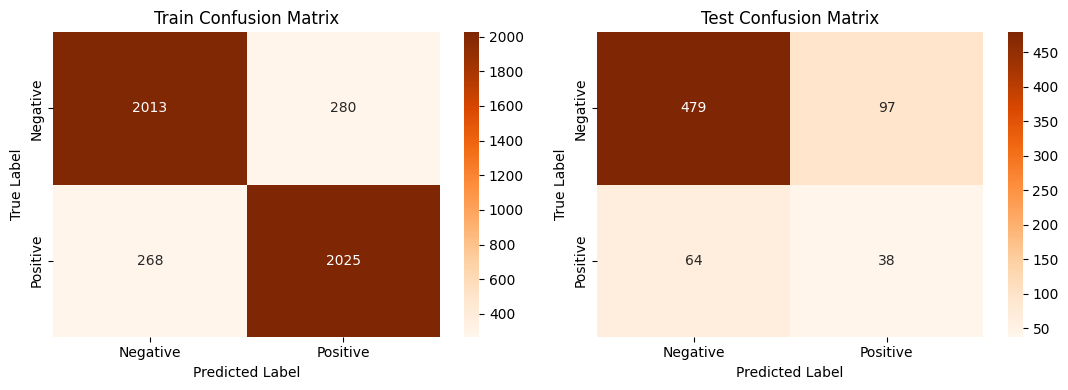


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.882508 | 0.877889 |   0.880192 | 2293        |
| 1.0          |    0.878525 | 0.883123 |   0.880818 | 2293        |
| accuracy     |    0.880506 | 0.880506 |   0.880506 |    0.880506 |
| macro avg    |    0.880516 | 0.880506 |   0.880505 | 4586        |
| weighted avg |    0.880516 | 0.880506 |   0.880505 | 4586        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.882136 | 0.831597 |   0.856122 | 576        |
| 1.0          |    0.281481 | 0.372549 |   0.320675 | 102        |
| accuracy     |    0.762537 | 0.762537 |   0.762537 |   0.762537 |
| macro avg    |    0.581809 | 0.602073 |   0.588398 | 678        |
| weighted avg |    0.791772 | 0.762537 |   0.7755

In [170]:
# Visualizing evaluation Metric Score chart
neural2_score = evaluate_model(nn_model2, X_smote, X_test, y_smote, y_test)

In [171]:
score['Neural Network tuned']= neural2_score

##### Which hyperparameter optimization technique have you used and why?

Here we have used Randomized search to tune the Neural Network model.

Randomized search is a popular technique because it can be more efficient than exhaustive search methods like grid search. Instead of trying all possible combinations of hyperparameters, randomized search samples a random subset of the hyperparameter space. This can save time and computational resources while still finding good hyperparameters for the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [172]:
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.724726                   0.724726   
Precision Test              0.811569                   0.811569   
Recall Train                0.724160                   0.724160   
Recall Test                 0.738938                   0.738938   
Accuracy Train              0.724160                   0.724160   
Accuracy Test               0.738938                   0.738938   
ROC-AUC Train               0.724160                   0.724160   
ROC-AUC Test                0.652727                   0.652727   
F1 macro Train              0.723987                   0.723987   
F1 macro Test               0.766164                   0.766164   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.813393       1.000000   
Precision Test        0.763226             0.785263       0.791287   
Recall Train          1.000000             0.805277       1.000000   
Recall Test           0.727139             0.685841       0.825959   
Accuracy Train        1.000000             0.805277       1.000000   
Accuracy Test         0.727139             0.685841       0.825959   
ROC-AUC Train         1.000000             0.805277       1.000000   
ROC-AUC Test          0.540901             0.593239       0.566789   
F1 macro Train        1.000000             0.804008       1.000000   
F1 macro Test         0.743557             0.723118       0.803965   

                 Random Forest tuned       SVM  SVM tuned       XGB  \
Precision Train             0.960142  0.722856   0.923856  0.998695   
Precision Test              0.783136  0.818905   0.781368  0.768273   
Recall Train                0.960096  0.722852   0.922809  0.998692   
Recall Test                 0.800885  0.727139   0.746313  0.814159   
Accuracy Train              0.960096  0.722852   0.922809  0.998692   
Accuracy Test               0.800885  0.727139   0.746313  0.814159   
ROC-AUC Train               0.960096  0.722852   0.922809  0.998692   
ROC-AUC Test                0.568168  0.669986   0.580423  0.531607   
F1 macro Train              0.960095  0.722851   0.922761  0.998692   
F1 macro Test               0.791243  0.759206   0.761903  0.786384   

                 XGB tuned  Naive Bayes  Naive Bayes tuned  Neural Network  \
Precision Train   1.000000     0.665272           0.670384        0.896907   
Precision Test    0.783385     0.786405           0.784403        0.782977   
Recall Train      1.000000     0.653729           0.666812        0.894461   
Recall Test       0.823009     0.740413           0.696165        0.740413   
Accuracy Train    1.000000     0.653729           0.666812        0.894461   
Accuracy Test     0.823009     0.740413           0.696165        0.740413   
ROC-AUC Train     1.000000     0.653729           0.666812        0.894461   
ROC-AUC Test      0.552951     0.593086           0.591248        0.585018   
F1 macro Train    1.000000     0.647575           0.665057        0.894299   
F1 macro Test     0.797958     0.760074           0.730197        0.758897   

                 Neural Network tuned  
Precision Train              0.880516  
Precision Test               0.791772  
Recall Train                 0.880506  
Recall Test                  0.762537  
Accuracy Train               0.880506  
Accuracy Test                0.762537  
ROC-AUC Train                0.880506  
ROC-AUC Test                 0.602073  
F1 macro Train               0.880505  
F1 macro Test                0.775568

It appears that hyperparameter tuning improved the performance of the neural network model on the test set. The tuned neural network has higher precision, recall, accuracy, and F1 score on the test set compared to the untuned neural network. The ROC-AUC score on the test set also improved slightly after tuning.

In [173]:
print(score.to_markdown())

|                 |   Logistic regression |   Logistic regression tuned |   Decision Tree |   Decision Tree tuned |   Random Forest |   Random Forest tuned |      SVM |   SVM tuned |      XGB |   XGB tuned |   Naive Bayes |   Naive Bayes tuned |   Neural Network |   Neural Network tuned |
|:----------------|----------------------:|----------------------------:|----------------:|----------------------:|----------------:|----------------------:|---------:|------------:|---------:|------------:|--------------:|--------------------:|-----------------:|-----------------------:|
| Precision Train |              0.724726 |                    0.724726 |        1        |              0.813393 |        1        |              0.960142 | 0.722856 |    0.923856 | 0.998695 |    1        |      0.665272 |            0.670384 |         0.896907 |               0.880516 |
| Precision Test  |              0.811569 |                    0.811569 |        0.763226 |              0.785263 |        0.79128

## Plot of scores for models

### Precision

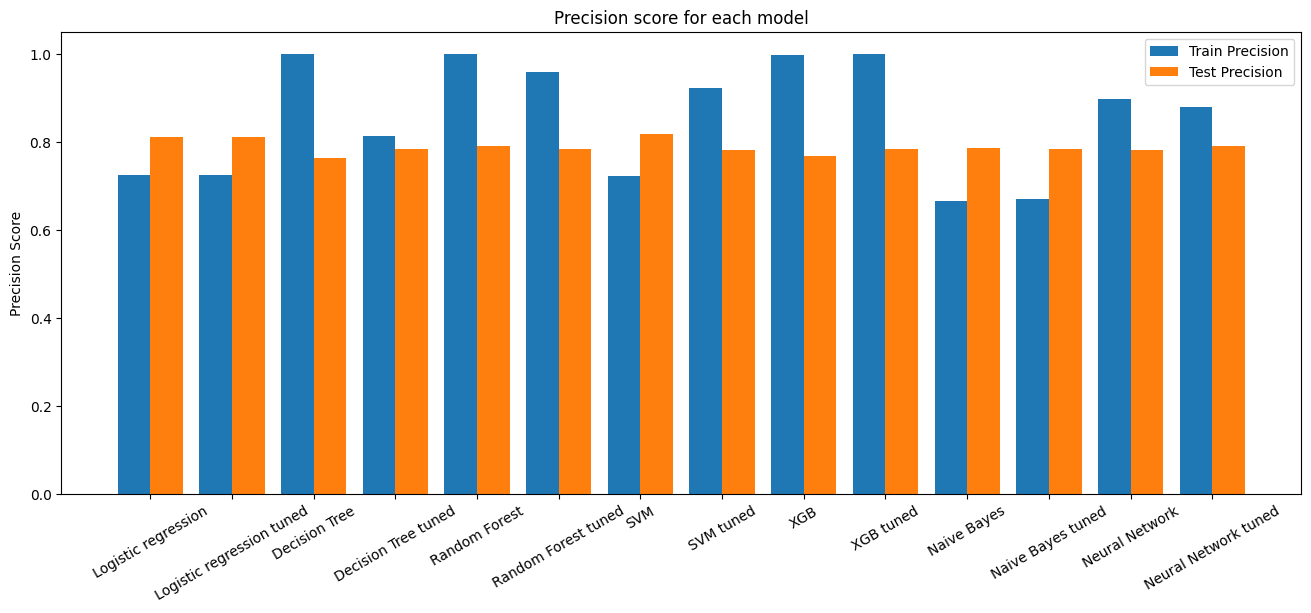

In [174]:
# Precision Scores plot

models = list(score.columns)
train = score.iloc[0,:]
test = score.iloc[1,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(16,6))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train Precision')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test Precision')

# Set labels
plt.xticks(X_axis,models, rotation=30)
plt.ylabel("Precision Score")
plt.title("Precision score for each model")
plt.legend()
plt.show()

### Recall

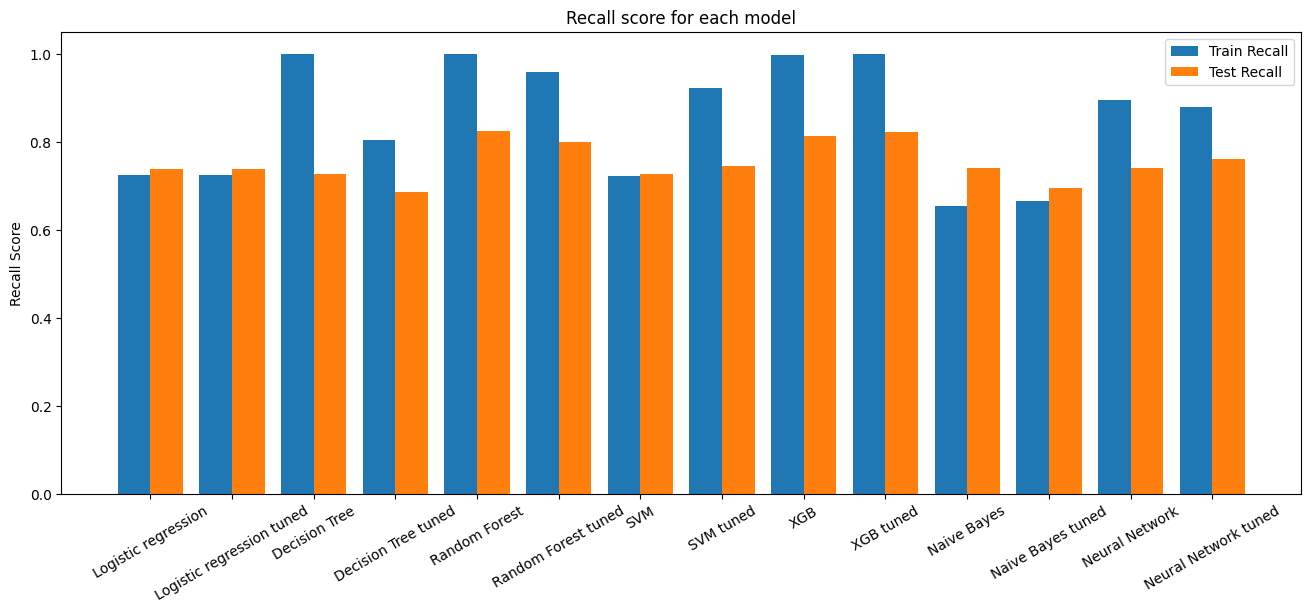

In [175]:
# Recall Scores plot

models = list(score.columns)
train = score.iloc[2,:]
test = score.iloc[3,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(16,6))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train Recall')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test Recall')

# Set labels
plt.xticks(X_axis,models, rotation=30)
plt.ylabel("Recall Score")
plt.title("Recall score for each model")
plt.legend()
plt.show()

### Accuracy

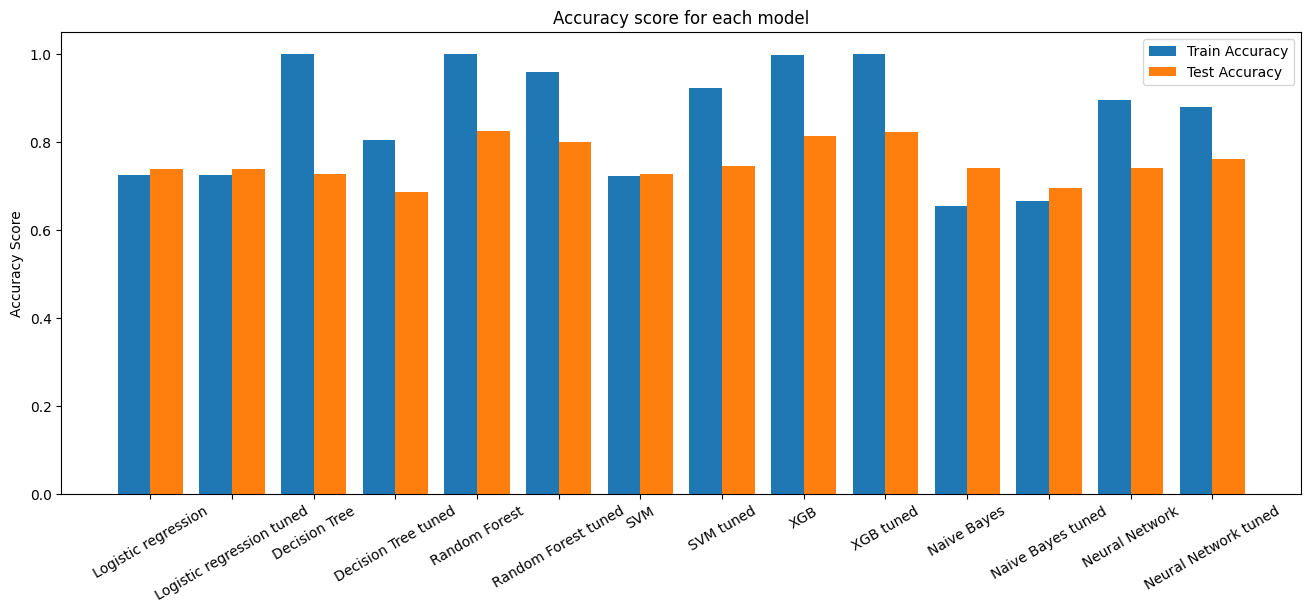

In [176]:
# Accuracy Scores plot

models = list(score.columns)
train = score.iloc[4,:]
test = score.iloc[5,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(16,6))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train Accuracy')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test Accuracy')

# Set labels
plt.xticks(X_axis,models, rotation=30)
plt.ylabel("Accuracy Score")
plt.title("Accuracy score for each model")
plt.legend()
plt.show()

### ROC-AUC

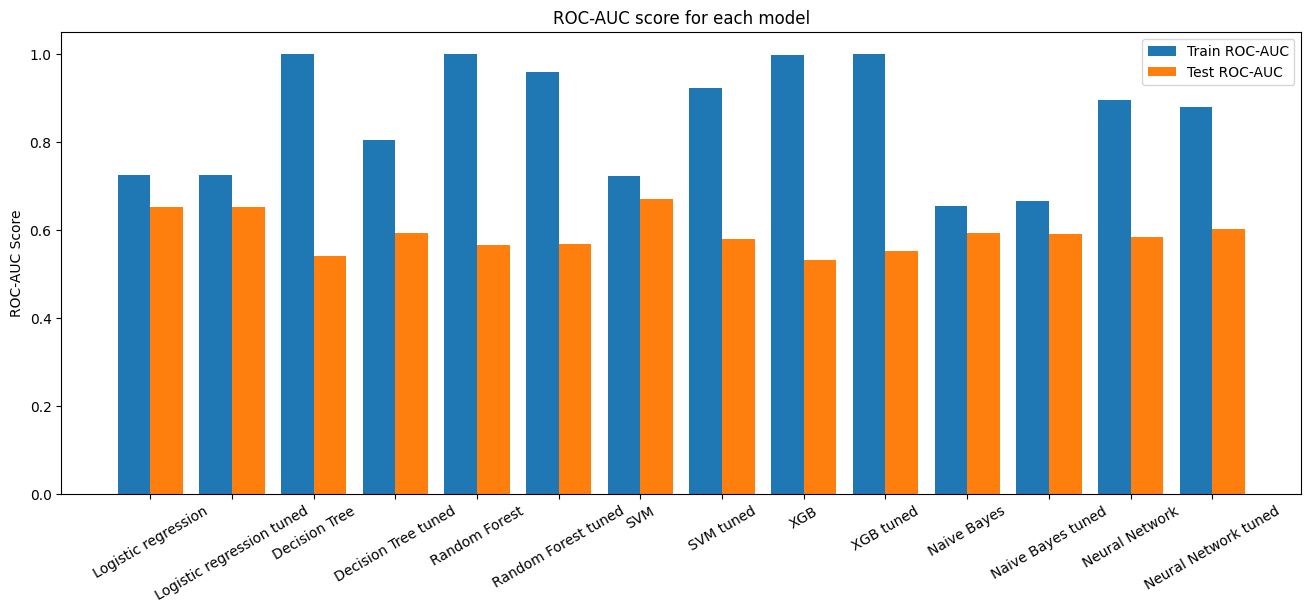

In [177]:
# ROC-AUC Scores plot

models = list(score.columns)
train = score.iloc[6,:]
test = score.iloc[7,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(16,6))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train ROC-AUC')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test ROC-AUC')

# Set labels
plt.xticks(X_axis,models, rotation=30)
plt.ylabel("ROC-AUC Score")
plt.title("ROC-AUC score for each model")
plt.legend()
plt.show()

### F1 score

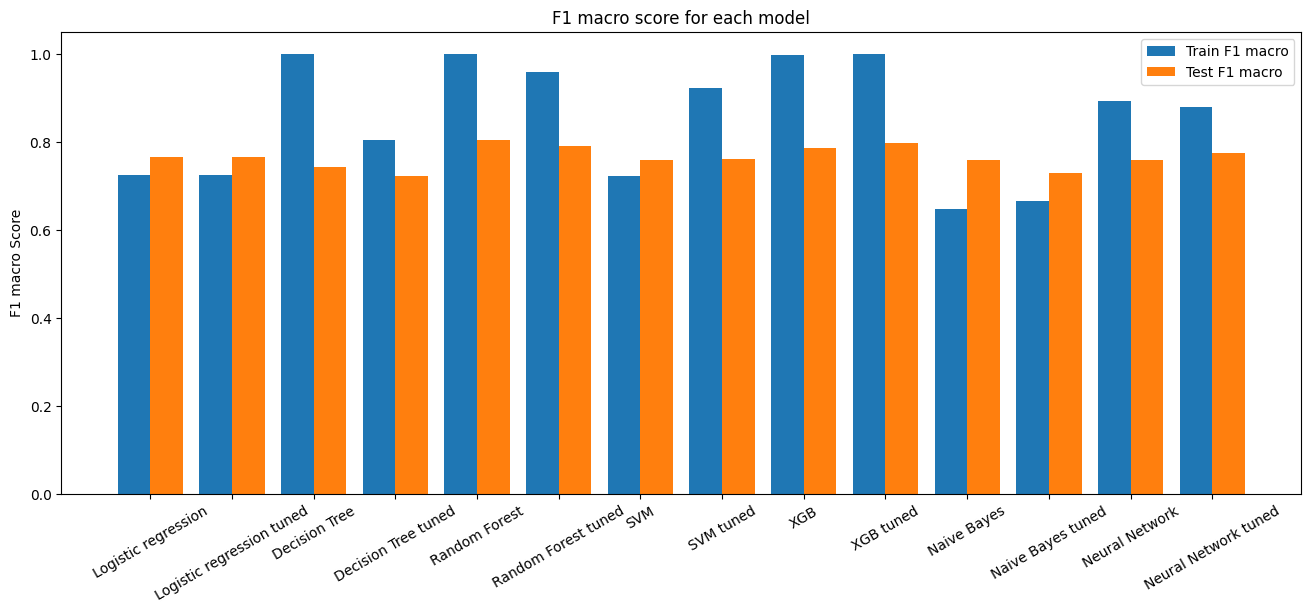

In [178]:
# F1 macro Scores plot

models = list(score.columns)
train = score.iloc[8,:]
test = score.iloc[9,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(16,6))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train F1 macro')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test F1 macro')

# Set labels
plt.xticks(X_axis,models, rotation=30)
plt.ylabel("F1 macro Score")
plt.title("F1 macro score for each model")
plt.legend()
plt.show()

## ***Selection of best model***

In [179]:
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.724726                   0.724726   
Precision Test              0.811569                   0.811569   
Recall Train                0.724160                   0.724160   
Recall Test                 0.738938                   0.738938   
Accuracy Train              0.724160                   0.724160   
Accuracy Test               0.738938                   0.738938   
ROC-AUC Train               0.724160                   0.724160   
ROC-AUC Test                0.652727                   0.652727   
F1 macro Train              0.723987                   0.723987   
F1 macro Test               0.766164                   0.766164   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.813393       1.000000   
Precision Test        0.763226             0.785263       0.791287   
Recall Train          1.000000             0.805277       1.000000   
Recall Test           0.727139             0.685841       0.825959   
Accuracy Train        1.000000             0.805277       1.000000   
Accuracy Test         0.727139             0.685841       0.825959   
ROC-AUC Train         1.000000             0.805277       1.000000   
ROC-AUC Test          0.540901             0.593239       0.566789   
F1 macro Train        1.000000             0.804008       1.000000   
F1 macro Test         0.743557             0.723118       0.803965   

                 Random Forest tuned       SVM  SVM tuned       XGB  \
Precision Train             0.960142  0.722856   0.923856  0.998695   
Precision Test              0.783136  0.818905   0.781368  0.768273   
Recall Train                0.960096  0.722852   0.922809  0.998692   
Recall Test                 0.800885  0.727139   0.746313  0.814159   
Accuracy Train              0.960096  0.722852   0.922809  0.998692   
Accuracy Test               0.800885  0.727139   0.746313  0.814159   
ROC-AUC Train               0.960096  0.722852   0.922809  0.998692   
ROC-AUC Test                0.568168  0.669986   0.580423  0.531607   
F1 macro Train              0.960095  0.722851   0.922761  0.998692   
F1 macro Test               0.791243  0.759206   0.761903  0.786384   

                 XGB tuned  Naive Bayes  Naive Bayes tuned  Neural Network  \
Precision Train   1.000000     0.665272           0.670384        0.896907   
Precision Test    0.783385     0.786405           0.784403        0.782977   
Recall Train      1.000000     0.653729           0.666812        0.894461   
Recall Test       0.823009     0.740413           0.696165        0.740413   
Accuracy Train    1.000000     0.653729           0.666812        0.894461   
Accuracy Test     0.823009     0.740413           0.696165        0.740413   
ROC-AUC Train     1.000000     0.653729           0.666812        0.894461   
ROC-AUC Test      0.552951     0.593086           0.591248        0.585018   
F1 macro Train    1.000000     0.647575           0.665057        0.894299   
F1 macro Test     0.797958     0.760074           0.730197        0.758897   

                 Neural Network tuned  
Precision Train              0.880516  
Precision Test               0.791772  
Recall Train                 0.880506  
Recall Test                  0.762537  
Accuracy Train               0.880506  
Accuracy Test                0.762537  
ROC-AUC Train                0.880506  
ROC-AUC Test                 0.602073  
F1 macro Train               0.880505  
F1 macro Test                0.775568

In [180]:
# Removing the overfitted models which have recall, ROC-AUC, f1 scores for train as 1
score_t = score.transpose()            #taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.95].index  #creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['ROC-AUC Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     #creating a new dataframe with required models
adj

Precision Train  Precision Test  Recall Train  \
Logistic regression               0.724726        0.811569      0.724160   
Logistic regression tuned         0.724726        0.811569      0.724160   
Decision Tree tuned               0.813393        0.785263      0.805277   
SVM                               0.722856        0.818905      0.722852   
SVM tuned                         0.923856        0.781368      0.922809   
Naive Bayes                       0.665272        0.786405      0.653729   
Naive Bayes tuned                 0.670384        0.784403      0.666812   
Neural Network                    0.896907        0.782977      0.894461   
Neural Network tuned              0.880516        0.791772      0.880506   

                           Recall Test  Accuracy Train  Accuracy Test  \
Logistic regression           0.738938        0.724160       0.738938   
Logistic regression tuned     0.738938        0.724160       0.738938   
Decision Tree tuned           0.685841        0.805277       0.685841   
SVM                           0.727139        0.722852       0.727139   
SVM tuned                     0.746313        0.922809       0.746313   
Naive Bayes                   0.740413        0.653729       0.740413   
Naive Bayes tuned             0.696165        0.666812       0.696165   
Neural Network                0.740413        0.894461       0.740413   
Neural Network tuned          0.762537        0.880506       0.762537   

                           ROC-AUC Train  ROC-AUC Test  F1 macro Train  \
Logistic regression             0.724160      0.652727        0.723987   
Logistic regression tuned       0.724160      0.652727        0.723987   
Decision Tree tuned             0.805277      0.593239        0.804008   
SVM                             0.722852      0.669986        0.722851   
SVM tuned                       0.922809      0.580423        0.922761   
Naive Bayes                     0.653729      0.593086        0.647575   
Naive Bayes tuned               0.666812      0.591248        0.665057   
Neural Network                  0.894461      0.585018        0.894299   
Neural Network tuned            0.880506      0.602073        0.880505   

                           F1 macro Test  
Logistic regression             0.766164  
Logistic regression tuned       0.766164  
Decision Tree tuned             0.723118  
SVM                             0.759206  
SVM tuned                       0.761903  
Naive Bayes                     0.760074  
Naive Bayes tuned               0.730197  
Neural Network                  0.758897  
Neural Network tuned            0.775568

In [181]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [182]:
metrics = ['Precision','Recall', 'Accuracy', 'ROC-AUC', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: SVM - 0.8189
Recall: Neural Network tuned - 0.7625
Accuracy: Neural Network tuned - 0.7625
ROC-AUC: SVM - 0.67
F1 macro: Neural Network tuned - 0.7756


In [183]:
# Take recall as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.95].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','ROC-AUC Train','ROC-AUC Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model      |   Recall Train |   Recall Test |
|:--------------------------|---------------:|--------------:|
| Logistic regression       |       0.72416  |      0.738938 |
| Logistic regression tuned |       0.72416  |      0.738938 |
| Decision Tree tuned       |       0.805277 |      0.685841 |
| SVM                       |       0.722852 |      0.727139 |
| SVM tuned                 |       0.922809 |      0.746313 |
| Naive Bayes               |       0.653729 |      0.740413 |
| Naive Bayes tuned         |       0.666812 |      0.696165 |
| Neural Network            |       0.894461 |      0.740413 |
| Neural Network tuned      |       0.880506 |      0.762537 |


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

After carefully considering the potential consequences of false positives and false negatives in the context of our business objectives, I have selected recall as the primary evaluation metric for our CHD risk prediction model. This means that our goal is to maximize the number of true positives (patients correctly identified as having CHD risk) while minimizing the number of false negatives (patients incorrectly identified as not having CHD risk). By doing so, we aim to ensure that we correctly identify as many patients with CHD risk as possible, even if it means that we may have some false positives.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After evaluating the performance of several machine learning models on the Framingham Heart Study dataset, I have selected the Neural Network (tuned) as our final prediction model. This decision was based on the model’s performance on our primary evaluation metric of recall, which measures the ability of the model to correctly identify patients with CHD risk. In our analysis, we found that the Neural Network (tuned) had the highest recall score among the models we evaluated.

We choose recall as our primary evaluation metric because correctly identifying patients with CHD risk is critical to achieving our business objectives. By selecting a model with a high recall score, we aim to ensure that we correctly identify as many patients with CHD risk as possible, even if it means that we may have some false positives. Overall, we believe that the Neural Network (tuned) is the best choice for our needs and will help us achieve a positive business impact.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

## **SHAP (SHapley Additive exPlanations)**

In [184]:
pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/9b/e4/5709931c785b4629947a5d72e817513ec01201a64e7d0a0ac254bff3aa96/shap-0.45.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.7 from https://files.pythonhosted.org/packages/78/c2/b3f55dfdb8af9812fdb9baf70cacf3b9e82e505b2bd4324d588888b81202/slicer-0.0.7-py3-none-any.whl.metadata
  Obtaining dependency information for numba from https://files.pythonhosted.org/packages/0c/fc/aecc9db1cb2707cede48779a50a67fdee270dc171e833027e5afda747701/numba-0.59.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for cloudpickle from https://files.pythonhosted.org/packages/96/43/dae06432d0c4b1dc9e9149ad37b4ca8384cf6eb7700cd9215b177b914f0a/cloudpickle-3.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for llvmlite<0.43,>=0.42.0dev0 from https://files.pythonhosted.org/packages/e0/a2/70e18cab31b707ff62c5dd4f5ed6ea88f553ba3a8e40ce99aefb8e056af1/llv


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [185]:
# Importing shap
import shap

In [186]:
X

age  sex  cigs_per_day  bp_meds  prevalent_stroke  prevalent_hyp  \
0     1.560602  0.0     -0.131026      0.0               0.0            0.0   
1    -1.744449  1.0     -0.904920      0.0               0.0            1.0   
2    -0.341239  0.0      0.508011      0.0               0.0            0.0   
3     0.137847  1.0      1.093267      0.0               0.0            1.0   
4     1.560602  0.0      1.542349      0.0               0.0            0.0   
...        ...  ...           ...      ...               ...            ...   
3385  1.188061  0.0     -0.904920      0.0               0.0            0.0   
3386 -0.341239  0.0     -0.904920      0.0               0.0            0.0   
3387 -0.596302  1.0     -0.131026      0.0               0.0            1.0   
3388  1.188061  1.0     -0.904920      0.0               0.0            1.0   
3389  0.580739  0.0     -0.904920      0.0               0.0            0.0   

      diabetes  total_cholesterol       bmi  heart_rate   glucose  \
0          0.0          -0.282494 -0.049425    1.207577  0.042128   
1          0.0          -0.510319  1.072541   -0.268706 -0.383217   
2          0.0           0.393382 -1.462192    1.058722  1.166956   
3          0.0           0.007308  0.696591   -0.646169  1.166956   
4          0.0           0.192367  0.224627   -0.454779 -0.211427   
...        ...                ...       ...         ...       ...   
3385       0.0           0.629499  0.951612   -0.454779  1.846165   
3386       0.0          -0.856994 -0.992702    0.427838  0.372917   
3387       0.0           2.255045  0.862119   -0.177572 -0.645256   
3388       0.0          -1.081718 -0.695740    0.427838  0.454376   
3389       0.0           1.169439  1.099552    0.344629  1.011660   

      education_1.0  education_2.0  education_3.0  education_4.0  \
0                 0              1              0              0   
1                 0              0              0              1   
2                 1              0              0              0   
3                 1              0              0              0   
4                 1              0              0              0   
...             ...            ...            ...            ...   
3385              1              0              0              0   
3386              1              0              0              0   
3387              0              0              1              0   
3388              1              0              0              0   
3389              0              0              1              0   

      pulse_pressure  
0           1.023762  
1           1.474850  
2          -0.267527  
3           1.474850  
4           0.224326  
...              ...  
3385       -0.306792  
3386       -0.189648  
3387        0.169223  
3388        0.957313  
3389       -0.112610  

[3390 rows x 16 columns]

In [ ]:
# Summarize the background dataset using k-means clustering
X_summary = shap.kmeans(X, 100)

# Create an explainer object
explainer = shap.KernelExplainer(nn_model2.predict_proba, X_summary)

# Compute the SHAP values for all the samples in the test data
shap_values = explainer.shap_values(X_test)

  0%|          | 0/678 [00:00<?, ?it/s]

In [ ]:
# Summery plot
shap.summary_plot(shap_values, X_test, feature_names=features)

This bar plot shows the important features and the mean shap values.
It shows the average impact on the model output magnitude.

It does not show the positive or negative impact on the prediction.



## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Import pickle
import pickle

# Save the best model (Neural Network tuned)
pickle.dump(nn_model2, open('nn_model2.pkl', 'wb'))
# Save the scaler
pickle.dump(scaler, open('scaler.pkl', 'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
pickled_model = pickle.load(open('nn_model2.pkl', 'rb'))

In [ ]:
instance = X_test.loc[54]

In [ ]:
instance

In [ ]:
# Create an array for the x test value for the 50 index row
predict_new = np.array(instance).reshape(1,-1)

# Testing on one instance which we used for shap X_test[50,:]
pickled_model.predict(predict_new)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, this project demonstrated the potential of machine learning techniques to accurately predict the 10-year risk of future coronary heart disease (CHD) in patients using data from an ongoing cardiovascular study. Key points from this project include:

- Careful data preprocessing and transformation improved the performance of machine learning models and enabled more accurate predictions.
- Feature selection was important for identifying the most relevant predictors of CHD risk.
- The Neural Network model (tuned) was chosen as the final prediction model due to its high recall score.
- Techniques such as SMOTE combined with Tomek links undersampling and standard scalar scaling were used to handle imbalanced data and improve model performance.
- This project provides a valuable example of how machine learning techniques can be applied to real-world problems to achieve positive business impact.

Overall, this project highlights the importance of careful data preparation and analysis in machine learning projects. By taking the time to clean and transform the data, select relevant features, and choose an appropriate model, it is possible to achieve accurate predictions and support decision-making in a wide range of domains.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***